In [84]:
from ast import arg

import matplotlib.cbook as cbook
import random
import itertools
import copy
import os

from analysis_utils import*
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from collections import defaultdict
import pandas as pd 

from scipy.stats import mannwhitneyu

In [85]:
nodeNumDic = {1: 1718, 2: 1290, 3: 420, 4: 580, 5: 1104, 
              6: 294, 7: 282, 8: 143, 9: 979, 10: 339, 
              11: 591, 12: 217, 13: 76, 14: 242, 15: 403, 
              16: 327, 17: 663, 18: 130, 19: 1044, 20: 456}
colors = {'new_neiNodeSum_1':'red', 
          'degree': 'darkblue', # 'royalblue',
          'clsBetweenness': (168/255, 163/255, 219/255),# plt.cm.tab20(8), #'lavender', 
          'clsCloseness': (198/255, 143/255, 198/255), # 'thistle',  
          'clsKcore':(197/255, 215/255, 192/255), 
          'clsEigenvector': (255/255, 222/255, 153/255), # 'navajowhite', 
          'KMcore_g1': 'darkolivegreen', #'seagreen',
          'KMcore_gf': 'darkgreen', # 'darkolivegreen', 
          'neiNodesNum': (156/255, 176/255, 202/255) , #'lightsteelblue', # 'powderblue', 
          'nodeEdgeEigenvector_linear': (164/255, 114/255, 11/255), # 'darkgoldenrod', # 'darksalmon',  # 'gold',
          'nodeEdgeEigenvector_max': (255/255, 120/255, 0), # 'darkorange',
          'new_precise_prob_t2_iNum_p1':'darkred', 
          'new_precise_prob_t2_irNum_p1':'MIS-ir-$t_2$', 
          'random':'black'}

In [86]:
immunizationMtd_s = [ 'random','clsBetweenness', 'clsCloseness', 'clsKcore','clsEigenvector','neiNodesNum','KMcore_g1', 'KMcore_gf',
                        'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 'degree','new_neiNodeSum_1']  # 'PageRank',
mctimes = 100
results = dict()

In [87]:
# Results/Results_add
length_Dic = dict()
rhoRlt = dict()
y_Dic = dict()
for net in range(2,21):    
    # with open(f'Results_add_lico/mc_{net}_para2_expr1_delnode_rho.json', 'r') as f: # _static
    with open(f'Results/Results_add/mc_{net}_para2_expr1_delnode_rho_static.json', 'r') as f: # 
        results[net] = json.load(f)
    # "mu1_net13_nu1_lid0_mtdrandom"
    for mu in [0.1,1]:
        muName = int(10*mu)
        for nu in [1,3]:
            for lid in [0,1]:
                with open(f'Iniconfig/initialConfigration_mu{muName}_net{net}_nu{nu}_lid{lid}.json', 'r') as f:
                    initialConfigration = json.load(f)  
                rhoRlt[f'mu{muName}_net{net}_nu{nu}_lid{lid}'] = dict()
                y_Dic[f'mu{muName}_net{net}_nu{nu}_lid{lid}'] = dict()
                length_Dic[f'mu{muName}_net{net}_nu{nu}_lid{lid}'] = dict()
                # for mtd in immunizationMtd_a:
                for mtd in immunizationMtd_s:
                    rhoRlt[f'mu{muName}_net{net}_nu{nu}_lid{lid}'][mtd] = []
                    y_Dic[f'mu{muName}_net{net}_nu{nu}_lid{lid}'][mtd] = []
                    length_Dic[f'mu{muName}_net{net}_nu{nu}_lid{lid}'][mtd] = []
                    maxlength = 0
                    for onesimu in results[net][f'mu{muName}_net{net}_nu{nu}_lid{lid}_mtd{mtd}']:
                        temp = []
                        temp.append(len(initialConfigration)/nodeNumDic[net])
                        for oneremove in onesimu:
                            temp.append(oneremove[1])
                        del temp[-1]
                        length_Dic[f'mu{muName}_net{net}_nu{nu}_lid{lid}'][mtd].append(len(temp))
                        if len(temp) > maxlength:
                            maxlength = len(temp)
                        rhoRlt[f'mu{muName}_net{net}_nu{nu}_lid{lid}'][mtd].append(temp)
                    for item in rhoRlt[f'mu{muName}_net{net}_nu{nu}_lid{lid}'][mtd]:
                        itemlength = len(item)
                        if itemlength < maxlength:
                            for i in range(maxlength-itemlength):
                                item.append(0.0)
                    for i in range(maxlength):
                        temp = 0
                        for item in rhoRlt[f'mu{muName}_net{net}_nu{nu}_lid{lid}'][mtd]:
                            temp += item[i]
                        y_Dic[f'mu{muName}_net{net}_nu{nu}_lid{lid}'][mtd].append(temp/mctimes)

In [88]:
# Results/Results_add
net = 1
with open(f'Results/Results_add/mc_{net}_para2_expr1_delnode_rho_static_1.json', 'r') as f: # 
    results[1] = json.load(f)
for i in [3,5,7]:
    with open(f'Results/Results_add/mc_{net}_para2_expr1_delnode_rho_static_{i}.json', 'r') as f: # 
        results_ = json.load(f)
    for item in results_:
        results[1][item] = results_[item]
for i in [2,4,6,8]:
    with open(f'Results/Results_add/mc_{net}_para2_expr1_delnode_rho_static_{i}.json', 'r') as f: # 
        results_ = json.load(f)
    for item in results_:
        sp = item.split('_')
        sp[3]='lid1'
        new_item = '_'.join(sp)
        results[1][new_item] = results_[item]

In [8]:
# Results/Results_add  
net = 1
with open(f'Results/Results_add/mc_{net}_para2_expr1_delnode_rho_static_1.json', 'r') as f: # 
    results[1] = json.load(f)
for i in [3,5,7]:
    with open(f'Results/Results_add/mc_{net}_para2_expr1_delnode_rho_static_{i}.json', 'r') as f: # 
        results_ = json.load(f)
    for item in results_:
        results[1][item] = results_[item]
for i in [2,4,6,8]:
    with open(f'Results/Results_add/mc_{net}_para2_expr1_delnode_rho_static_{i}_new.json', 'r') as f: # 
        results_ = json.load(f)
    for item in results_:
        sp = item.split('_')
        sp[3]='lid1'
        new_item = '_'.join(sp)
        results[1][new_item] = results_[item]

In [89]:
# deal with net=1
for mu in [0.1,1]:
    muName = int(10*mu)
    for nu in [1,3]:
        for lid in [0,1]:
            with open(f'Iniconfig/initialConfigration_mu{muName}_net{net}_nu{nu}_lid{lid}.json', 'r') as f:
                initialConfigration = json.load(f)  
            rhoRlt[f'mu{muName}_net{net}_nu{nu}_lid{lid}'] = dict()
            y_Dic[f'mu{muName}_net{net}_nu{nu}_lid{lid}'] = dict()
            length_Dic[f'mu{muName}_net{net}_nu{nu}_lid{lid}'] = dict()
            for mtd in immunizationMtd_s:
                rhoRlt[f'mu{muName}_net{net}_nu{nu}_lid{lid}'][mtd] = []
                y_Dic[f'mu{muName}_net{net}_nu{nu}_lid{lid}'][mtd] = []
                length_Dic[f'mu{muName}_net{net}_nu{nu}_lid{lid}'][mtd] = []
                maxlength = 0
                for onesimu in results[net][f'mu{muName}_net{net}_nu{nu}_lid{lid}_mtd{mtd}']:
                    temp = []
                    temp.append(len(initialConfigration)/nodeNumDic[net])
                    for oneremove in onesimu:
                        temp.append(oneremove[1])
                    del temp[-1]
                    length_Dic[f'mu{muName}_net{net}_nu{nu}_lid{lid}'][mtd].append(len(temp))
                    if len(temp) > maxlength:
                        maxlength = len(temp)
                    rhoRlt[f'mu{muName}_net{net}_nu{nu}_lid{lid}'][mtd].append(temp)
                for item in rhoRlt[f'mu{muName}_net{net}_nu{nu}_lid{lid}'][mtd]:
                    itemlength = len(item)
                    if itemlength < maxlength:
                        for i in range(maxlength-itemlength):
                            item.append(0.0)
                for i in range(maxlength):
                    temp = 0
                    for item in rhoRlt[f'mu{muName}_net{net}_nu{nu}_lid{lid}'][mtd]:
                        temp += item[i]
                    y_Dic[f'mu{muName}_net{net}_nu{nu}_lid{lid}'][mtd].append(temp/mctimes)

In [90]:
yyy = dict()
for net in range(1,21):
    yyy[net] = dict()
    for mu in [0.1,1]:
        yyy[net][mu] = dict()
        muName = int(mu*10)
        for nu in [1,3]:
            yyy[net][mu][nu] = dict()
            for lid in [0,1]:
                yyy[net][mu][nu][lid] = dict()
                for mtd in immunizationMtd_s:
                    # length = len(y_Dic[f'mu{muName}_net{net}_nu{nu}_lid{lid}'][mtd])
                    yyy[net][mu][nu][lid][mtd]=[]
                    for i,_, in enumerate(y_Dic[f'mu{muName}_net{net}_nu{nu}_lid{lid}'][mtd]):
                        if _>=1/nodeNumDic[net]:
                            yyy[net][mu][nu][lid][mtd].append(_)
                        else:
                            yyy[net][mu][nu][lid][mtd].append(_)
                            break
                    # yyy[net][mu][nu][lid][mtd] = [_ for _ in y_Dic[f'mu{muName}_net{net}_nu{nu}_lid{lid}'][mtd] if _>=0]

In [18]:
marker = {1:'o', 3:'s'}
ct = dict()
up = dict()
for mtd in immunizationMtd_s:
    ct[mtd] = defaultdict(int)
    up[mtd] = 0
for mu in [1,0.1]:
    muName = int(mu*10)
    for nu in [1,3]:
        for lid in [0,1]:
            print(mu,nu,lid)
            for net in range(1,21):
                with open(f'Iniconfig/initialConfigration_mu{muName}_net{net}_nu{nu}_lid{lid}.json', 'r') as f:
                    initialConfigration = json.load(f)  
                    iniI=round(len(initialConfigration)/nodeNumDic[net],2)
                print(f'{net}\t{iniI}|', end=' ')
                out = []
                for mtd in immunizationMtd_s:
                    controlP =  (len(yyy[net][mu][nu][lid][mtd])-1)/nodeNumDic[net]
                    out.append(controlP)
                    print(round(controlP,3), end=' ')
                # plt.scatter(iniI,controlP,color=colors[mtd],marker=marker[nu])
                print()
                print(min(out))
                for i,m in enumerate(immunizationMtd_s):
                    count_less = sum(1 for num in out if num < out[i]) 
                    ct[m][count_less+1]+=1
                    up[m] += (out[0]-out[i])/out[0]


1 1 0
1	0.27| 0.761 0.38 0.921 0.907 0.902 0.853 0.446 0.354 0.389 0.347 0.201 0.196 
0.19557625145518046
2	0.41| 0.831 0.393 0.471 0.538 0.549 0.453 0.535 0.506 0.455 0.426 0.395 0.396 
0.3930232558139535
3	0.26| 0.76 0.198 0.145 0.271 0.145 0.148 0.224 0.162 0.152 0.148 0.155 0.136 
0.1357142857142857
4	0.24| 0.757 0.222 0.155 0.329 0.143 0.152 0.121 0.119 0.117 0.128 0.134 0.117 
0.11724137931034483
5	0.3| 0.77 0.516 0.292 0.5 0.439 0.282 0.386 0.318 0.442 0.313 0.335 0.284 
0.2817028985507246
6	0.38| 0.769 0.378 0.384 0.52 0.415 0.384 0.327 0.31 0.313 0.299 0.299 0.299 
0.29931972789115646
7	0.41| 0.801 0.379 0.397 0.429 0.39 0.372 0.418 0.411 0.411 0.415 0.394 0.387 
0.3723404255319149
8	0.39| 0.727 0.392 0.503 0.615 0.587 0.566 0.629 0.399 0.441 0.385 0.378 0.301 
0.3006993006993007
9	0.22| 0.749 0.304 0.304 0.325 0.307 0.244 0.278 0.271 0.336 0.36 0.227 0.168 
0.1675178753830439
10	0.41| 0.735 0.522 0.622 0.779 0.767 0.622 0.625 0.59 0.796 0.785 0.448 0.448 
0.44837758112094395


In [20]:
for i in range(12):
    print('ranking',i+1)
    for mtd in immunizationMtd_s:
        ct16 = ct[mtd][i+1]/160
        print(f'{mtd}: {ct16},', end=' ')
    print()

ranking 1
random: 0.0125, clsBetweenness: 0.15, clsCloseness: 0.10625, clsKcore: 0.00625, clsEigenvector: 0.04375, neiNodesNum: 0.20625, KMcore_g1: 0.05, KMcore_gf: 0.01875, nodeEdgeEigenvector_linear: 0.03125, nodeEdgeEigenvector_max: 0.04375, degree: 0.225, new_neiNodeSum_1: 0.4375, 
ranking 2
random: 0.0, clsBetweenness: 0.075, clsCloseness: 0.0875, clsKcore: 0.00625, clsEigenvector: 0.05, neiNodesNum: 0.11875, KMcore_g1: 0.025, KMcore_gf: 0.075, nodeEdgeEigenvector_linear: 0.075, nodeEdgeEigenvector_max: 0.0375, degree: 0.20625, new_neiNodeSum_1: 0.2375, 
ranking 3
random: 0.0, clsBetweenness: 0.11875, clsCloseness: 0.175, clsKcore: 0.0, clsEigenvector: 0.05625, neiNodesNum: 0.1375, KMcore_g1: 0.04375, KMcore_gf: 0.075, nodeEdgeEigenvector_linear: 0.0375, nodeEdgeEigenvector_max: 0.06875, degree: 0.09375, new_neiNodeSum_1: 0.16875, 
ranking 4
random: 0.0, clsBetweenness: 0.11875, clsCloseness: 0.15, clsKcore: 0.00625, clsEigenvector: 0.0875, neiNodesNum: 0.13125, KMcore_g1: 0.0625,

In [21]:
order = sorted(ct, key=lambda mtd: ct[mtd][1], reverse=True)

In [20]:
# ordernew = ['new_neiNodeSum_1','degree','nodeEdgeEigenvector_max','nodeEdgeEigenvector_linear','KMcore_gf','KMcore_g1',
            # 'neiNodesNum','clsEigenvector','clsKcore','clsCloseness','clsBetweenness','random',]

In [23]:
prop_rk = dict()
for mtd in immunizationMtd_s:
    prop_rk[mtd] = dict()
    for rk in range(12):
        prop_rk[mtd][rk+1] = ct[mtd][rk+1]/sum([ct[m][rk+1] for m in ct])
prop_rk['new_neiNodeSum_1']

{1: 0.3286384976525822,
 2: 0.2389937106918239,
 3: 0.17307692307692307,
 4: 0.0736196319018405,
 5: 0.04054054054054054,
 6: 0.0440251572327044,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0}

In [28]:
order_ = sorted(ct, key=lambda mtd: ct[mtd][1]+ct[mtd][2]+ct[mtd][3]+ct[mtd][4]+ct[mtd][5]+ct[mtd][6], reverse=True)

In [25]:
order_

['new_neiNodeSum_1',
 'neiNodesNum',
 'clsCloseness',
 'degree',
 'clsBetweenness',
 'clsEigenvector',
 'KMcore_gf',
 'nodeEdgeEigenvector_max',
 'nodeEdgeEigenvector_linear',
 'KMcore_g1',
 'clsKcore',
 'random']

In [26]:
order_ = ['new_neiNodeSum_1','neiNodesNum','clsCloseness','degree','clsBetweenness','clsEigenvector', 'KMcore_gf',
          'nodeEdgeEigenvector_max','nodeEdgeEigenvector_linear','KMcore_g1','clsKcore','random',]

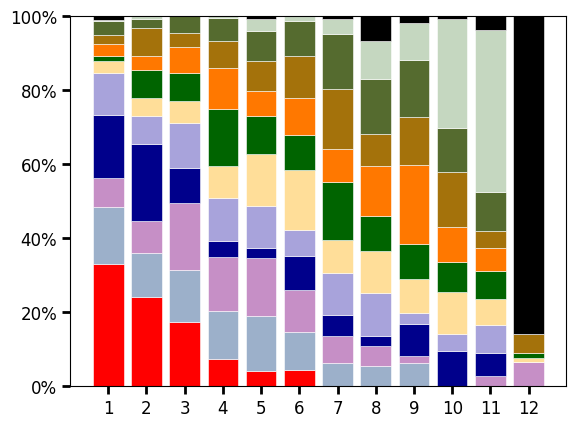

In [29]:
barx = [i for i in range(1,13)]
bottom = [0 for i in range(12)]
colorsLst = [colors[mtd] for mtd in order_]
for mtd in order_:
    height = []
    for rk in range(12):
        height.append(prop_rk[mtd][rk+1])
    plt.bar(barx, height, bottom=bottom, color=colors[mtd], edgecolor='white', linewidth=0.4)
    for _ in range(12):
        bottom[_]+=height[_]
fontsize1 = 12
plt.yticks([t/10.0 for t in [0,2,4,6,8,10]], ['{:.0%}'.format(t/10.0) for t in [0,2,4,6,8,10]])
plt.xticks([i+1 for i in range(12)])
plt.tick_params(axis='y', labelsize=fontsize1)  
plt.tick_params(axis='x', labelsize=fontsize1)
plt.tick_params(axis='y', which='major', size=6, width=2)  
plt.tick_params(axis='x', which='major', size=6, width=2)  
# plt.savefig(f'savefig_si_imm/bar_neworder.svg', format='svg', bbox_inches='tight',dpi=300)
plt.show()


In [74]:
prop_rk_ms = dict()
for mtd in immunizationMtd_s:
    prop_rk_ms[mtd] = dict()
    for rk_ in range(4):
        prop_rk_ms[mtd][rk_] = (ct[mtd][rk_*3+1]+ct[mtd][rk_*3+2]+ct[mtd][rk_*3+3])/160

In [75]:
for m in order_:
    print(prop_rk_ms[m][0]+prop_rk_ms[m][1])

1.0
0.83125
0.775
0.6875
0.6375
0.53125
0.5125
0.425
0.40625
0.35
0.0625
0.01875


In [70]:
colors_rank = {0:'firebrick', 1:'indianred',2:'royalblue',3:'navy'}

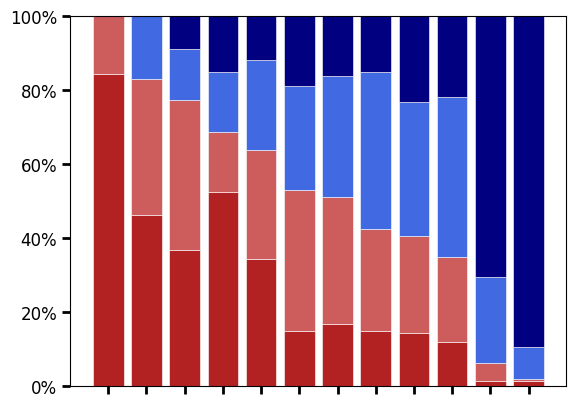

In [71]:
# order_ = ['new_neiNodeSum_1', 'degree', 'neiNodesNum', 'clsBetweenness','clsCloseness', 
#           'KMcore_g1', 'clsEigenvector', 
#           'nodeEdgeEigenvector_max', 'nodeEdgeEigenvector_linear', 'KMcore_gf','random', 'clsKcore']
barx = [i for i in range(1,13)]
bottom = [0 for i in range(12)]
colorsLst = [colors_rank[_] for _ in range(4)]
for rk in range(4):
    height = []
    for mtd in order_:
        height.append(prop_rk_ms[mtd][rk])
    # print(height)
    # print(sum(height))
    plt.bar(barx, height, bottom=bottom, color=colorsLst[rk], edgecolor='white', linewidth=0.4)
    for _ in range(12):
        bottom[_]+=height[_]
fontsize1 = 12
plt.yticks([t/10.0 for t in [0,2,4,6,8,10]], ['{:.0%}'.format(t/10.0) for t in [0,2,4,6,8,10]])
plt.xticks([i+1 for i in range(12)])
plt.tick_params(axis='y', labelsize=fontsize1) 
plt.tick_params(axis='x', labelsize=fontsize1)
plt.tick_params(axis='y', which='major', size=6, width=2)  
plt.tick_params(axis='x', which='major', size=6, width=2) 
# plt.savefig(f'savefig_si_imm/bar_measure_ranked.svg', format='svg', bbox_inches='tight',dpi=300)
plt.gca().set_xticklabels([])
plt.show()


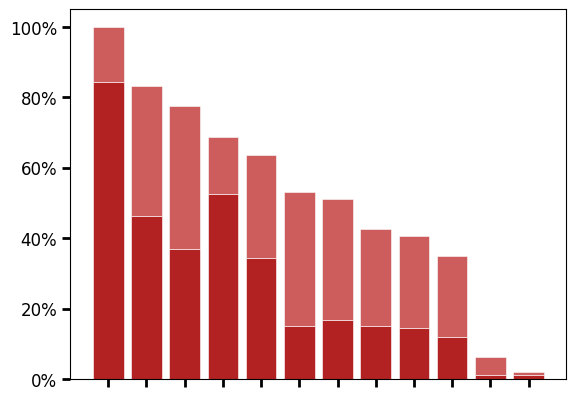

In [78]:
# order_ = ['new_neiNodeSum_1', 'degree', 'neiNodesNum', 'clsBetweenness','clsCloseness', 
#           'KMcore_g1', 'clsEigenvector', 
#           'nodeEdgeEigenvector_max', 'nodeEdgeEigenvector_linear', 'KMcore_gf','random', 'clsKcore']
barx = [i for i in range(1,13)]
bottom = [0 for i in range(12)]
colorsLst = [colors_rank[_] for _ in range(4)]
for rk in range(2):
    height = []
    for mtd in order_:
        height.append(prop_rk_ms[mtd][rk])
    # print(height)
    # print(sum(height))
    plt.bar(barx, height, bottom=bottom, color=colorsLst[rk], edgecolor='white', linewidth=0.4)
    for _ in range(12):
        bottom[_]+=height[_]
fontsize1 = 12
plt.yticks([t/10.0 for t in [0,2,4,6,8,10]], ['{:.0%}'.format(t/10.0) for t in [0,2,4,6,8,10]])
plt.xticks([i+1 for i in range(12)])
plt.tick_params(axis='y', labelsize=fontsize1)  
plt.tick_params(axis='x', labelsize=fontsize1)
plt.tick_params(axis='y', which='major', size=6, width=2)  
plt.tick_params(axis='x', which='major', size=6, width=2)  
# plt.savefig(f'savefig_si_imm/bar_measure_ranked_half.svg', format='svg', bbox_inches='tight',dpi=300)
plt.gca().set_xticklabels([])
plt.show()


In [80]:
nets_paras = dict()
nets_paras[1] = {
    1:{'net':1, 'l':[8e-05,  4e-05,  2e-05,  9e-06,]},
    2:{'net':2, 'l':[0.002,  0.0005,  0.0001,  3e-05,]},
    3:{'net':3, 'l':[0.002,  0.0006,  0.0002,  8e-05, ]},
    4:{'net':4, 'l':[0.0006,  0.0002,  5e-05,  1e-05,]},
    5:{'net':5, 'l':[0.002,  0.0007,  0.0003,  8e-05, ]},
    6:{'net':6, 'l':[5e-05,  2e-05,  7e-06,  3e-06, ]},
    7:{'net':7, 'l':[0.003,  0.0009,  0.0004,  0.0002, ]},
    8:{'net':8, 'l':[0.007,  0.003,  0.002,  0.0008, ]},
    9:{'net':9, 'l':[0.0009,  0.0005,  0.0002,  9e-05, ]},
    10:{'net':10, 'l':[0.0006,  0.0004,  0.0002,  0.0001,]},
    11:{'net':11, 'l':[0.0006,  0.0004,  0.0003,  0.0001,]},
    12:{'net':12, 'l':[0.007,  0.005,  0.002,  0.001, ]},
    13:{'net':13, 'l':[0.006,  0.004,  0.003,  0.002,]},
    14:{'net':14, 'l':[0.002,  0.002,  0.0007,  0.0004, ]},
    15:{'net':15, 'l':[0.008,  0.007,  0.005,  0.003, ]},
    16:{'net':16, 'l':[0.008,  0.006,  0.004,  0.003,  ]},
    17:{'net':17, 'l':[0.004,  0.0009,  0.0003,  7e-05, ]},
    18:{'net':18, 'l':[0.004,  0.0009,  0.0004,  0.0002,  ]},
    19:{'net':19, 'l':[0.0009,  0.0003,  0.0002,  6e-05,]},
    20:{'net':20, 'l':[0.0008,  0.0003,  9e-05,  2e-05, ]},
}
nets_paras[0.1] = {
    1:{'net':1, 'l':[8e-06,  3e-06,  2e-06,  5e-07,]},
    2:{'net':2, 'l':[0.0002,  4e-05,  7e-06,  2e-06,]},
    3:{'net':3, 'l':[0.0002,  5e-05,  8e-06,  5e-06, ]},
    4:{'net':4, 'l':[6e-05,  1e-05,  2e-06,  6e-07, ]},
    5:{'net':5, 'l':[0.0002,  6e-05,  2e-05,  4e-06,]},
    6:{'net':6, 'l':[5e-06,  1e-06,  4e-07,  2e-07,]},
    7:{'net':7, 'l':[0.0002,  7e-05,  2e-05,  7e-06,]},
    8:{'net':8, 'l':[0.0007,  0.0002,  6e-05,  3e-05,]},
    9:{'net':9, 'l':[9e-05,  4e-05,  1e-05,  4e-06, ]},
    10:{'net':10, 'l':[6e-05,  3e-05,  2e-05,  7e-06,]},
    11:{'net':11, 'l':[6e-05,  4e-05,  2e-05,  9e-06,]},
    12:{'net':12, 'l':[0.0006,  0.0004,  0.0002,  6e-05,]},
    13:{'net':13, 'l':[0.0005,  0.0003,  0.0002,  8e-05, ]},
    14:{'net':14, 'l':[0.0002,  0.0001,  5e-05,  2e-05, ]},
    15:{'net':15, 'l':[0.0007,  0.0006,  0.0004,  0.0002,]},
    16:{'net':16, 'l':[0.0008,  0.0006,  0.0004,  0.0002,]},
    17:{'net':17, 'l':[0.0003,  8e-05,  2e-05,  3e-06,]},
    18:{'net':18, 'l':[0.0004,  6e-05,  2e-05,  6e-06,]},
    19:{'net':19, 'l':[8e-05,  3e-05,  1e-05,  3e-06,]},
    20:{'net':20, 'l':[8e-05,  2e-05,  6e-06,  2e-06, ]},
}

In [79]:
colors = {'new_neiNodeSum_1':'red', 
          'degree': 'darkblue', # 'royalblue',
          'clsBetweenness': (168/255, 163/255, 219/255),# plt.cm.tab20(8), #'lavender', 
          'clsCloseness': (198/255, 143/255, 198/255), # 'thistle',  
          'clsKcore':(197/255, 215/255, 192/255), 
          'clsEigenvector': (255/255, 222/255, 153/255), # 'navajowhite', 
          'KMcore_g1': 'darkolivegreen', #'seagreen',
          'KMcore_gf': 'darkgreen', # 'darkolivegreen', 
          'neiNodesNum': (156/255, 176/255, 202/255) , #'lightsteelblue', # 'powderblue', 
          'nodeEdgeEigenvector_linear': (164/255, 114/255, 11/255), # 'darkgoldenrod', # 'darksalmon',  # 'gold',
          'nodeEdgeEigenvector_max': (255/255, 120/255, 0), # 'darkorange',
          'new_precise_prob_t2_iNum_p1':'darkred', 
          'new_precise_prob_t2_irNum_p1':'MIS-ir-$t_2$', 
          'random':'black'}

1 random [1320] [0.0003692083818393482]
1 clsBetweenness [654] [0.00038998835855646107]
1 clsCloseness [1586] [0.00033108265424912684]
1 clsKcore [1562] [0.00014650756693830025]
1 clsEigenvector [1554] [0.0001914435389988359]
1 neiNodesNum [1471] [0.0]
1 KMcore_g1 [771] [0.0004066356228172293]
1 KMcore_gf [611] [0.0003746216530849827]
1 nodeEdgeEigenvector_linear [673] [0.00041885913853317814]
1 nodeEdgeEigenvector_max [613] [0.0004176367869615832]
1 degree [353] [0.0]
1 new_neiNodeSum_1 [342] [0.00042147846332945285]
[342] [0.00042147846332945285]


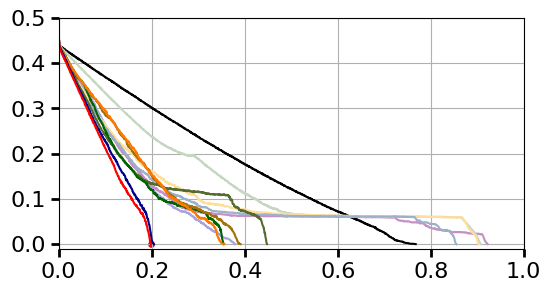

1 random [1498] [0.00039534342258440056]
1 clsBetweenness [867] [0.00048643771827706656]
1 clsCloseness [1648] [0.0002987194412107104]
1 clsKcore [1629] [0.0004124563445867292]
1 clsEigenvector [1645] [0.0003455762514551809]
1 neiNodesNum [1549] [0.0004044237485448198]
1 KMcore_g1 [980] [0.0003834109429569266]
1 KMcore_gf [851] [0.0005502328288707802]
1 nodeEdgeEigenvector_linear [1046] [0.0005284633294528519]
1 nodeEdgeEigenvector_max [985] [0.0005192083818393485]
1 degree [622] [0.0005649592549476133]
1 new_neiNodeSum_1 [639] [0.0005382421420256112]
[639] [0.0005382421420256112]


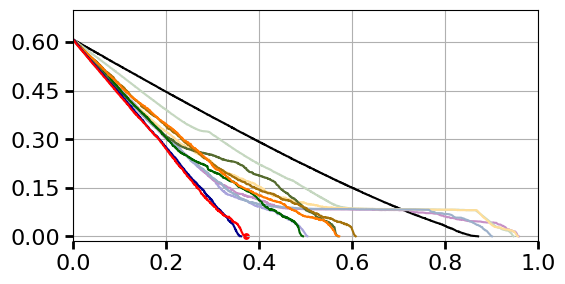

1 random [1411] [0.0003724097788125727]
1 clsBetweenness [957] [0.0004006402793946451]
1 clsCloseness [1660] [0.00043626309662398143]
1 clsKcore [1658] [0.0]
1 clsEigenvector [1664] [0.0]
1 neiNodesNum [1583] [0.000159254947613504]
1 KMcore_g1 [1120] [0.0]
1 KMcore_gf [1029] [0.0]
1 nodeEdgeEigenvector_linear [1315] [3.166472642607686e-05]
1 nodeEdgeEigenvector_max [1256] [0.0]
1 degree [871] [6.693830034924326e-06]
1 new_neiNodeSum_1 [859] [0.0]
[859] [0.0]


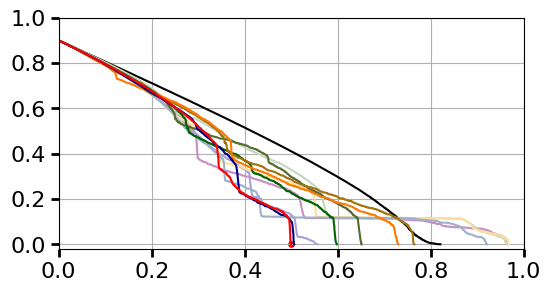

1 random [1507] [0.0002664144353899884]
1 clsBetweenness [1200] [0.00048242142025611167]
1 clsCloseness [1673] [0.0]
1 clsKcore [1667] [0.0005305587892898724]
1 clsEigenvector [1670] [0.0]
1 neiNodesNum [1617] [0.0002849825378346915]
1 KMcore_g1 [1185] [0.0]
1 KMcore_gf [1118] [0.00013428405122235142]
1 nodeEdgeEigenvector_linear [1409] [0.0]
1 nodeEdgeEigenvector_max [1350] [0.000562456344586729]
1 degree [989] [0.0]
1 new_neiNodeSum_1 [1005] [0.0]
[1005] [0.0]


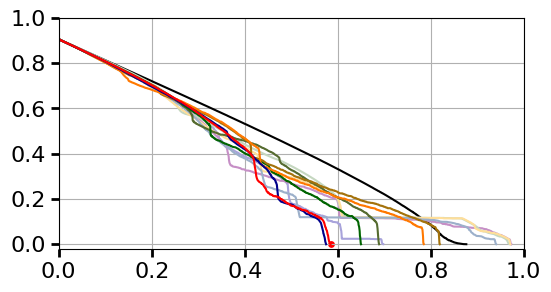

1 random [1310] [0.00045285215366705473]
1 clsBetweenness [655] [0.0005563445867287545]
1 clsCloseness [1584] [0.00025692665890570456]
1 clsKcore [1560] [8.928987194412117e-05]
1 clsEigenvector [1551] [0.00019516880093131572]
1 neiNodesNum [1467] [0.0005439464493597209]
1 KMcore_g1 [769] [0.00042031431897555303]
1 KMcore_gf [610] [0.00024196740395809088]
1 nodeEdgeEigenvector_linear [670] [0.00036222351571594874]
1 nodeEdgeEigenvector_max [599] [0.0005115832363213037]
1 degree [347] [4.272409778812572e-05]
1 new_neiNodeSum_1 [338] [0.00025547147846332946]
[338] [0.00025547147846332946]


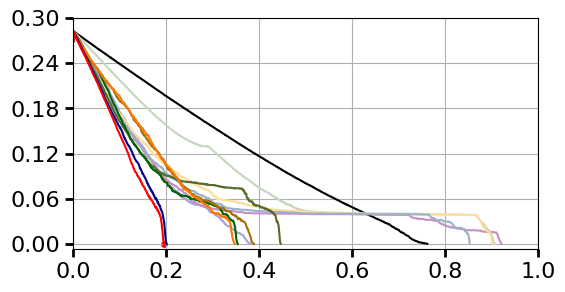

1 random [1498] [0.0005625145518044243]
1 clsBetweenness [885] [0.000442840512223516]
1 clsCloseness [1645] [0.0005586728754365548]
1 clsKcore [1629] [0.0002815483119906872]
1 clsEigenvector [1644] [0.00022532013969732277]
1 neiNodesNum [1546] [0.0004519208381839354]
1 KMcore_g1 [976] [0.0003647846332945286]
1 KMcore_gf [846] [0.0004153084982537834]
1 nodeEdgeEigenvector_linear [1047] [0.0005719441210710128]
1 nodeEdgeEigenvector_max [973] [0.0004292782305005821]
1 degree [616] [0.0005171129220023285]
1 new_neiNodeSum_1 [633] [0.00047467986030267766]
[633] [0.00047467986030267766]


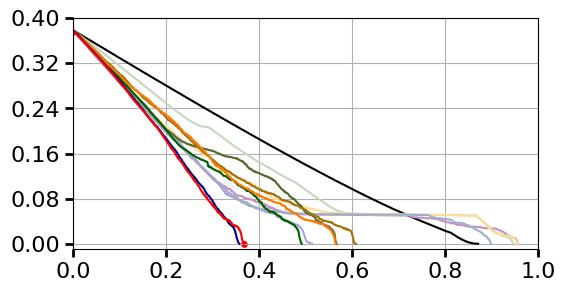

1 random [1314] [0.0005036088474970899]
1 clsBetweenness [906] [0.0005066356228172297]
1 clsCloseness [1651] [0.00015593713620488952]
1 clsKcore [1645] [0.00023020954598370225]
1 clsEigenvector [1650] [0.0]
1 neiNodesNum [1567] [0.0]
1 KMcore_g1 [1036] [0.0]
1 KMcore_gf [933] [0.000368393480791618]
1 nodeEdgeEigenvector_linear [1145] [0.0]
1 nodeEdgeEigenvector_max [1091] [0.0]
1 degree [697] [0.0]
1 new_neiNodeSum_1 [691] [0.0]
[691] [0.0]


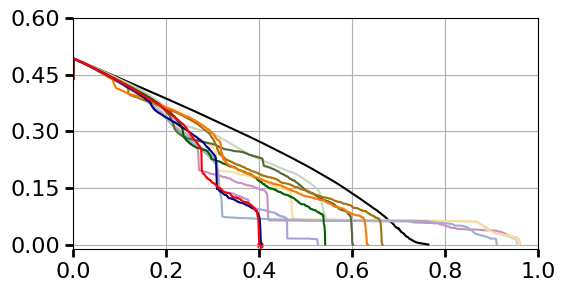

1 random [1442] [0.0004135622817229337]
1 clsBetweenness [973] [0.0003488358556461004]
1 clsCloseness [1663] [0.00027793946449359755]
1 clsKcore [1659] [0.0002904540162980213]
1 clsEigenvector [1665] [9.470314318975566e-05]
1 neiNodesNum [1592] [0.0004305587892898725]
1 KMcore_g1 [1126] [0.0]
1 KMcore_gf [1037] [0.0]
1 nodeEdgeEigenvector_linear [1322] [0.0]
1 nodeEdgeEigenvector_max [1265] [0.0]
1 degree [881] [0.0]
1 new_neiNodeSum_1 [881] [0.0]
[881] [0.0]


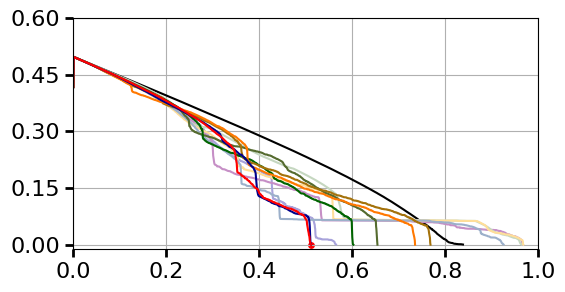

2 random [1075] [0.00046914728682170533]
2 clsBetweenness [509] [0.0007118604651162791]
2 clsCloseness [603] [0.00042914728682170544]
2 clsKcore [695] [0.00018744186046511628]
2 clsEigenvector [700] [0.0007214728682170543]
2 neiNodesNum [581] [0.0006589147286821703]
2 KMcore_g1 [692] [0.00035465116279069763]
2 KMcore_gf [654] [0.00034860465116279065]
2 nodeEdgeEigenvector_linear [591] [0.0007465116279069764]
2 nodeEdgeEigenvector_max [553] [0.0004399999999999999]
2 degree [514] [2.7906976744186046e-06]
2 new_neiNodeSum_1 [515] [1.4186046511627909e-05]
[515] [1.4186046511627909e-05]


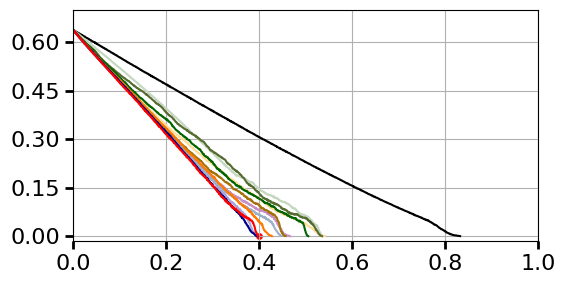

2 random [1174] [0.0006303875968992248]
2 clsBetweenness [687] [0.00017829457364341078]
2 clsCloseness [934] [0.0006436434108527132]
2 clsKcore [898] [0.00047356589147286825]
2 clsEigenvector [910] [0.0006954263565891475]
2 neiNodesNum [779] [0.0005196899224806201]
2 KMcore_g1 [839] [0.00021922480620155038]
2 KMcore_gf [872] [0.0007632558139534884]
2 nodeEdgeEigenvector_linear [760] [0.0005498449612403096]
2 nodeEdgeEigenvector_max [780] [0.0007111627906976744]
2 degree [702] [0.0005627131782945734]
2 new_neiNodeSum_1 [709] [0.00017534883720930243]
[709] [0.00017534883720930243]


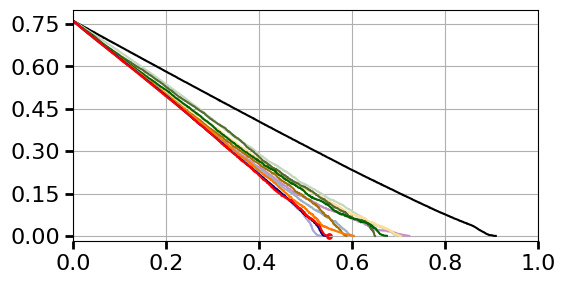

2 random [1079] [0.0004484496124031006]
2 clsBetweenness [733] [0.0005665116279069765]
2 clsCloseness [1209] [0.00034023255813953474]
2 clsKcore [1088] [0.000577596899224806]
2 clsEigenvector [1102] [0.0003886821705426356]
2 neiNodesNum [959] [0.0006061240310077516]
2 KMcore_g1 [877] [0.0]
2 KMcore_gf [923] [0.00063984496124031]
2 nodeEdgeEigenvector_linear [895] [0.0003007751937984498]
2 nodeEdgeEigenvector_max [989] [0.00047852713178294563]
2 degree [784] [0.00042643410852713173]
2 new_neiNodeSum_1 [749] [0.00020426356589147278]
[749] [0.00020426356589147278]


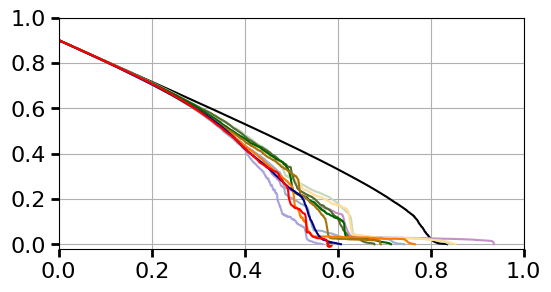

2 random [1123] [0.0006536434108527129]
2 clsBetweenness [933] [0.0005113953488372092]
2 clsCloseness [1230] [0.0]
2 clsKcore [1140] [0.0003813178294573644]
2 clsEigenvector [1162] [0.00044550387596899236]
2 neiNodesNum [1037] [0.0002950387596899225]
2 KMcore_g1 [935] [0.00039007751937984475]
2 KMcore_gf [1007] [0.0007590697674418602]
2 nodeEdgeEigenvector_linear [1023] [0.0006142635658914727]
2 nodeEdgeEigenvector_max [1108] [0.0006327131782945736]
2 degree [908] [0.0007279844961240307]
2 new_neiNodeSum_1 [827] [0.00017255813953488366]
[827] [0.00017255813953488366]


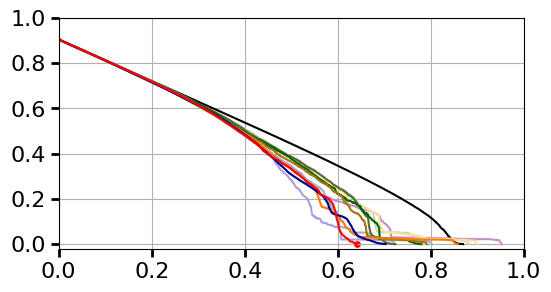

2 random [1074] [0.0007593798449612403]
2 clsBetweenness [509] [0.0003005426356589146]
2 clsCloseness [609] [0.0004254263565891475]
2 clsKcore [696] [0.0005407751937984497]
2 clsEigenvector [710] [0.0006256589147286822]
2 neiNodesNum [587] [0.0007413953488372094]
2 KMcore_g1 [692] [0.000654496124031008]
2 KMcore_gf [655] [0.0007158914728682172]
2 nodeEdgeEigenvector_linear [589] [0.0007096124031007752]
2 nodeEdgeEigenvector_max [551] [0.0007316279069767444]
2 degree [511] [0.0005550387596899225]
2 new_neiNodeSum_1 [513] [0.0007427131782945736]
[513] [0.0007427131782945736]


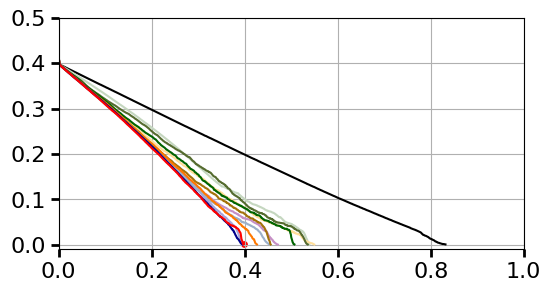

2 random [1166] [0.0007567441860465116]
2 clsBetweenness [686] [0.0001775968992248061]
2 clsCloseness [944] [0.0007489922480620157]
2 clsKcore [901] [0.0006927906976744185]
2 clsEigenvector [915] [0.0004950387596899224]
2 neiNodesNum [793] [0.0007661240310077518]
2 KMcore_g1 [838] [0.00040364341085271315]
2 KMcore_gf [874] [0.0001609302325581395]
2 nodeEdgeEigenvector_linear [762] [0.0006008527131782944]
2 nodeEdgeEigenvector_max [788] [0.0004909302325581395]
2 degree [700] [0.00017627906976744188]
2 new_neiNodeSum_1 [704] [0.00045744186046511626]
[704] [0.00045744186046511626]


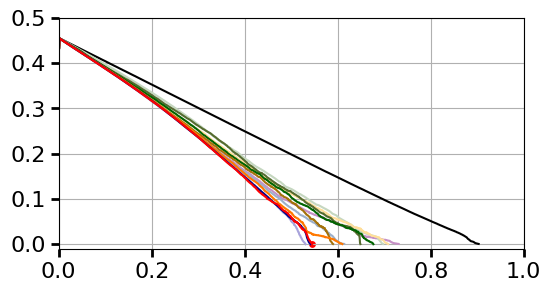

2 random [1036] [0.0006296899224806202]
2 clsBetweenness [619] [0.0]
2 clsCloseness [1139] [0.00048062015503875984]
2 clsKcore [1038] [0.0004909302325581395]
2 clsEigenvector [1021] [0.0]
2 neiNodesNum [913] [0.00024984496124031016]
2 KMcore_g1 [837] [0.0]
2 KMcore_gf [874] [0.0]
2 nodeEdgeEigenvector_linear [778] [0.0006772093023255814]
2 nodeEdgeEigenvector_max [934] [0.0006652713178294574]
2 degree [696] [0.0007103875968992249]
2 new_neiNodeSum_1 [653] [0.00013558139534883712]
[653] [0.00013558139534883712]


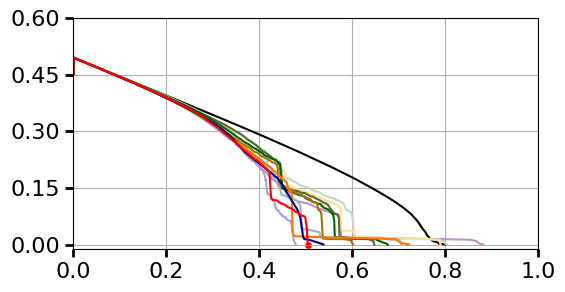

2 random [1100] [0.0007591472868217053]
2 clsBetweenness [921] [0.0004810077519379842]
2 clsCloseness [1224] [0.0]
2 clsKcore [1119] [0.0007192248062015499]
2 clsEigenvector [1147] [0.0005950387596899222]
2 neiNodesNum [1012] [0.00050953488372093]
2 KMcore_g1 [893] [0.0004882945736434109]
2 KMcore_gf [950] [0.0003454263565891473]
2 nodeEdgeEigenvector_linear [962] [0.0007519379844961241]
2 nodeEdgeEigenvector_max [1091] [0.0007524806201550389]
2 degree [860] [0.0005611627906976746]
2 new_neiNodeSum_1 [791] [0.0]
[791] [0.0]


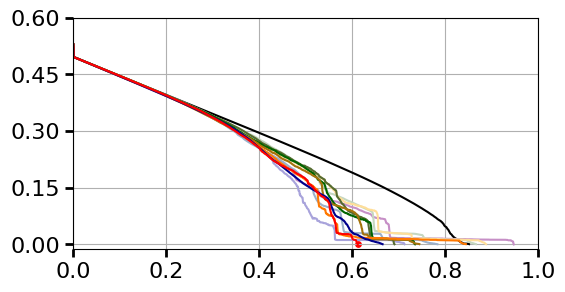

3 random [321] [0.0022278571428571395]
3 clsBetweenness [86] [0.0015042857142857123]
3 clsCloseness [64] [0.0010499999999999995]
3 clsKcore [118] [0.0]
3 clsEigenvector [64] [0.0006071428571428567]
3 neiNodesNum [65] [0.00047952380952380935]
3 KMcore_g1 [96] [0.0006252380952380948]
3 KMcore_gf [71] [0.002264523809523807]
3 nodeEdgeEigenvector_linear [67] [0.0012947619047619034]
3 nodeEdgeEigenvector_max [65] [0.0006352380952380943]
3 degree [68] [0.0009345238095238082]
3 new_neiNodeSum_1 [60] [0.0021511904761904728]
[60] [0.0021511904761904728]


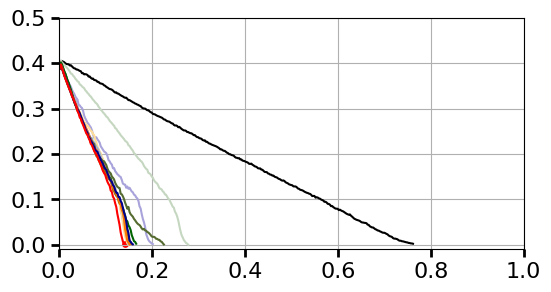

3 random [360] [0.002223809523809521]
3 clsBetweenness [135] [0.001343809523809522]
3 clsCloseness [111] [0.0014699999999999982]
3 clsKcore [156] [0.0005509523809523807]
3 clsEigenvector [140] [0.0016138095238095224]
3 neiNodesNum [107] [0.0004135714285714283]
3 KMcore_g1 [137] [0.0002349999999999998]
3 KMcore_gf [112] [0.00110047619047619]
3 nodeEdgeEigenvector_linear [113] [0.0017990476190476168]
3 nodeEdgeEigenvector_max [114] [0.0007802380952380942]
3 degree [122] [0.0018283333333333316]
3 new_neiNodeSum_1 [106] [0.00040833333333333303]
[106] [0.00040833333333333303]


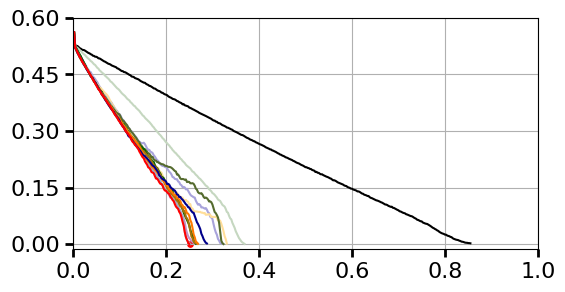

3 random [337] [0.0016647619047619028]
3 clsBetweenness [169] [0.001164047619047617]
3 clsCloseness [156] [0.0022392857142857097]
3 clsKcore [148] [0.0010878571428571415]
3 clsEigenvector [151] [0.0]
3 neiNodesNum [141] [0.0]
3 KMcore_g1 [148] [0.0]
3 KMcore_gf [157] [0.002185952380952377]
3 nodeEdgeEigenvector_linear [157] [0.0011576190476190456]
3 nodeEdgeEigenvector_max [160] [0.0]
3 degree [169] [0.0014083333333333309]
3 new_neiNodeSum_1 [151] [0.0]
[151] [0.0]


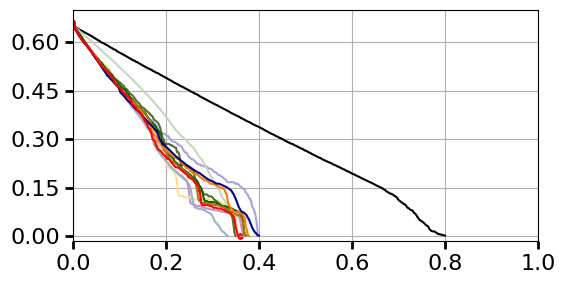

3 random [354] [0.001409761904761903]
3 clsBetweenness [200] [0.00044595238095238016]
3 clsCloseness [162] [0.0018738095238095206]
3 clsKcore [159] [0.0018373809523809504]
3 clsEigenvector [156] [0.0013997619047619024]
3 neiNodesNum [160] [0.000922619047619046]
3 KMcore_g1 [153] [0.0020299999999999967]
3 KMcore_gf [167] [0.001914523809523806]
3 nodeEdgeEigenvector_linear [165] [0.0008821428571428558]
3 nodeEdgeEigenvector_max [173] [0.0014640476190476166]
3 degree [187] [0.0021138095238095195]
3 new_neiNodeSum_1 [158] [0.0]
[158] [0.0]


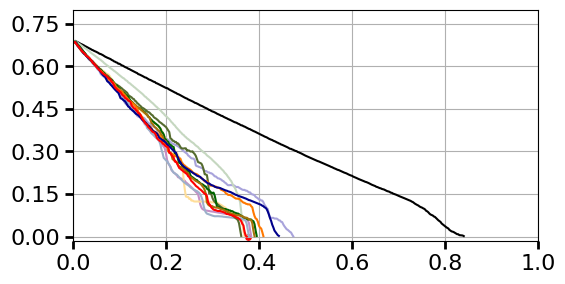

3 random [321] [0.002263809523809521]
3 clsBetweenness [85] [0.0019878571428571397]
3 clsCloseness [63] [0.00047928571428571383]
3 clsKcore [116] [0.0]
3 clsEigenvector [63] [0.0021180952380952345]
3 neiNodesNum [64] [0.0011235714285714273]
3 KMcore_g1 [96] [0.002244523809523806]
3 KMcore_gf [70] [0.0014116666666666644]
3 nodeEdgeEigenvector_linear [66] [0.0005495238095238089]
3 nodeEdgeEigenvector_max [64] [0.002345238095238092]
3 degree [67] [0.0017040476190476163]
3 new_neiNodeSum_1 [59] [0.0016271428571428548]
[59] [0.0016271428571428548]


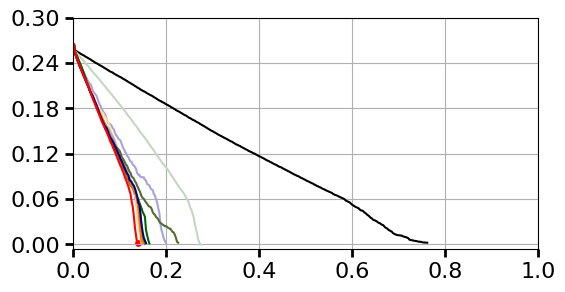

3 random [362] [0.0022640476190476156]
3 clsBetweenness [135] [0.0011742857142857123]
3 clsCloseness [111] [0.0007359523809523799]
3 clsKcore [157] [0.00137690476190476]
3 clsEigenvector [140] [0.00044976190476190425]
3 neiNodesNum [106] [0.001764285714285712]
3 KMcore_g1 [136] [0.0]
3 KMcore_gf [112] [0.0006154761904761897]
3 nodeEdgeEigenvector_linear [113] [0.0017640476190476163]
3 nodeEdgeEigenvector_max [114] [0.0018809523809523781]
3 degree [121] [0.0016457142857142831]
3 new_neiNodeSum_1 [106] [0.0]
[106] [0.0]


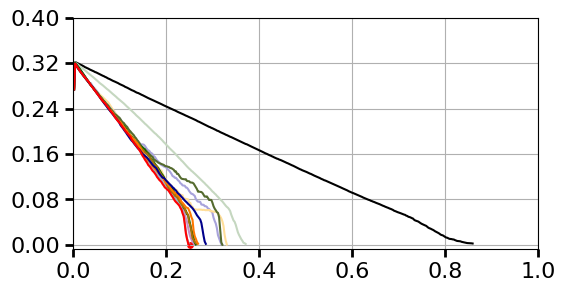

3 random [342] [0.0017883333333333306]
3 clsBetweenness [187] [0.0]
3 clsCloseness [158] [0.0003249999999999997]
3 clsKcore [149] [0.002219047619047616]
3 clsEigenvector [152] [0.0]
3 neiNodesNum [155] [0.000680714285714285]
3 KMcore_g1 [149] [0.0006592857142857136]
3 KMcore_gf [159] [0.00032785714285714254]
3 nodeEdgeEigenvector_linear [160] [0.0003214285714285712]
3 nodeEdgeEigenvector_max [165] [0.0]
3 degree [172] [0.0010085714285714277]
3 new_neiNodeSum_1 [152] [0.0003195238095238092]
[152] [0.0003195238095238092]


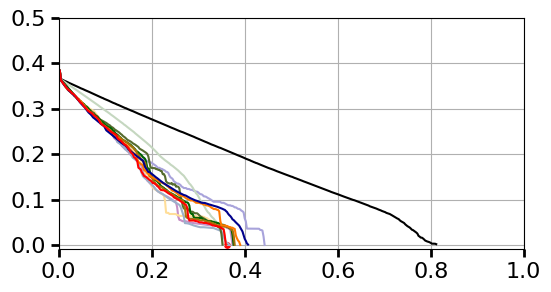

3 random [358] [0.001955952380952378]
3 clsBetweenness [222] [3.5e-05]
3 clsCloseness [165] [0.0]
3 clsKcore [167] [0.0022740476190476165]
3 clsEigenvector [159] [0.0]
3 neiNodesNum [162] [0.0005457142857142847]
3 KMcore_g1 [155] [0.0]
3 KMcore_gf [170] [0.0]
3 nodeEdgeEigenvector_linear [168] [0.0]
3 nodeEdgeEigenvector_max [176] [0.0005685714285714274]
3 degree [195] [0.0020564285714285676]
3 new_neiNodeSum_1 [161] [0.0]
[161] [0.0]


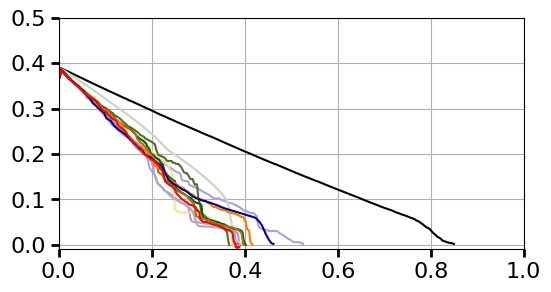

4 random [439] [0.0013144827586206898]
4 clsBetweenness [133] [0.0008282758620689656]
4 clsCloseness [94] [0.00041034482758620685]
4 clsKcore [191] [0.0016360344827586206]
4 clsEigenvector [86] [0.0004579310344827588]
4 neiNodesNum [93] [0.0004551724137931035]
4 KMcore_g1 [74] [0.0012567241379310345]
4 KMcore_gf [73] [0.0006868965517241376]
4 nodeEdgeEigenvector_linear [72] [0.0011389655172413795]
4 nodeEdgeEigenvector_max [78] [0.001087758620689655]
4 degree [83] [0.0011129310344827584]
4 new_neiNodeSum_1 [73] [0.0]
[73] [0.0]


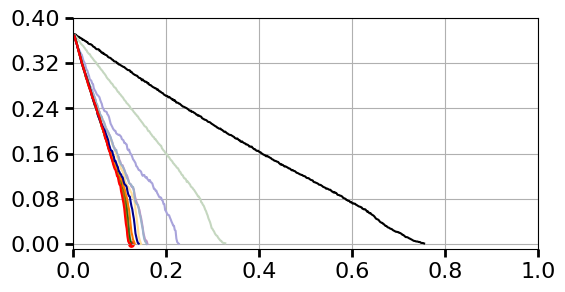

4 random [494] [0.001630689655172414]
4 clsBetweenness [192] [0.0014229310344827592]
4 clsCloseness [136] [0.0008677586206896548]
4 clsKcore [221] [0.0006100000000000001]
4 clsEigenvector [133] [0.0011120689655172414]
4 neiNodesNum [136] [0.000546551724137931]
4 KMcore_g1 [134] [0.0014998275862068966]
4 KMcore_gf [126] [3.275862068965517e-06]
4 nodeEdgeEigenvector_linear [124] [0.0009134482758620686]
4 nodeEdgeEigenvector_max [133] [0.0012089655172413793]
4 degree [142] [0.00017482758620689654]
4 new_neiNodeSum_1 [123] [0.0010029310344827585]
[123] [0.0010029310344827585]


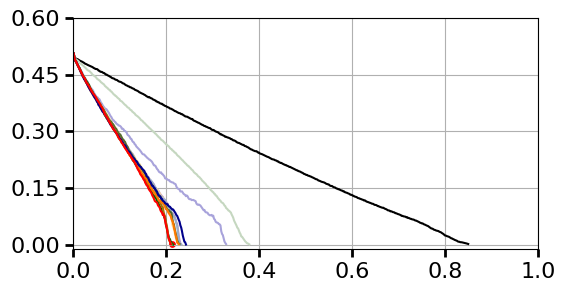

4 random [492] [0.0009637931034482757]
4 clsBetweenness [325] [7.948275862068951e-05]
4 clsCloseness [193] [0.0011267241379310346]
4 clsKcore [244] [0.0]
4 clsEigenvector [240] [0.001066034482758621]
4 neiNodesNum [193] [0.0005905172413793101]
4 KMcore_g1 [237] [0.0009701724137931031]
4 KMcore_gf [229] [0.0006617241379310346]
4 nodeEdgeEigenvector_linear [218] [0.0]
4 nodeEdgeEigenvector_max [258] [0.0005668965517241383]
4 degree [299] [0.0006074137931034482]
4 new_neiNodeSum_1 [204] [0.0006608620689655171]
[204] [0.0006608620689655171]


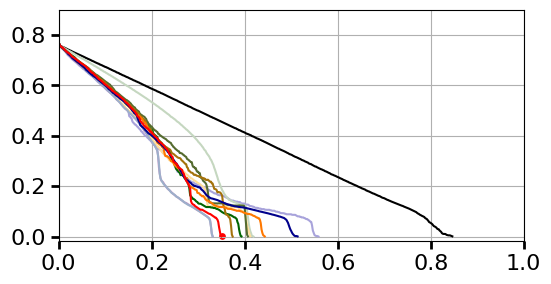

4 random [511] [0.0017001724137931037]
4 clsBetweenness [356] [0.0]
4 clsCloseness [259] [0.00052]
4 clsKcore [301] [0.0011898275862068962]
4 clsEigenvector [290] [0.0005141379310344828]
4 neiNodesNum [260] [0.0]
4 KMcore_g1 [251] [0.0015768965517241388]
4 KMcore_gf [249] [0.0]
4 nodeEdgeEigenvector_linear [255] [0.0]
4 nodeEdgeEigenvector_max [275] [0.001008793103448276]
4 degree [313] [0.0010608620689655176]
4 new_neiNodeSum_1 [236] [0.0005117241379310347]
[236] [0.0005117241379310347]


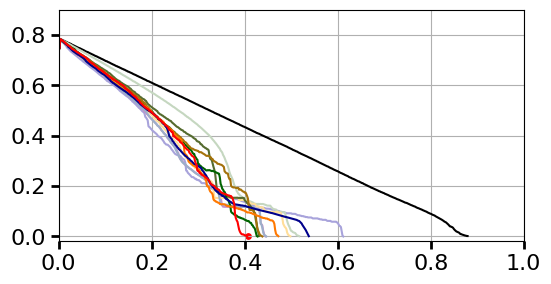

4 random [441] [0.0017001724137931035]
4 clsBetweenness [131] [0.00027844827586206896]
4 clsCloseness [92] [0.001183448275862069]
4 clsKcore [193] [0.0011915517241379314]
4 clsEigenvector [85] [0.0]
4 neiNodesNum [90] [0.001330344827586207]
4 KMcore_g1 [72] [0.0009817241379310344]
4 KMcore_gf [71] [0.0012653448275862069]
4 nodeEdgeEigenvector_linear [70] [0.0008215517241379314]
4 nodeEdgeEigenvector_max [76] [0.00045413793103448293]
4 degree [80] [0.00044155172413793103]
4 new_neiNodeSum_1 [70] [0.0008356896551724139]
[70] [0.0008356896551724139]


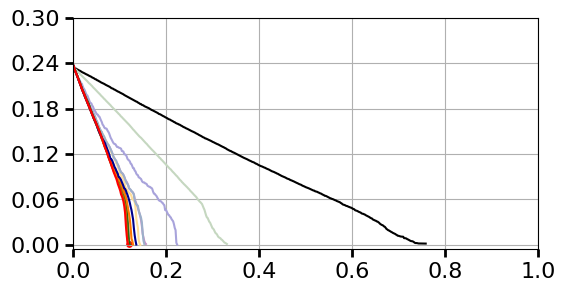

4 random [500] [0.0017089655172413802]
4 clsBetweenness [191] [0.00033275862068965506]
4 clsCloseness [134] [0.0008158620689655174]
4 clsKcore [219] [0.0011444827586206895]
4 clsEigenvector [131] [0.0012784482758620688]
4 neiNodesNum [134] [0.0]
4 KMcore_g1 [134] [0.0]
4 KMcore_gf [122] [0.0008699999999999998]
4 nodeEdgeEigenvector_linear [122] [0.00040499999999999987]
4 nodeEdgeEigenvector_max [131] [0.0007413793103448277]
4 degree [142] [0.00039431034482758623]
4 new_neiNodeSum_1 [121] [0.00045982758620689666]
[121] [0.00045982758620689666]


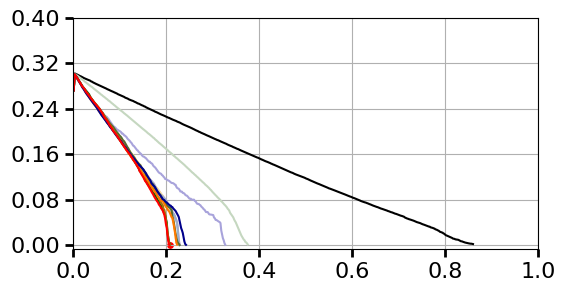

4 random [495] [0.0014955172413793102]
4 clsBetweenness [331] [0.0010696551724137923]
4 clsCloseness [198] [0.0006186206896551722]
4 clsKcore [263] [0.0005998275862068967]
4 clsEigenvector [248] [0.0]
4 neiNodesNum [206] [0.0012191379310344834]
4 KMcore_g1 [241] [0.0]
4 KMcore_gf [233] [0.0]
4 nodeEdgeEigenvector_linear [221] [0.0007584482758620692]
4 nodeEdgeEigenvector_max [263] [0.0]
4 degree [301] [0.0003705172413793105]
4 new_neiNodeSum_1 [208] [0.00036396551724137934]
[208] [0.00036396551724137934]


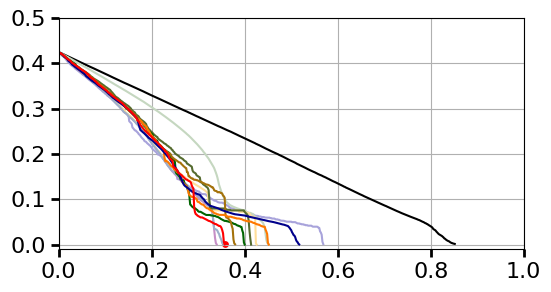

4 random [513] [0.0014932758620689653]
4 clsBetweenness [358] [0.0]
4 clsCloseness [264] [0.0003008620689655171]
4 clsKcore [315] [0.0012760344827586194]
4 clsEigenvector [300] [0.0015534482758620676]
4 neiNodesNum [265] [0.0]
4 KMcore_g1 [273] [0.0012517241379310336]
4 KMcore_gf [252] [0.00033551724137931033]
4 nodeEdgeEigenvector_linear [272] [0.0008910344827586203]
4 nodeEdgeEigenvector_max [294] [6.724137931034482e-06]
4 degree [316] [0.0]
4 new_neiNodeSum_1 [250] [0.0015656896551724125]
[250] [0.0015656896551724125]


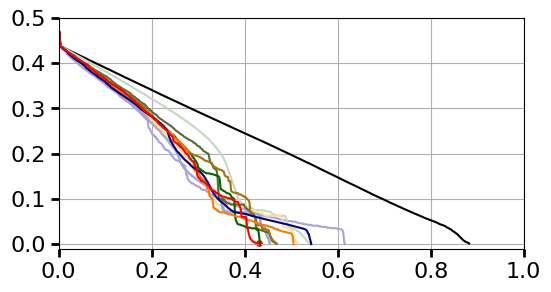

5 random [866] [0.0008958333333333329]
5 clsBetweenness [575] [0.0007894927536231885]
5 clsCloseness [328] [0.0008457427536231882]
5 clsKcore [555] [0.000736141304347826]
5 clsEigenvector [491] [0.00035905797101449264]
5 neiNodesNum [316] [0.00016721014492753622]
5 KMcore_g1 [430] [0.0008261775362318841]
5 KMcore_gf [357] [0.0004506340579710147]
5 nodeEdgeEigenvector_linear [495] [0.00037826086956521747]
5 nodeEdgeEigenvector_max [351] [0.0007938405797101447]
5 degree [377] [0.0003658514492753623]
5 new_neiNodeSum_1 [318] [0.00048233695652173924]
[318] [0.00048233695652173924]


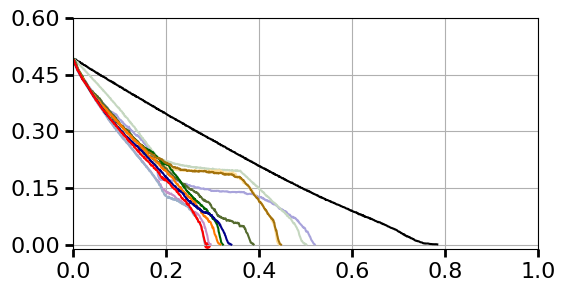

5 random [968] [0.000678623188405797]
5 clsBetweenness [744] [0.0008269927536231886]
5 clsCloseness [535] [0.0005432065217391305]
5 clsKcore [647] [0.0006507246376811592]
5 clsEigenvector [606] [0.0008340579710144931]
5 neiNodesNum [506] [0.0002076992753623187]
5 KMcore_g1 [621] [0.00014791666666666658]
5 KMcore_gf [603] [0.0006117753623188407]
5 nodeEdgeEigenvector_linear [613] [0.000883967391304348]
5 nodeEdgeEigenvector_max [603] [0.00076268115942029]
5 degree [704] [0.00024057971014492755]
5 new_neiNodeSum_1 [546] [0.0005837862318840581]
[546] [0.0005837862318840581]


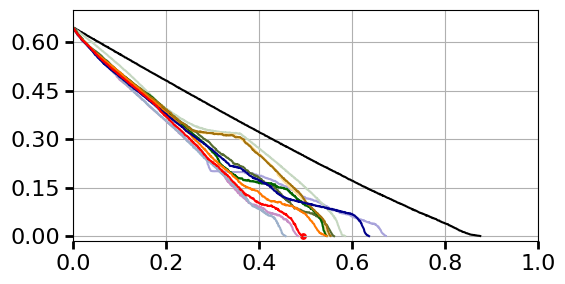

5 random [937] [0.0008779891304347824]
5 clsBetweenness [792] [0.0006340579710144929]
5 clsCloseness [795] [0.0]
5 clsKcore [928] [0.0004529891304347828]
5 clsEigenvector [908] [0.0007704710144927536]
5 neiNodesNum [872] [0.0004380434782608699]
5 KMcore_g1 [921] [0.0]
5 KMcore_gf [873] [0.0]
5 nodeEdgeEigenvector_linear [762] [0.0005455615942028985]
5 nodeEdgeEigenvector_max [838] [6.077898550724636e-05]
5 degree [834] [0.0005064311594202898]
5 new_neiNodeSum_1 [808] [0.0008488224637681161]
[808] [0.0008488224637681161]


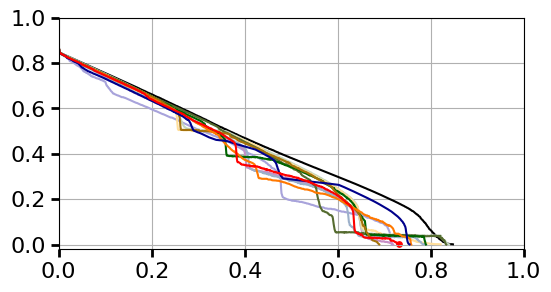

5 random [972] [0.0008902173913043481]
5 clsBetweenness [825] [0.0]
5 clsCloseness [884] [0.0008156702898550721]
5 clsKcore [948] [0.0005442028985507244]
5 clsEigenvector [927] [0.0]
5 neiNodesNum [914] [0.0003359601449275362]
5 KMcore_g1 [947] [0.0]
5 KMcore_gf [924] [0.0003317934782608694]
5 nodeEdgeEigenvector_linear [850] [0.0004024456521739131]
5 nodeEdgeEigenvector_max [868] [0.0002856884057971014]
5 degree [896] [0.0007918478260869566]
5 new_neiNodeSum_1 [875] [0.0007369565217391301]
[875] [0.0007369565217391301]


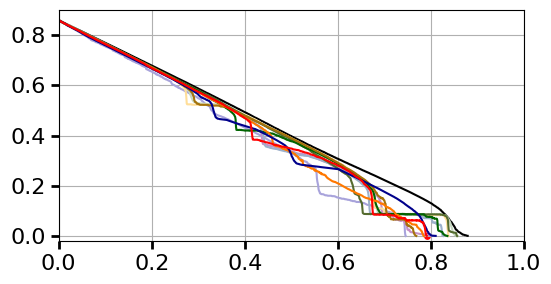

5 random [852] [0.0009052536231884057]
5 clsBetweenness [572] [0.0006974637681159419]
5 clsCloseness [324] [0.0002947463768115942]
5 clsKcore [554] [0.0005584239130434781]
5 clsEigenvector [487] [0.0008557971014492751]
5 neiNodesNum [313] [0.0007896739130434783]
5 KMcore_g1 [428] [0.00021449275362318842]
5 KMcore_gf [353] [0.0006100543478260868]
5 nodeEdgeEigenvector_linear [490] [0.000684873188405797]
5 nodeEdgeEigenvector_max [348] [0.0008782608695652175]
5 degree [372] [0.0006740036231884057]
5 new_neiNodeSum_1 [315] [0.0008871376811594203]
[315] [0.0008871376811594203]


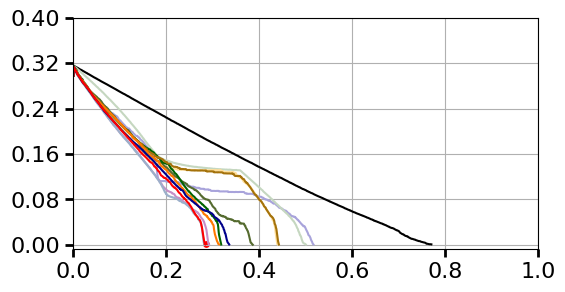

5 random [965] [0.000895018115942029]
5 clsBetweenness [740] [0.00037880434782608684]
5 clsCloseness [534] [0.00030706521739130437]
5 clsKcore [644] [0.0008519927536231885]
5 clsEigenvector [606] [0.00033306159420289853]
5 neiNodesNum [504] [0.0008000905797101448]
5 KMcore_g1 [622] [0.0]
5 KMcore_gf [602] [0.00023215579710144925]
5 nodeEdgeEigenvector_linear [610] [0.0008177536231884059]
5 nodeEdgeEigenvector_max [599] [0.0002800724637681162]
5 degree [702] [0.0004946557971014493]
5 new_neiNodeSum_1 [543] [0.0006122282608695654]
[543] [0.0006122282608695654]


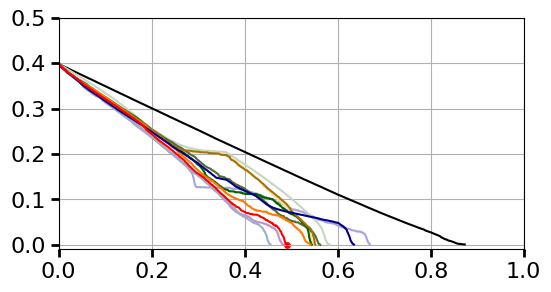

5 random [919] [0.0008826992753623189]
5 clsBetweenness [772] [0.0]
5 clsCloseness [707] [0.00025362318840579706]
5 clsKcore [722] [0.0007644927536231878]
5 clsEigenvector [755] [0.00022056159420289867]
5 neiNodesNum [705] [0.000732427536231884]
5 KMcore_g1 [738] [0.0008267210144927532]
5 KMcore_gf [695] [0.0]
5 nodeEdgeEigenvector_linear [735] [0.0002620471014492755]
5 nodeEdgeEigenvector_max [835] [0.0006029891304347827]
5 degree [815] [0.0005990036231884059]
5 new_neiNodeSum_1 [697] [0.0008586956521739128]
[697] [0.0008586956521739128]


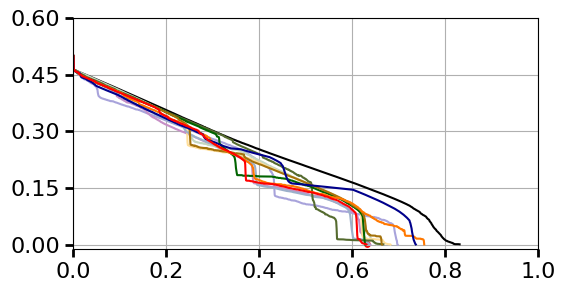

5 random [964] [0.0008133152173913044]
5 clsBetweenness [811] [0.0]
5 clsCloseness [836] [0.0008551630434782612]
5 clsKcore [942] [0.000769202898550725]
5 clsEigenvector [925] [0.00042780797101449287]
5 neiNodesNum [908] [0.0007559782608695658]
5 KMcore_g1 [934] [0.0008519021739130439]
5 KMcore_gf [903] [0.0007675724637681161]
5 nodeEdgeEigenvector_linear [827] [2.4456521739130433e-06]
5 nodeEdgeEigenvector_max [843] [0.0006086956521739128]
5 degree [869] [0.0008894021739130433]
5 new_neiNodeSum_1 [868] [0.0]
[868] [0.0]


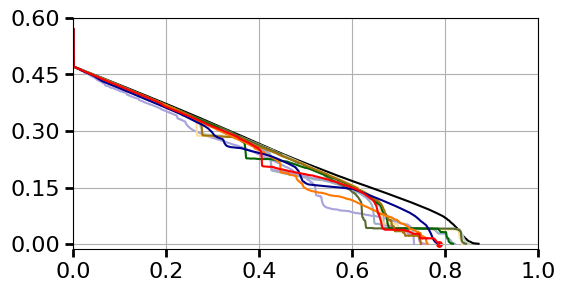

6 random [227] [0.002577891156462585]
6 clsBetweenness [115] [0.003352380952380952]
6 clsCloseness [116] [0.0019724489795918372]
6 clsKcore [158] [0.0022013605442176873]
6 clsEigenvector [126] [0.00038809523809523795]
6 neiNodesNum [116] [0.003311904761904762]
6 KMcore_g1 [101] [0.0006870748299319728]
6 KMcore_gf [95] [0.0006204081632653062]
6 nodeEdgeEigenvector_linear [95] [0.0012193877551020407]
6 nodeEdgeEigenvector_max [92] [0.0010210884353741496]
6 degree [91] [0.0015176870748299315]
6 new_neiNodeSum_1 [91] [0.0010173469387755104]
[91] [0.0010173469387755104]


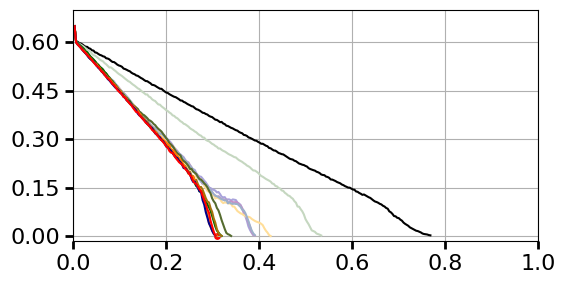

6 random [253] [0.003113945578231293]
6 clsBetweenness [191] [0.0005806122448979589]
6 clsCloseness [170] [0.0]
6 clsKcore [207] [0.0029727891156462586]
6 clsEigenvector [194] [0.0025619047619047618]
6 neiNodesNum [170] [0.0016935374149659858]
6 KMcore_g1 [209] [0.00027517006802721085]
6 KMcore_gf [171] [0.0005156462585034012]
6 nodeEdgeEigenvector_linear [192] [0.0024789115646258516]
6 nodeEdgeEigenvector_max [140] [0.002593537414965987]
6 degree [136] [0.00033095238095238094]
6 new_neiNodeSum_1 [149] [0.0026812925170068024]
[149] [0.0026812925170068024]


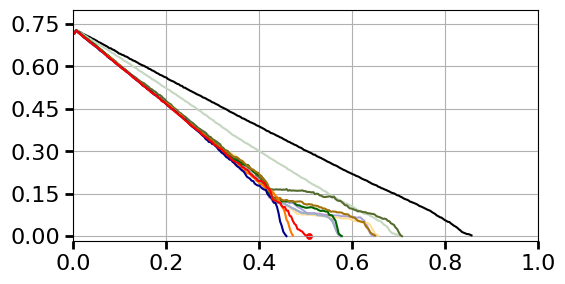

6 random [248] [0.0]
6 clsBetweenness [196] [1.3605442176870749e-05]
6 clsCloseness [175] [0.0]
6 clsKcore [236] [0.002310884353741497]
6 clsEigenvector [200] [0.0008561224489795923]
6 neiNodesNum [175] [0.0]
6 KMcore_g1 [219] [0.00258265306122449]
6 KMcore_gf [200] [0.002658843537414965]
6 nodeEdgeEigenvector_linear [219] [0.0]
6 nodeEdgeEigenvector_max [180] [0.0]
6 degree [178] [0.002518027210884354]
6 new_neiNodeSum_1 [200] [0.0]
[200] [0.0]


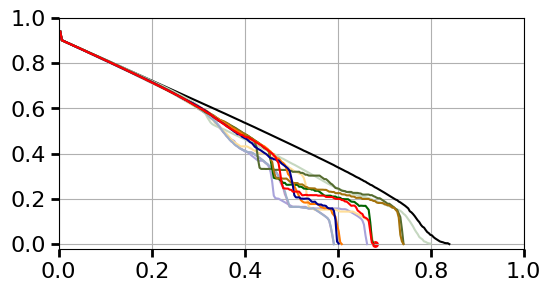

6 random [257] [0.0032125850340136066]
6 clsBetweenness [210] [0.0005867346938775511]
6 clsCloseness [210] [0.0]
6 clsKcore [247] [0.0026829931972789105]
6 clsEigenvector [231] [0.0]
6 neiNodesNum [210] [0.0]
6 KMcore_g1 [229] [0.0]
6 KMcore_gf [213] [0.0]
6 nodeEdgeEigenvector_linear [228] [0.0]
6 nodeEdgeEigenvector_max [192] [0.002462925170068027]
6 degree [198] [0.0]
6 new_neiNodeSum_1 [212] [0.0]
[212] [0.0]


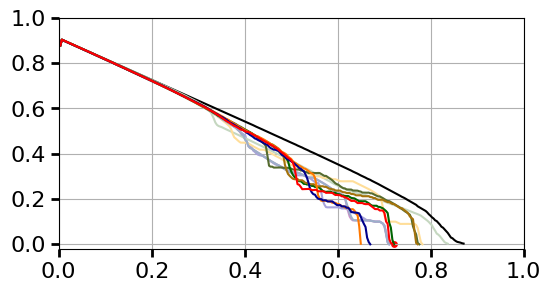

6 random [228] [0.0029108843537414956]
6 clsBetweenness [113] [0.002982653061224489]
6 clsCloseness [115] [0.0012901360544217686]
6 clsKcore [155] [0.0018183673469387757]
6 clsEigenvector [124] [0.0024925170068027212]
6 neiNodesNum [115] [0.002248979591836735]
6 KMcore_g1 [98] [0.0012901360544217686]
6 KMcore_gf [93] [0.0028289115646258508]
6 nodeEdgeEigenvector_linear [94] [0.0013513605442176868]
6 nodeEdgeEigenvector_max [90] [0.0010989795918367345]
6 degree [90] [0.0014248299319727892]
6 new_neiNodeSum_1 [90] [0.0031727891156462596]
[90] [0.0031727891156462596]


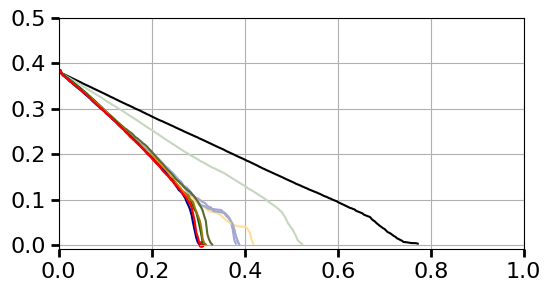

6 random [255] [0.00314251700680272]
6 clsBetweenness [189] [0.0030792517006802715]
6 clsCloseness [169] [0.002204421768707483]
6 clsKcore [207] [0.0033993197278911562]
6 clsEigenvector [193] [0.0013843537414965983]
6 neiNodesNum [169] [0.002716326530612244]
6 KMcore_g1 [208] [0.0]
6 KMcore_gf [169] [0.0]
6 nodeEdgeEigenvector_linear [190] [0.001803741496598639]
6 nodeEdgeEigenvector_max [140] [0.0003023809523809522]
6 degree [135] [0.001338095238095238]
6 new_neiNodeSum_1 [147] [0.00228843537414966]
[147] [0.00228843537414966]


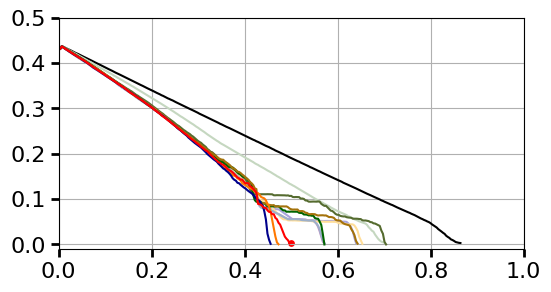

6 random [245] [0.0030166666666666675]
6 clsBetweenness [195] [0.0]
6 clsCloseness [174] [0.0]
6 clsKcore [232] [0.002772448979591837]
6 clsEigenvector [199] [0.0]
6 neiNodesNum [174] [0.0]
6 KMcore_g1 [218] [0.0]
6 KMcore_gf [198] [0.0]
6 nodeEdgeEigenvector_linear [216] [0.0007299319727891157]
6 nodeEdgeEigenvector_max [175] [0.003387414965986396]
6 degree [176] [0.0]
6 new_neiNodeSum_1 [193] [0.0025180272108843555]
[193] [0.0025180272108843555]


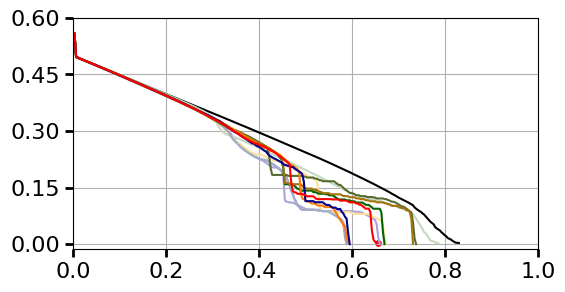

6 random [256] [0.003107142857142856]
6 clsBetweenness [209] [0.0]
6 clsCloseness [209] [0.0]
6 clsKcore [247] [0.0021282312925170075]
6 clsEigenvector [230] [0.0]
6 neiNodesNum [209] [0.0]
6 KMcore_g1 [225] [0.0031867346938775527]
6 KMcore_gf [210] [0.0007363945578231288]
6 nodeEdgeEigenvector_linear [226] [0.0]
6 nodeEdgeEigenvector_max [190] [0.0031187074829931976]
6 degree [193] [0.0]
6 new_neiNodeSum_1 [209] [0.00036598639455782316]
[209] [0.00036598639455782316]


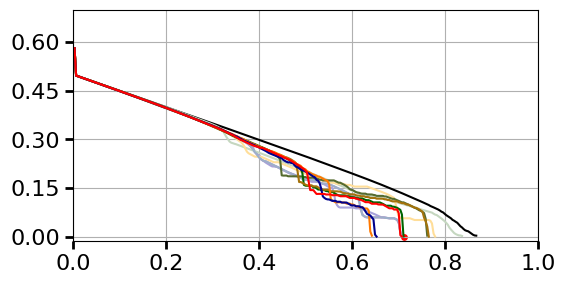

7 random [209] [0.002732978723404256]
7 clsBetweenness [85] [0.001279078014184398]
7 clsCloseness [83] [0.0025957446808510644]
7 clsKcore [106] [0.0015351063829787254]
7 clsEigenvector [85] [0.00259326241134752]
7 neiNodesNum [84] [0.0034585106382978726]
7 KMcore_g1 [99] [0.0032723404255319143]
7 KMcore_gf [94] [0.0008911347517730502]
7 nodeEdgeEigenvector_linear [93] [0.0]
7 nodeEdgeEigenvector_max [92] [0.0032627659574468093]
7 degree [88] [0.0014202127659574462]
7 new_neiNodeSum_1 [85] [0.0018695035460992904]
[85] [0.0018695035460992904]


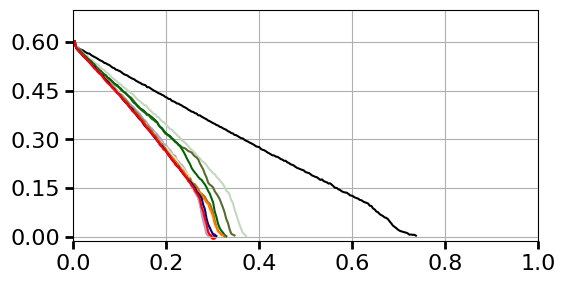

7 random [239] [0.0034329787234042564]
7 clsBetweenness [125] [0.0031507092198581567]
7 clsCloseness [127] [0.0022382978723404254]
7 clsKcore [136] [0.0014351063829787236]
7 clsEigenvector [124] [0.0024166666666666677]
7 neiNodesNum [121] [0.0025719858156028367]
7 KMcore_g1 [134] [0.0023929078014184395]
7 KMcore_gf [141] [0.0033726950354609924]
7 nodeEdgeEigenvector_linear [137] [0.0024893617021276575]
7 nodeEdgeEigenvector_max [134] [0.001557446808510638]
7 degree [133] [0.0034244680851063824]
7 new_neiNodeSum_1 [125] [0.0010450354609929065]
[125] [0.0010450354609929065]


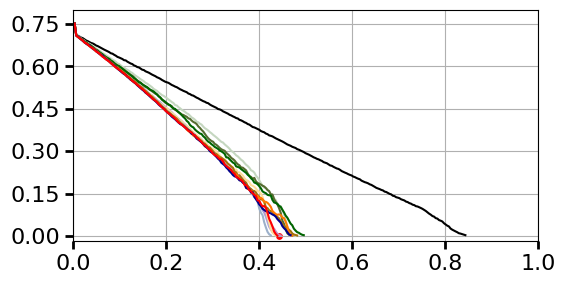

7 random [217] [0.002130851063829789]
7 clsBetweenness [129] [0.0]
7 clsCloseness [127] [0.0012382978723404258]
7 clsKcore [137] [0.0012578014184397156]
7 clsEigenvector [125] [0.0]
7 neiNodesNum [120] [0.0010421985815602846]
7 KMcore_g1 [124] [0.0]
7 KMcore_gf [124] [0.0]
7 nodeEdgeEigenvector_linear [142] [0.0031003546099290795]
7 nodeEdgeEigenvector_max [136] [0.0]
7 degree [136] [0.0014035460992907786]
7 new_neiNodeSum_1 [125] [0.002044680851063831]
[125] [0.002044680851063831]


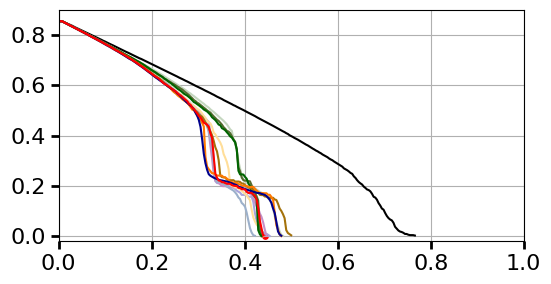

7 random [230] [0.0031716312056737617]
7 clsBetweenness [151] [0.0021120567375886553]
7 clsCloseness [149] [0.0009960992907801422]
7 clsKcore [183] [0.0]
7 clsEigenvector [150] [0.0]
7 neiNodesNum [139] [0.0017684397163120569]
7 KMcore_g1 [166] [0.002723758865248225]
7 KMcore_gf [180] [0.0028273049645390043]
7 nodeEdgeEigenvector_linear [162] [0.001955319148936172]
7 nodeEdgeEigenvector_max [152] [0.001936524822695037]
7 degree [152] [0.0]
7 new_neiNodeSum_1 [136] [0.0010028368794326248]
[136] [0.0010028368794326248]


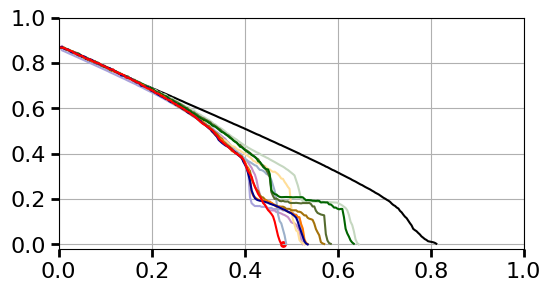

7 random [228] [0.0035329787234042553]
7 clsBetweenness [109] [0.00045531914893617034]
7 clsCloseness [114] [0.001892198581560284]
7 clsKcore [123] [0.0032184397163120566]
7 clsEigenvector [112] [0.001580141843971631]
7 neiNodesNum [107] [0.0016039007092198585]
7 KMcore_g1 [120] [0.0019847517730496454]
7 KMcore_gf [118] [0.002841134751773049]
7 nodeEdgeEigenvector_linear [118] [0.0010180851063829788]
7 nodeEdgeEigenvector_max [119] [0.0031578014184397173]
7 degree [113] [0.0014726950354609933]
7 new_neiNodeSum_1 [111] [0.001576595744680851]
[111] [0.001576595744680851]


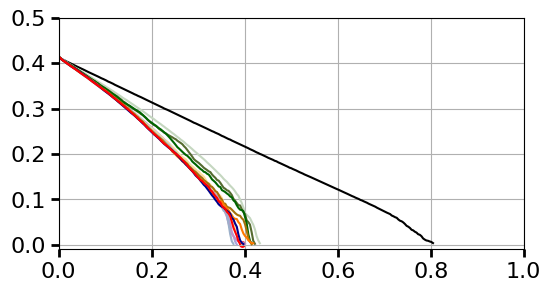

7 random [251] [0.0028843971631205673]
7 clsBetweenness [151] [0.000695390070921986]
7 clsCloseness [148] [0.0017280141843971622]
7 clsKcore [185] [0.0016836879432624117]
7 clsEigenvector [156] [0.0027851063829787237]
7 neiNodesNum [147] [0.0023177304964539015]
7 KMcore_g1 [174] [0.0035404255319148948]
7 KMcore_gf [192] [0.003472695035460992]
7 nodeEdgeEigenvector_linear [159] [0.0010911347517730493]
7 nodeEdgeEigenvector_max [149] [0.0023918439716312054]
7 degree [149] [0.0016007092198581554]
7 new_neiNodeSum_1 [142] [0.0011744680851063826]
[142] [0.0011744680851063826]


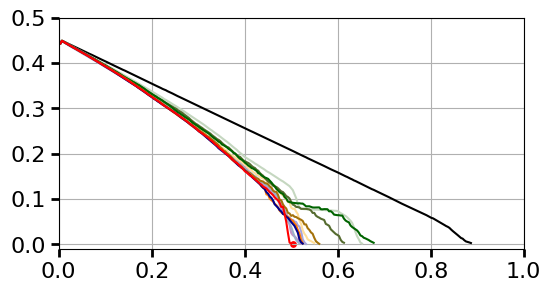

7 random [219] [0.0027741134751773032]
7 clsBetweenness [132] [0.0014882978723404243]
7 clsCloseness [128] [0.0]
7 clsKcore [137] [0.0029294326241134723]
7 clsEigenvector [125] [0.0014712765957446792]
7 neiNodesNum [120] [0.002977304964539004]
7 KMcore_g1 [124] [0.0009726950354609937]
7 KMcore_gf [124] [0.0]
7 nodeEdgeEigenvector_linear [142] [0.00071241134751773]
7 nodeEdgeEigenvector_max [136] [0.0]
7 degree [137] [0.0014843971631205658]
7 new_neiNodeSum_1 [125] [0.0]
[125] [0.0]


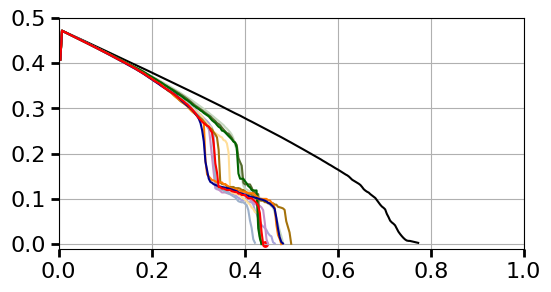

7 random [236] [0.0022319148936170226]
7 clsBetweenness [152] [0.0016936170212765967]
7 clsCloseness [150] [0.0]
7 clsKcore [185] [0.0]
7 clsEigenvector [153] [0.001668439716312055]
7 neiNodesNum [142] [0.0008205673758865244]
7 KMcore_g1 [170] [0.0033879432624113453]
7 KMcore_gf [187] [0.0016145390070921967]
7 nodeEdgeEigenvector_linear [166] [0.0]
7 nodeEdgeEigenvector_max [153] [0.0010776595744680856]
7 degree [152] [0.0]
7 new_neiNodeSum_1 [138] [0.0012031914893617024]
[138] [0.0012031914893617024]


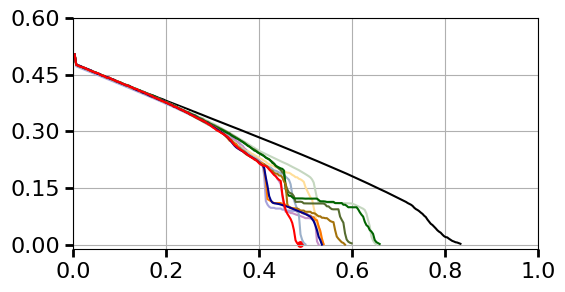

8 random [105] [0.004717482517482518]
8 clsBetweenness [57] [0.0009132867132867134]
8 clsCloseness [63] [0.00401048951048951]
8 clsKcore [84] [0.006126573426573427]
8 clsEigenvector [84] [0.0014853146853146847]
8 neiNodesNum [72] [0.006411188811188814]
8 KMcore_g1 [85] [0.005402097902097902]
8 KMcore_gf [59] [0.00556923076923077]
8 nodeEdgeEigenvector_linear [60] [0.0007636363636363636]
8 nodeEdgeEigenvector_max [55] [0.0022804195804195806]
8 degree [56] [0.0021727272727272724]
8 new_neiNodeSum_1 [45] [0.0023321678321678325]
[45] [0.0023321678321678325]


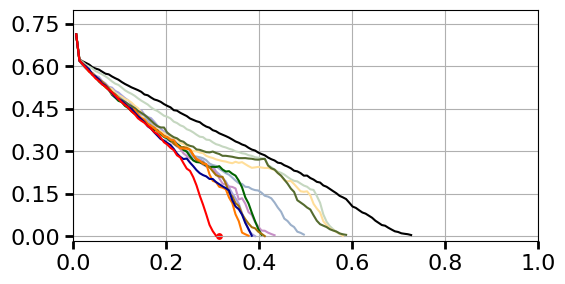

8 random [120] [0.005966433566433568]
8 clsBetweenness [77] [0.0014993006993006994]
8 clsCloseness [98] [0.005360139860139858]
8 clsKcore [109] [0.005862237762237761]
8 clsEigenvector [102] [0.006535664335664333]
8 neiNodesNum [94] [0.003014685314685313]
8 KMcore_g1 [113] [0.003757342657342656]
8 KMcore_gf [94] [0.002932867132867134]
8 nodeEdgeEigenvector_linear [89] [0.001488111888111887]
8 nodeEdgeEigenvector_max [83] [0.005065734265734265]
8 degree [81] [0.006415384615384615]
8 new_neiNodeSum_1 [75] [0.0009622377622377623]
[75] [0.0009622377622377623]


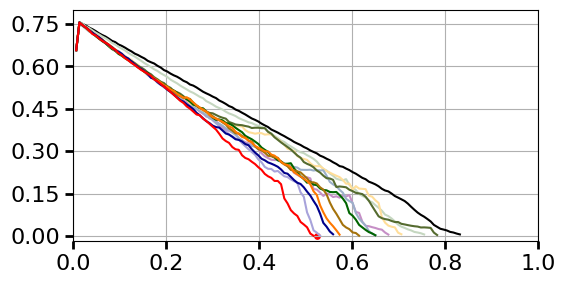

8 random [102] [0.006968531468531469]
8 clsBetweenness [57] [0.0]
8 clsCloseness [43] [0.006947552447552446]
8 clsKcore [71] [0.004716783216783218]
8 clsEigenvector [66] [0.0006972027972027977]
8 neiNodesNum [47] [0.0]
8 KMcore_g1 [67] [0.0]
8 KMcore_gf [90] [0.002155244755244755]
8 nodeEdgeEigenvector_linear [60] [0.004530069930069932]
8 nodeEdgeEigenvector_max [76] [0.0]
8 degree [90] [0.004775524475524476]
8 new_neiNodeSum_1 [63] [0.005367832167832169]
[63] [0.005367832167832169]


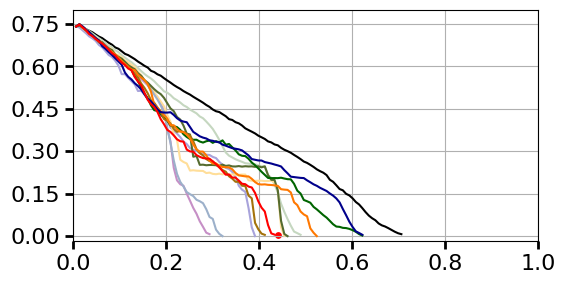

8 random [110] [0.006011888111888114]
8 clsBetweenness [71] [0.0017293706293706286]
8 clsCloseness [70] [0.0034559440559440574]
8 clsKcore [88] [0.0023538461538461543]
8 clsEigenvector [84] [0.0]
8 neiNodesNum [63] [0.005909790209790212]
8 KMcore_g1 [85] [0.006580419580419583]
8 KMcore_gf [99] [0.003553846153846152]
8 nodeEdgeEigenvector_linear [77] [0.0]
8 nodeEdgeEigenvector_max [81] [0.00014545454545454548]
8 degree [110] [0.0035174825174825175]
8 new_neiNodeSum_1 [77] [0.004293006993006993]
[77] [0.004293006993006993]


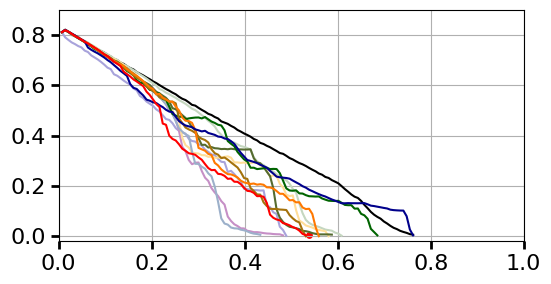

8 random [106] [0.006615384615384615]
8 clsBetweenness [58] [0.0]
8 clsCloseness [74] [0.005097902097902098]
8 clsKcore [90] [0.0019076923076923086]
8 clsEigenvector [86] [0.001929370629370629]
8 neiNodesNum [83] [0.003060839160839161]
8 KMcore_g1 [92] [0.0025300699300699297]
8 KMcore_gf [59] [0.006893006993006993]
8 nodeEdgeEigenvector_linear [65] [0.004120979020979023]
8 nodeEdgeEigenvector_max [57] [0.0007979020979020982]
8 degree [56] [0.005267132867132865]
8 new_neiNodeSum_1 [45] [0.0]
[45] [0.0]


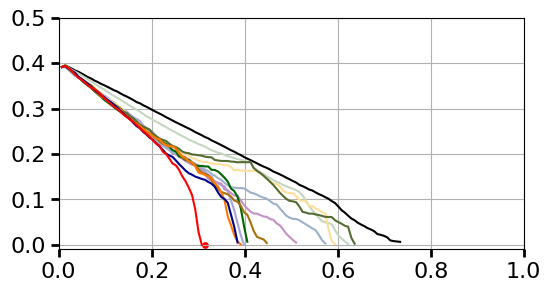

8 random [122] [0.005747552447552446]
8 clsBetweenness [78] [0.002466433566433567]
8 clsCloseness [102] [0.0066965034965034975]
8 clsKcore [114] [0.006704895104895102]
8 clsEigenvector [106] [0.005599300699300699]
8 neiNodesNum [100] [0.005904895104895103]
8 KMcore_g1 [116] [0.0012293706293706292]
8 KMcore_gf [98] [0.0010363636363636365]
8 nodeEdgeEigenvector_linear [94] [0.0009342657342657342]
8 nodeEdgeEigenvector_max [86] [0.004188811188811189]
8 degree [82] [0.004448951048951049]
8 new_neiNodeSum_1 [76] [0.001316083916083916]
[76] [0.001316083916083916]


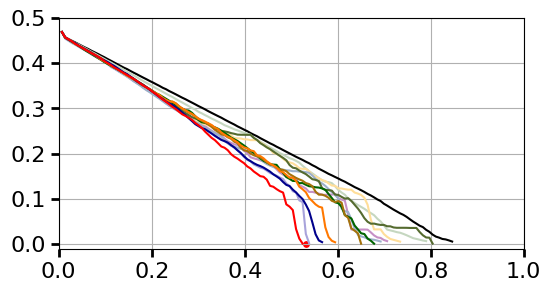

8 random [111] [0.006059440559440562]
8 clsBetweenness [70] [0.006020279720279721]
8 clsCloseness [77] [0.0]
8 clsKcore [89] [0.0036965034965034966]
8 clsEigenvector [84] [0.002553846153846154]
8 neiNodesNum [84] [0.0]
8 KMcore_g1 [92] [0.0]
8 KMcore_gf [97] [0.0065979020979020945]
8 nodeEdgeEigenvector_linear [76] [0.0038944055944055934]
8 nodeEdgeEigenvector_max [81] [0.0]
8 degree [109] [0.006637062937062932]
8 new_neiNodeSum_1 [76] [0.0004986013986013981]
[76] [0.0004986013986013981]


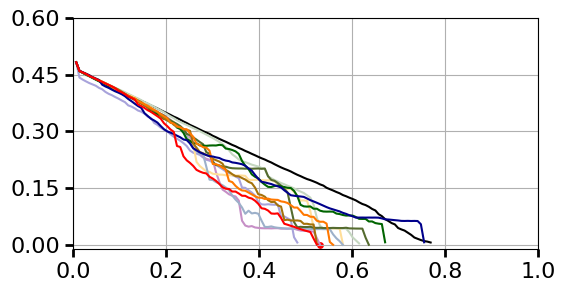

8 random [118] [0.005949650349650352]
8 clsBetweenness [75] [0.0021573426573426578]
8 clsCloseness [91] [0.004515384615384615]
8 clsKcore [102] [0.005095804195804195]
8 clsEigenvector [98] [0.004182517482517484]
8 neiNodesNum [91] [0.0031300699300699296]
8 KMcore_g1 [99] [0.006922377622377624]
8 KMcore_gf [109] [0.0]
8 nodeEdgeEigenvector_linear [99] [0.0]
8 nodeEdgeEigenvector_max [112] [0.0]
8 degree [113] [0.0]
8 new_neiNodeSum_1 [86] [0.0]
[86] [0.0]


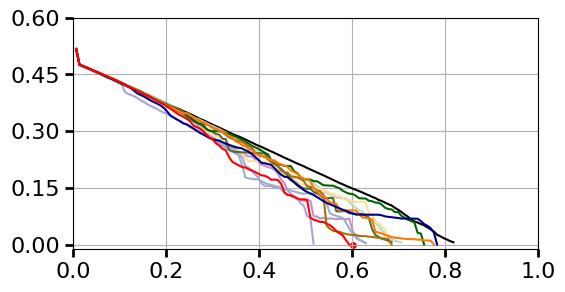

9 random [721] [0.000962921348314607]
9 clsBetweenness [281] [0.000958018386108274]
9 clsCloseness [293] [0.001009090909090909]
9 clsKcore [313] [0.0006671092951991827]
9 clsEigenvector [296] [0.0009091930541368742]
9 neiNodesNum [233] [0.0009068437180796734]
9 KMcore_g1 [272] [0.0008895812053115424]
9 KMcore_gf [265] [0.0008813074565883558]
9 nodeEdgeEigenvector_linear [330] [0.000133197139938713]
9 nodeEdgeEigenvector_max [347] [0.0009187946884576098]
9 degree [222] [0.0002698672114402451]
9 new_neiNodeSum_1 [159] [0.0006810010214504597]
[159] [0.0006810010214504597]


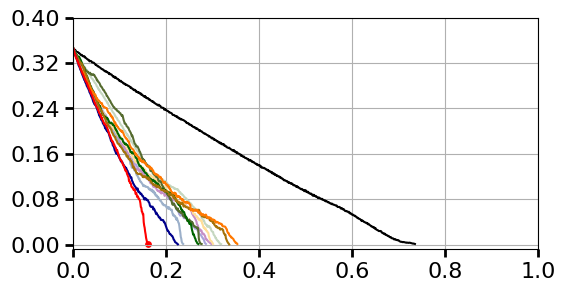

9 random [827] [0.000914300306435138]
9 clsBetweenness [441] [0.0008147088866189991]
9 clsCloseness [391] [0.0008273748723186928]
9 clsKcore [487] [0.00038110316649642503]
9 clsEigenvector [479] [0.00039999999999999996]
9 neiNodesNum [386] [0.000593156281920327]
9 KMcore_g1 [451] [0.0008448416751787538]
9 KMcore_gf [416] [0.0008317671092951992]
9 nodeEdgeEigenvector_linear [485] [0.0009227783452502555]
9 nodeEdgeEigenvector_max [475] [0.0009415730337078655]
9 degree [338] [0.0008608784473953016]
9 new_neiNodeSum_1 [280] [3.6772216547497446e-06]
[280] [3.6772216547497446e-06]


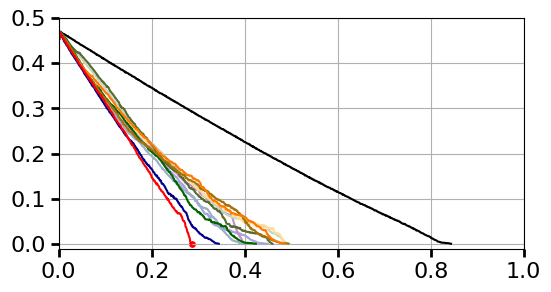

9 random [675] [0.0008584269662921347]
9 clsBetweenness [285] [0.0007722165474974467]
9 clsCloseness [368] [0.0006363636363636366]
9 clsKcore [443] [0.000933401430030644]
9 clsEigenvector [437] [0.0004425944841675179]
9 neiNodesNum [366] [0.0006308478038815118]
9 KMcore_g1 [352] [0.0006547497446373852]
9 KMcore_gf [425] [0.00014841675178753848]
9 nodeEdgeEigenvector_linear [382] [0.0008889683350357512]
9 nodeEdgeEigenvector_max [423] [0.0005362614913176713]
9 degree [360] [0.00015536261491317675]
9 new_neiNodeSum_1 [250] [0.0]
[250] [0.0]


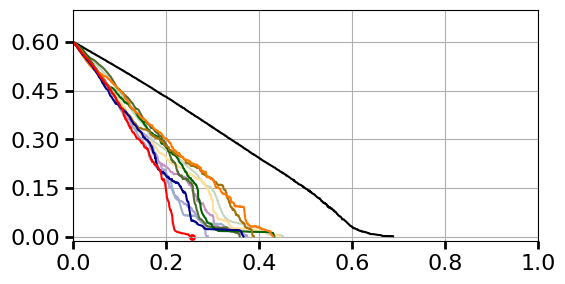

9 random [771] [0.0008880490296220636]
9 clsBetweenness [342] [0.0009089887640449442]
9 clsCloseness [409] [0.0003858018386108275]
9 clsKcore [565] [0.0009833503575076613]
9 clsEigenvector [493] [8.91726251276813e-05]
9 neiNodesNum [458] [0.0009770173646578143]
9 KMcore_g1 [471] [0.0]
9 KMcore_gf [454] [0.0]
9 nodeEdgeEigenvector_linear [546] [0.0]
9 nodeEdgeEigenvector_max [514] [0.0008109295199182843]
9 degree [386] [0.00014024514811031662]
9 new_neiNodeSum_1 [294] [0.0002374872318692542]
[294] [0.0002374872318692542]


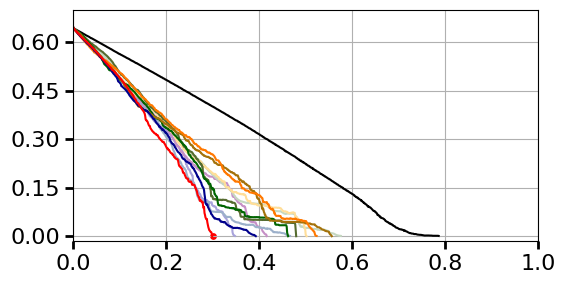

9 random [735] [0.0008594484167517876]
9 clsBetweenness [300] [0.0009938712972420837]
9 clsCloseness [300] [0.0003178753830439225]
9 clsKcore [320] [0.000896527068437181]
9 clsEigenvector [303] [0.0004075587334014302]
9 neiNodesNum [241] [0.0005829417773238]
9 KMcore_g1 [274] [0.0005866189989785496]
9 KMcore_gf [267] [0.0002769152196118488]
9 nodeEdgeEigenvector_linear [331] [0.0004700715015321757]
9 nodeEdgeEigenvector_max [354] [0.0008485188968335034]
9 degree [224] [0.00048457609805924417]
9 new_neiNodeSum_1 [166] [0.0006114402451481102]
[166] [0.0006114402451481102]


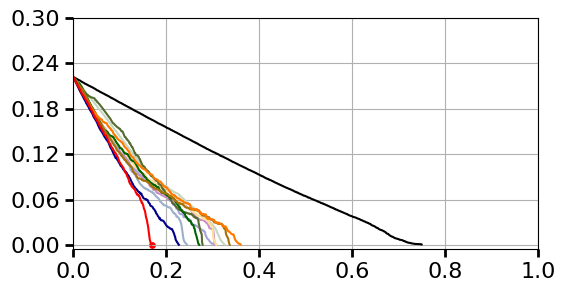

9 random [850] [0.0009071501532175692]
9 clsBetweenness [563] [0.0008323799795709901]
9 clsCloseness [403] [0.0004593462717058223]
9 clsKcore [535] [0.0010153217568947906]
9 clsEigenvector [483] [0.000730949948927477]
9 neiNodesNum [424] [0.000895097037793667]
9 KMcore_g1 [457] [0.0008174668028600614]
9 KMcore_gf [426] [0.0003165474974463739]
9 nodeEdgeEigenvector_linear [503] [0.0008541368743615936]
9 nodeEdgeEigenvector_max [496] [0.0005671092951991828]
9 degree [355] [0.0009481103166496425]
9 new_neiNodeSum_1 [281] [0.00029284984678243115]
[281] [0.00029284984678243115]


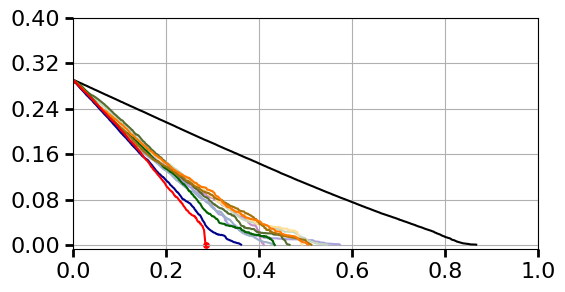

9 random [712] [0.000897752808988764]
9 clsBetweenness [309] [0.0006747701736465782]
9 clsCloseness [387] [0.0007230847803881512]
9 clsKcore [446] [0.0006193054136874364]
9 clsEigenvector [454] [0.0]
9 neiNodesNum [385] [0.0006301327885597551]
9 KMcore_g1 [440] [0.0]
9 KMcore_gf [426] [0.0]
9 nodeEdgeEigenvector_linear [440] [0.0010081716036772213]
9 nodeEdgeEigenvector_max [472] [0.0005034729315628193]
9 degree [361] [8.559754851889684e-05]
9 new_neiNodeSum_1 [251] [7.783452502553628e-05]
[251] [7.783452502553628e-05]


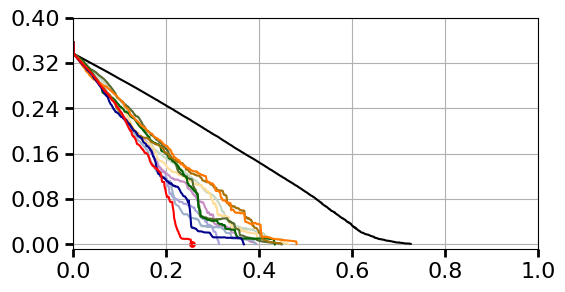

9 random [786] [0.0009620020429009195]
9 clsBetweenness [402] [0.001010623084780388]
9 clsCloseness [437] [0.0009564862104187948]
9 clsKcore [594] [0.0004141981613891726]
9 clsEigenvector [495] [0.000530949948927477]
9 neiNodesNum [506] [0.0009760980592441266]
9 KMcore_g1 [471] [0.0]
9 KMcore_gf [454] [0.0]
9 nodeEdgeEigenvector_linear [546] [0.0]
9 nodeEdgeEigenvector_max [529] [0.0]
9 degree [393] [0.0009474974463738509]
9 new_neiNodeSum_1 [297] [0.0006964249233912153]
[297] [0.0006964249233912153]


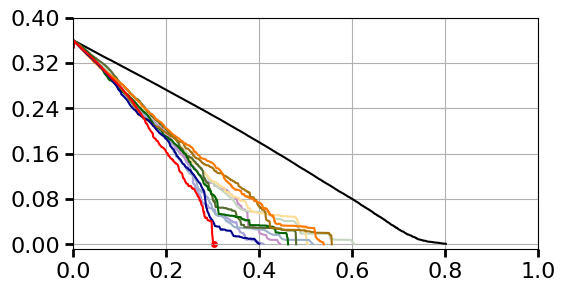

10 random [250] [0.002902064896755162]
10 clsBetweenness [178] [0.001834218289085546]
10 clsCloseness [212] [0.001622713864306785]
10 clsKcore [266] [0.0027460176991150435]
10 clsEigenvector [255] [0.002087905604719764]
10 neiNodesNum [210] [0.0027908554572271395]
10 KMcore_g1 [214] [0.000664601769911504]
10 KMcore_gf [202] [0.0009076696165191742]
10 nodeEdgeEigenvector_linear [271] [0.002879941002949852]
10 nodeEdgeEigenvector_max [268] [0.0006412979351032447]
10 degree [152] [0.002038643067846607]
10 new_neiNodeSum_1 [153] [0.001846017699115044]
[153] [0.001846017699115044]


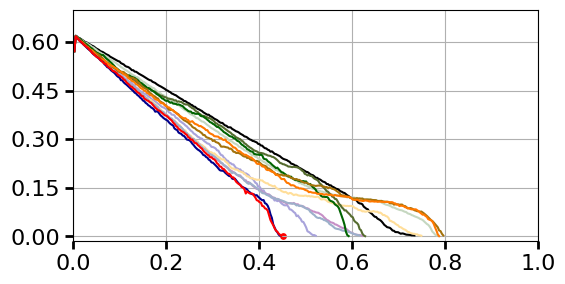

10 random [286] [0.0025292035398230095]
10 clsBetweenness [242] [0.0029185840707964604]
10 clsCloseness [266] [0.001164011799410029]
10 clsKcore [281] [0.0012058997050147493]
10 clsEigenvector [284] [0.0027141592920353974]
10 neiNodesNum [261] [0.0015218289085545719]
10 KMcore_g1 [257] [0.0022840707964601765]
10 KMcore_gf [247] [0.001155162241887906]
10 nodeEdgeEigenvector_linear [289] [0.0024908554572271387]
10 nodeEdgeEigenvector_max [283] [0.002279646017699115]
10 degree [195] [0.0019628318584070793]
10 new_neiNodeSum_1 [197] [0.0020852507374631265]
[197] [0.0020852507374631265]


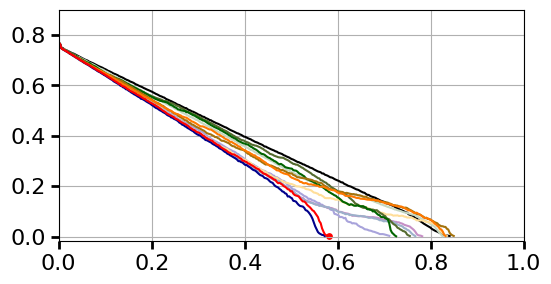

10 random [253] [0.002418289085545723]
10 clsBetweenness [231] [0.002829203539823008]
10 clsCloseness [267] [0.002297345132743362]
10 clsKcore [283] [0.002472271386430679]
10 clsEigenvector [283] [0.0026324483775811204]
10 neiNodesNum [256] [0.0028787610619469017]
10 KMcore_g1 [260] [0.0023061946902654864]
10 KMcore_gf [251] [0.002367551622418879]
10 nodeEdgeEigenvector_linear [292] [0.002867551622418878]
10 nodeEdgeEigenvector_max [281] [0.002339528023598819]
10 degree [175] [0.0023864306784660756]
10 new_neiNodeSum_1 [181] [0.0028309734513274325]
[181] [0.0028309734513274325]


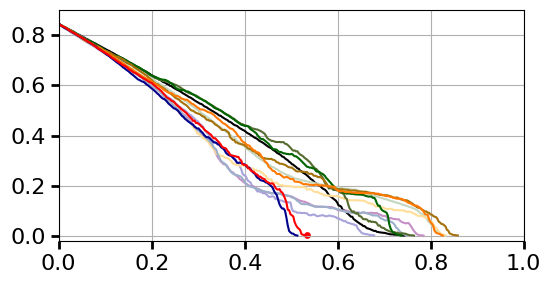

10 random [273] [0.002752507374631269]
10 clsBetweenness [286] [0.0]
10 clsCloseness [309] [0.0]
10 clsKcore [311] [0.0]
10 clsEigenvector [314] [0.0]
10 neiNodesNum [310] [8.053097345132752e-05]
10 KMcore_g1 [298] [0.0]
10 KMcore_gf [305] [0.0]
10 nodeEdgeEigenvector_linear [315] [0.0002870206489675516]
10 nodeEdgeEigenvector_max [305] [0.0014404129793510329]
10 degree [302] [0.0]
10 new_neiNodeSum_1 [291] [0.0005976401179941001]
[291] [0.0005976401179941001]


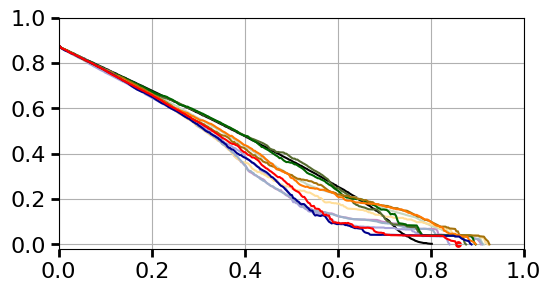

10 random [251] [0.002490560471976401]
10 clsBetweenness [179] [0.0029463126843657815]
10 clsCloseness [213] [0.0023486725663716813]
10 clsKcore [266] [0.002142182890855457]
10 clsEigenvector [262] [0.0006374631268436579]
10 neiNodesNum [213] [0.0016486725663716812]
10 KMcore_g1 [214] [0.0]
10 KMcore_gf [202] [0.001780825958702065]
10 nodeEdgeEigenvector_linear [272] [0.0010035398230088496]
10 nodeEdgeEigenvector_max [268] [0.0]
10 degree [154] [0.0019274336283185839]
10 new_neiNodeSum_1 [154] [0.0021675516224188797]
[154] [0.0021675516224188797]


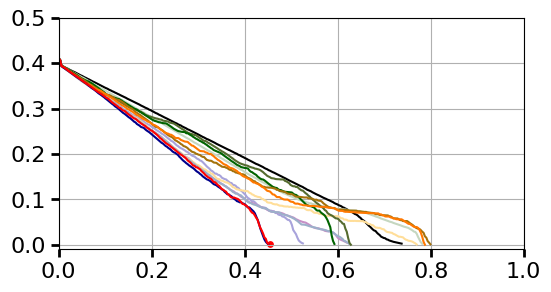

10 random [290] [0.0020356932153392333]
10 clsBetweenness [251] [0.0022126843657817113]
10 clsCloseness [273] [0.0016849557522123893]
10 clsKcore [283] [0.0013215339233038348]
10 clsEigenvector [288] [0.0]
10 neiNodesNum [271] [0.0020474926253687318]
10 KMcore_g1 [261] [0.002231563421828909]
10 KMcore_gf [248] [0.0002492625368731563]
10 nodeEdgeEigenvector_linear [291] [0.00042979351032448377]
10 nodeEdgeEigenvector_max [283] [0.0027297935103244835]
10 degree [198] [0.0019843657817109144]
10 new_neiNodeSum_1 [200] [0.0022106194690265485]
[200] [0.0022106194690265485]


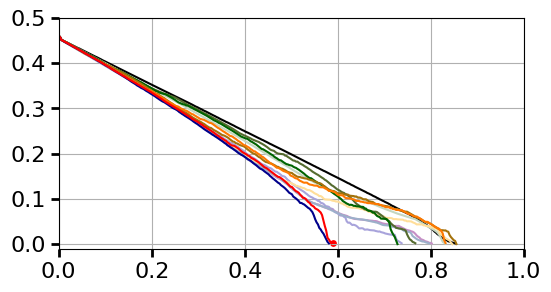

10 random [233] [0.0021654867256637165]
10 clsBetweenness [207] [0.0010790560471976398]
10 clsCloseness [238] [0.0022970501474926246]
10 clsKcore [273] [0.001362241887905604]
10 clsEigenvector [269] [0.0022150442477876092]
10 neiNodesNum [230] [0.0014569321533923298]
10 KMcore_g1 [203] [0.0022067846607669622]
10 KMcore_gf [225] [0.0016421828908554572]
10 nodeEdgeEigenvector_linear [278] [0.0005424778761061947]
10 nodeEdgeEigenvector_max [267] [0.002584365781710914]
10 degree [151] [0.0024150442477876097]
10 new_neiNodeSum_1 [165] [0.0]
[165] [0.0]


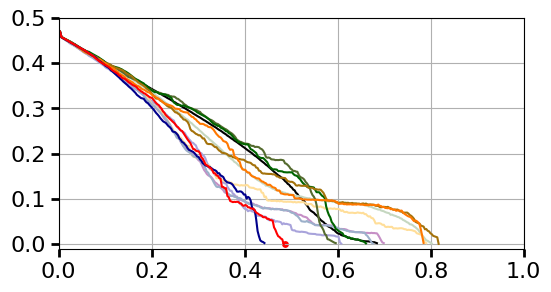

10 random [270] [0.0026359882005899697]
10 clsBetweenness [283] [0.0]
10 clsCloseness [303] [0.000721533923303835]
10 clsKcore [309] [0.0001820058997050148]
10 clsEigenvector [310] [0.0009351032448377584]
10 neiNodesNum [303] [0.0005401179941002951]
10 KMcore_g1 [296] [0.00035958702064896764]
10 KMcore_gf [303] [0.0005351032448377582]
10 nodeEdgeEigenvector_linear [312] [0.0]
10 nodeEdgeEigenvector_max [300] [0.0]
10 degree [295] [0.0]
10 new_neiNodeSum_1 [283] [0.0]
[283] [0.0]


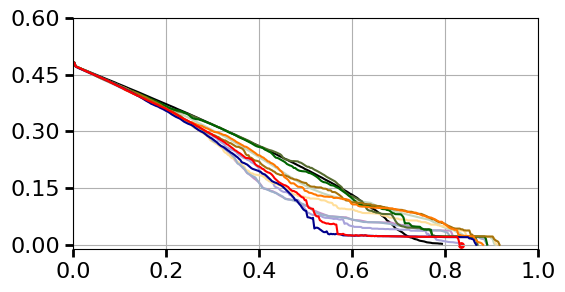

11 random [461] [0.0003086294416243654]
11 clsBetweenness [319] [0.000982571912013536]
11 clsCloseness [315] [0.0]
11 clsKcore [414] [0.0014693739424703886]
11 clsEigenvector [326] [0.0010776649746192892]
11 neiNodesNum [314] [0.001653807106598985]
11 KMcore_g1 [377] [0.001401522842639594]
11 KMcore_gf [365] [0.0]
11 nodeEdgeEigenvector_linear [361] [0.0014152284263959389]
11 nodeEdgeEigenvector_max [355] [0.00113502538071066]
11 degree [267] [0.0005055837563451778]
11 new_neiNodeSum_1 [284] [0.0005407783417935701]
[284] [0.0005407783417935701]


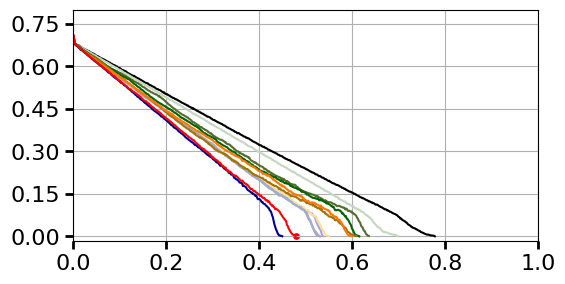

11 random [516] [0.001226903553299492]
11 clsBetweenness [409] [0.001072927241962775]
11 clsCloseness [416] [0.001036886632825719]
11 clsKcore [469] [0.00166497461928934]
11 clsEigenvector [419] [0.0013263959390862946]
11 neiNodesNum [414] [0.0009818950930626058]
11 KMcore_g1 [448] [0.001050253807106599]
11 KMcore_gf [441] [0.0008720812182741117]
11 nodeEdgeEigenvector_linear [462] [0.0009852791878172586]
11 nodeEdgeEigenvector_max [460] [0.0009380710659898475]
11 degree [377] [0.000698477157360406]
11 new_neiNodeSum_1 [393] [0.0015206429780033842]
[393] [0.0015206429780033842]


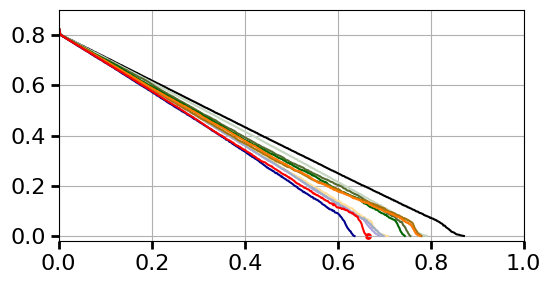

11 random [433] [0.0015597292724196274]
11 clsBetweenness [310] [0.0013702199661590525]
11 clsCloseness [299] [0.0009453468697123518]
11 clsKcore [384] [0.0013707275803722498]
11 clsEigenvector [299] [0.001524534686971235]
11 neiNodesNum [300] [0.0016194585448392551]
11 KMcore_g1 [317] [0.0]
11 KMcore_gf [330] [0.0]
11 nodeEdgeEigenvector_linear [287] [0.0015817258883248724]
11 nodeEdgeEigenvector_max [303] [0.0014879864636209816]
11 degree [205] [0.0010729272419627747]
11 new_neiNodeSum_1 [212] [0.0]
[212] [0.0]


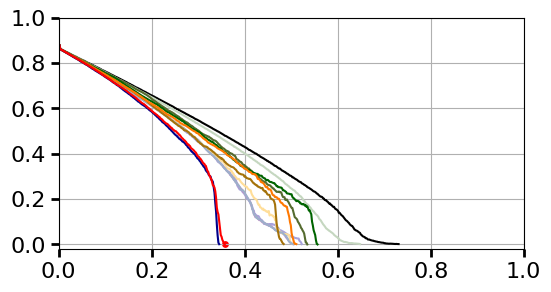

11 random [477] [0.0014737732656514382]
11 clsBetweenness [356] [0.0013571912013536378]
11 clsCloseness [357] [0.0008164128595600675]
11 clsKcore [434] [0.0010522842639593905]
11 clsEigenvector [375] [0.0004131979695431472]
11 neiNodesNum [355] [0.0008340101522842641]
11 KMcore_g1 [400] [0.0008439932318104909]
11 KMcore_gf [401] [0.0015697123519458533]
11 nodeEdgeEigenvector_linear [419] [0.0014629441624365482]
11 nodeEdgeEigenvector_max [425] [0.001670389170896785]
11 degree [292] [0.0014419627749576991]
11 new_neiNodeSum_1 [311] [0.0014230118443316411]
[311] [0.0014230118443316411]


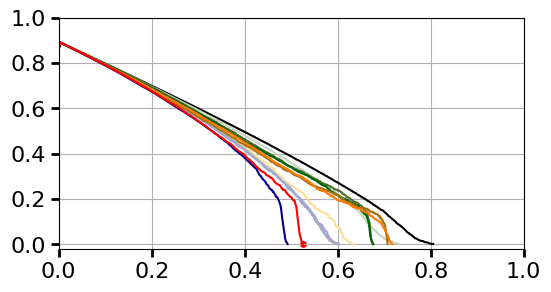

11 random [462] [0.001494077834179357]
11 clsBetweenness [320] [0.0004084602368866328]
11 clsCloseness [315] [0.0008037225042301183]
11 clsKcore [416] [0.0016918781725888323]
11 clsEigenvector [326] [0.0013744500846023689]
11 neiNodesNum [316] [0.0007840947546531303]
11 KMcore_g1 [375] [0.00121336717428088]
11 KMcore_gf [362] [0.0]
11 nodeEdgeEigenvector_linear [360] [0.0007240270727580369]
11 nodeEdgeEigenvector_max [356] [0.0008270727580372246]
11 degree [264] [0.0009054145516074448]
11 new_neiNodeSum_1 [282] [0.0009879864636209814]
[282] [0.0009879864636209814]


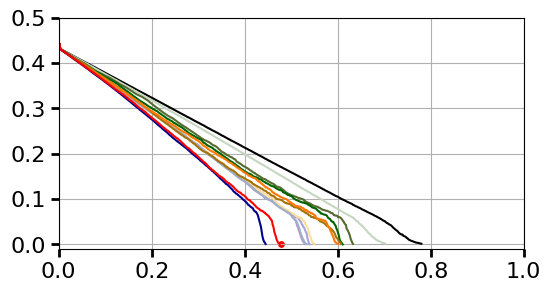

11 random [517] [0.0014445008460236886]
11 clsBetweenness [414] [0.001591878172588832]
11 clsCloseness [420] [0.0002844331641285956]
11 clsKcore [470] [0.0014067681895093065]
11 clsEigenvector [424] [0.0011482233502538072]
11 neiNodesNum [419] [0.0010076142131979695]
11 KMcore_g1 [449] [0.0016133671742808795]
11 KMcore_gf [440] [0.0011854483925549915]
11 nodeEdgeEigenvector_linear [462] [0.0006028764805414548]
11 nodeEdgeEigenvector_max [460] [0.0002727580372250422]
11 degree [377] [0.001520135363790186]
11 new_neiNodeSum_1 [393] [0.001049746192893401]
[393] [0.001049746192893401]


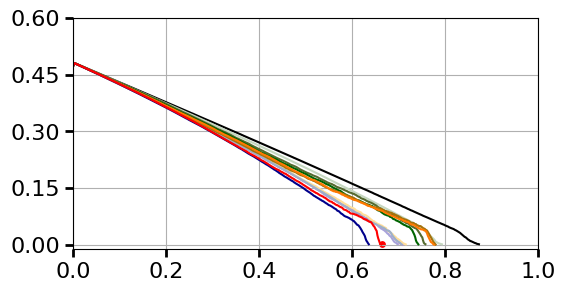

11 random [435] [0.0015697123519458546]
11 clsBetweenness [316] [0.0015541455160744497]
11 clsCloseness [301] [0.0]
11 clsKcore [393] [0.001383248730964467]
11 clsEigenvector [311] [0.0]
11 neiNodesNum [301] [0.0]
11 KMcore_g1 [350] [0.0]
11 KMcore_gf [334] [0.0]
11 nodeEdgeEigenvector_linear [308] [0.0009360406091370558]
11 nodeEdgeEigenvector_max [324] [0.0007390862944162437]
11 degree [217] [0.0]
11 new_neiNodeSum_1 [224] [0.0]
[224] [0.0]


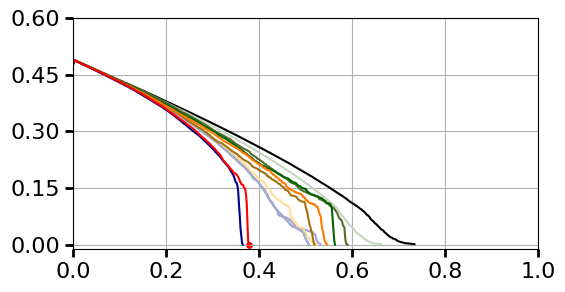

11 random [503] [0.0015969543147208122]
11 clsBetweenness [372] [0.0013972927241962774]
11 clsCloseness [377] [0.0]
11 clsKcore [449] [0.001474280879864636]
11 clsEigenvector [380] [0.0008045685279187817]
11 neiNodesNum [377] [0.0]
11 KMcore_g1 [415] [0.0]
11 KMcore_gf [408] [0.0]
11 nodeEdgeEigenvector_linear [431] [0.0015678510998307948]
11 nodeEdgeEigenvector_max [439] [0.0004280879864636209]
11 degree [311] [0.0008011844331641286]
11 new_neiNodeSum_1 [333] [0.0015697123519458542]
[333] [0.0015697123519458542]


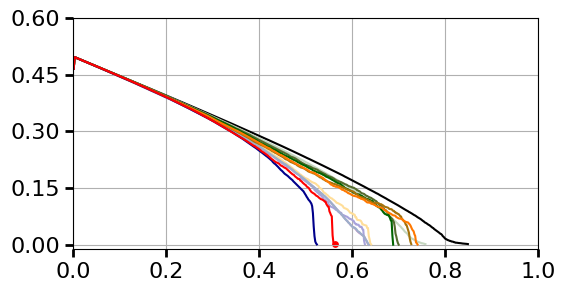

12 random [150] [0.002871889400921658]
12 clsBetweenness [70] [0.0039023041474654362]
12 clsCloseness [57] [0.0]
12 clsKcore [113] [0.003512903225806451]
12 clsEigenvector [58] [0.004142396313364054]
12 neiNodesNum [52] [0.0010709677419354841]
12 KMcore_g1 [70] [0.003999539170506913]
12 KMcore_gf [65] [0.0035244239631336393]
12 nodeEdgeEigenvector_linear [87] [0.0012926267281105975]
12 nodeEdgeEigenvector_max [81] [0.003914285714285715]
12 degree [54] [0.0024728110599078327]
12 new_neiNodeSum_1 [50] [0.00446635944700461]
[50] [0.00446635944700461]


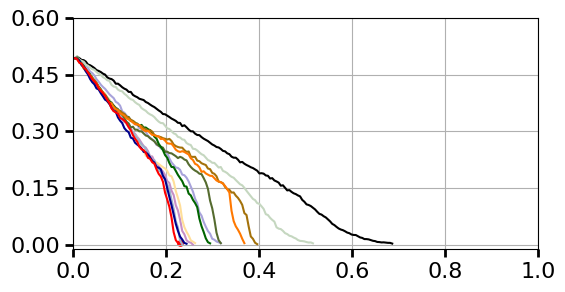

12 random [174] [0.0045949308755760376]
12 clsBetweenness [105] [0.0004248847926267278]
12 clsCloseness [102] [0.0025405529953917063]
12 clsKcore [134] [0.004087557603686636]
12 clsEigenvector [114] [0.0009972350230414745]
12 neiNodesNum [102] [0.004124423963133641]
12 KMcore_g1 [111] [0.0016635944700460834]
12 KMcore_gf [111] [0.0038271889400921656]
12 nodeEdgeEigenvector_linear [126] [0.0036811059907834094]
12 nodeEdgeEigenvector_max [124] [0.003066359447004607]
12 degree [96] [0.00205115207373272]
12 new_neiNodeSum_1 [91] [0.004233640552995392]
[91] [0.004233640552995392]


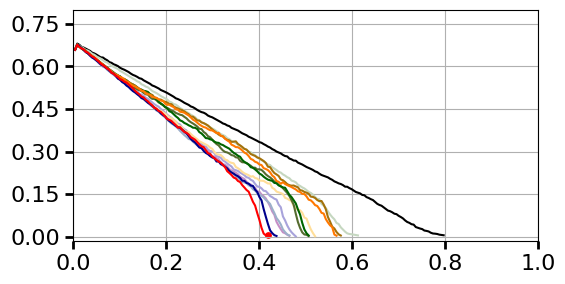

12 random [140] [0.0042009216589861745]
12 clsBetweenness [56] [0.0028714285714285716]
12 clsCloseness [34] [0.003405069124423964]
12 clsKcore [108] [0.0043824884792626724]
12 clsEigenvector [38] [0.0027165898617511506]
12 neiNodesNum [35] [0.0]
12 KMcore_g1 [26] [0.0027894009216589844]
12 KMcore_gf [42] [0.0]
12 nodeEdgeEigenvector_linear [59] [0.0041686635944700465]
12 nodeEdgeEigenvector_max [59] [0.002697235023041475]
12 degree [45] [0.0002820276497695851]
12 new_neiNodeSum_1 [30] [0.0]
[30] [0.0]


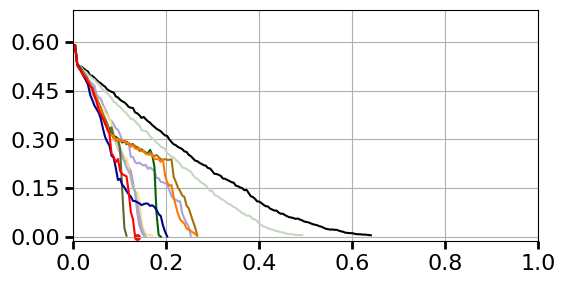

12 random [162] [0.004502764976958524]
12 clsBetweenness [82] [0.001658986175115207]
12 clsCloseness [63] [0.0029557603686635953]
12 clsKcore [122] [0.003106451612903226]
12 clsEigenvector [81] [0.0032248847926267268]
12 neiNodesNum [57] [0.002861751152073732]
12 KMcore_g1 [71] [0.002970046082949308]
12 KMcore_gf [89] [0.0]
12 nodeEdgeEigenvector_linear [94] [0.0]
12 nodeEdgeEigenvector_max [90] [0.0031649769585253462]
12 degree [63] [0.0007359447004608294]
12 new_neiNodeSum_1 [57] [0.0034188940092165897]
[57] [0.0034188940092165897]


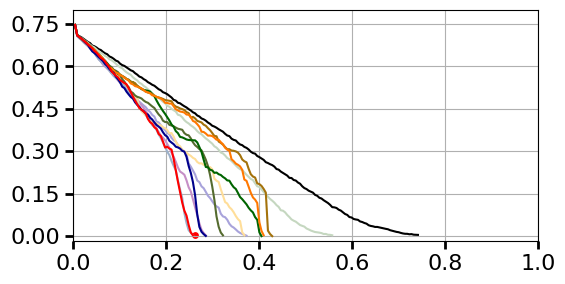

12 random [158] [0.004607373271889401]
12 clsBetweenness [86] [0.0029027649769585257]
12 clsCloseness [66] [0.0007640552995391704]
12 clsKcore [118] [0.0032921658986175117]
12 clsEigenvector [72] [0.003588479262672811]
12 neiNodesNum [62] [0.0007714285714285713]
12 KMcore_g1 [80] [0.00326589861751152]
12 KMcore_gf [85] [0.004432258064516129]
12 nodeEdgeEigenvector_linear [94] [0.004083870967741935]
12 nodeEdgeEigenvector_max [89] [0.003925345622119816]
12 degree [61] [0.0027184331797235023]
12 new_neiNodeSum_1 [61] [0.0018589861751152072]
[61] [0.0018589861751152072]


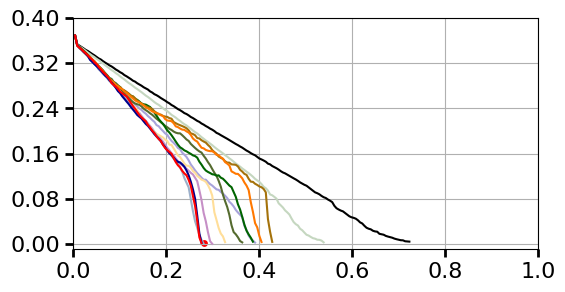

12 random [183] [0.004353456221198156]
12 clsBetweenness [110] [0.0037483870967741934]
12 clsCloseness [114] [0.003762672811059907]
12 clsKcore [142] [0.0043299539170506916]
12 clsEigenvector [125] [0.0022944700460829485]
12 neiNodesNum [110] [0.001656221198156682]
12 KMcore_g1 [119] [0.0005617511520737328]
12 KMcore_gf [118] [0.0032456221198156688]
12 nodeEdgeEigenvector_linear [133] [0.001983410138248848]
12 nodeEdgeEigenvector_max [130] [0.0005161290322580645]
12 degree [104] [0.0026852534562211983]
12 new_neiNodeSum_1 [101] [0.0037894009216589853]
[101] [0.0037894009216589853]


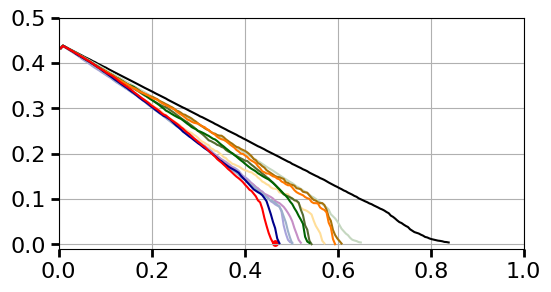

12 random [122] [0.004254377880184332]
12 clsBetweenness [52] [0.0]
12 clsCloseness [29] [0.002208294930875576]
12 clsKcore [98] [0.004268202764976958]
12 clsEigenvector [23] [0.0013737327188940085]
12 neiNodesNum [30] [0.0005078341013824885]
12 KMcore_g1 [20] [0.0037202764976958518]
12 KMcore_gf [20] [0.0028769585253456227]
12 nodeEdgeEigenvector_linear [19] [0.0018235023041474649]
12 nodeEdgeEigenvector_max [20] [0.0018571428571428571]
12 degree [18] [0.003728571428571428]
12 new_neiNodeSum_1 [19] [0.0014539170506912445]
[19] [0.0014539170506912445]


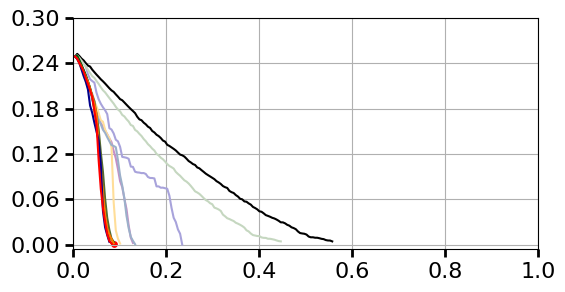

12 random [150] [0.0037437788018433176]
12 clsBetweenness [63] [0.00423963133640553]
12 clsCloseness [49] [0.0019059907834101384]
12 clsKcore [120] [0.004576958525345621]
12 clsEigenvector [60] [0.002790783410138248]
12 neiNodesNum [47] [0.0]
12 KMcore_g1 [67] [0.004319815668202766]
12 KMcore_gf [61] [0.0]
12 nodeEdgeEigenvector_linear [85] [0.0]
12 nodeEdgeEigenvector_max [81] [0.0017631336405529955]
12 degree [56] [0.0007470046082949307]
12 new_neiNodeSum_1 [44] [0.0]
[44] [0.0]


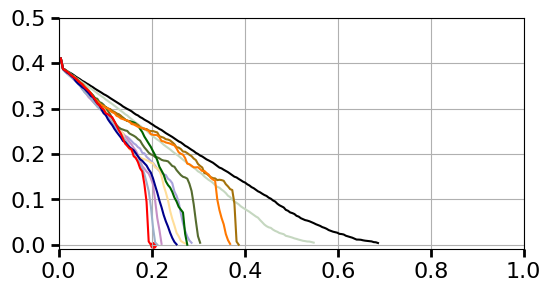

13 random [52] [0.012868421052631578]
13 clsBetweenness [15] [0.005406578947368421]
13 clsCloseness [15] [0.0]
13 clsKcore [28] [0.00583421052631579]
13 clsEigenvector [15] [0.0]
13 neiNodesNum [15] [0.0]
13 KMcore_g1 [16] [0.0017473684210526316]
13 KMcore_gf [16] [0.00820921052631579]
13 nodeEdgeEigenvector_linear [14] [0.0]
13 nodeEdgeEigenvector_max [14] [0.006638157894736841]
13 degree [14] [0.0017210526315789459]
13 new_neiNodeSum_1 [14] [0.0]
[14] [0.0]


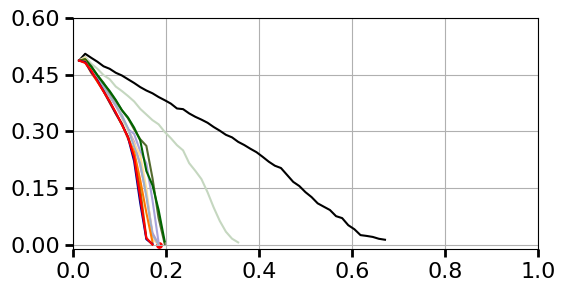

13 random [60] [0.012126315789473683]
13 clsBetweenness [21] [0.009246052631578948]
13 clsCloseness [21] [0.004648684210526314]
13 clsKcore [32] [0.007269736842105265]
13 clsEigenvector [22] [0.0]
13 neiNodesNum [21] [0.005628947368421052]
13 KMcore_g1 [22] [0.0017039473684210523]
13 KMcore_gf [22] [0.0016131578947368422]
13 nodeEdgeEigenvector_linear [22] [0.0]
13 nodeEdgeEigenvector_max [21] [0.009106578947368422]
13 degree [21] [0.0031842105263157894]
13 new_neiNodeSum_1 [21] [0.0016907894736842106]
[21] [0.0016907894736842106]


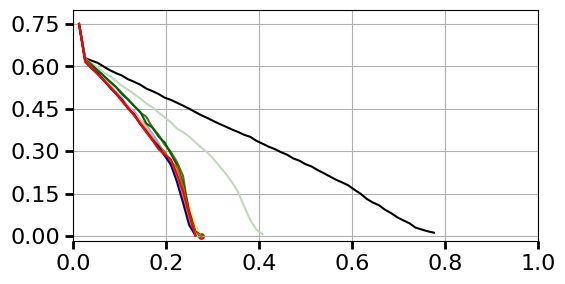

13 random [50] [0.01082894736842105]
13 clsBetweenness [14] [0.0]
13 clsCloseness [13] [0.0046236842105263146]
13 clsKcore [25] [0.008240789473684208]
13 clsEigenvector [13] [0.0017039473684210523]
13 neiNodesNum [13] [0.007060526315789473]
13 KMcore_g1 [15] [0.0]
13 KMcore_gf [14] [0.003449999999999999]
13 nodeEdgeEigenvector_linear [12] [0.0020697368421052635]
13 nodeEdgeEigenvector_max [12] [0.0026947368421052632]
13 degree [11] [0.004886842105263159]
13 new_neiNodeSum_1 [12] [0.0]
[12] [0.0]


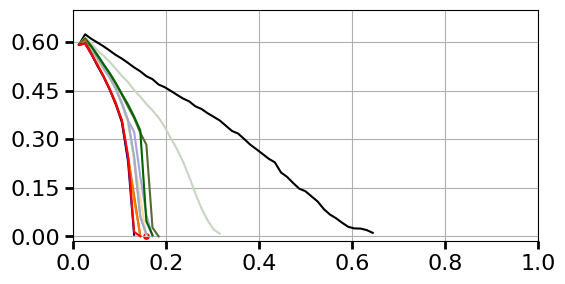

13 random [58] [0.01013157894736842]
13 clsBetweenness [17] [0.0]
13 clsCloseness [17] [0.004651315789473685]
13 clsKcore [31] [0.008002631578947367]
13 clsEigenvector [17] [0.0]
13 neiNodesNum [17] [0.0070302631578947365]
13 KMcore_g1 [19] [0.0]
13 KMcore_gf [19] [0.0]
13 nodeEdgeEigenvector_linear [18] [0.006472368421052631]
13 nodeEdgeEigenvector_max [18] [0.0]
13 degree [17] [0.0]
13 new_neiNodeSum_1 [18] [0.0]
[18] [0.0]


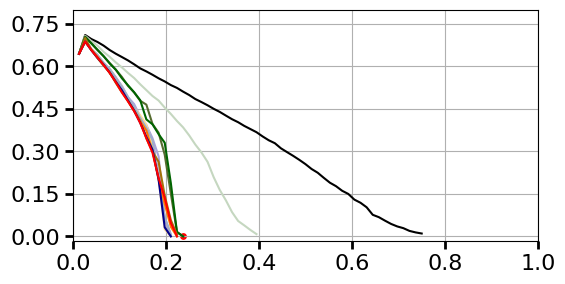

13 random [55] [0.009597368421052627]
13 clsBetweenness [16] [0.0]
13 clsCloseness [16] [0.0]
13 clsKcore [29] [0.013139473684210526]
13 clsEigenvector [15] [0.007799999999999999]
13 neiNodesNum [15] [0.005840789473684211]
13 KMcore_g1 [17] [0.010239473684210527]
13 KMcore_gf [17] [0.004831578947368421]
13 nodeEdgeEigenvector_linear [16] [0.0]
13 nodeEdgeEigenvector_max [15] [0.00926578947368421]
13 degree [15] [0.010684210526315789]
13 new_neiNodeSum_1 [15] [0.01066842105263158]
[15] [0.01066842105263158]


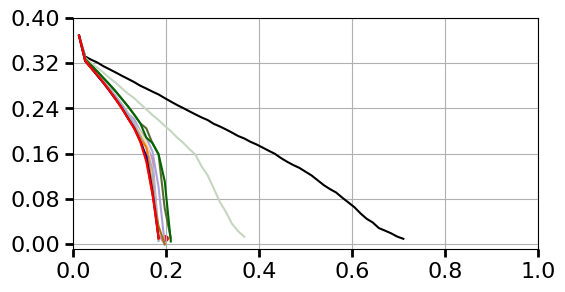

13 random [63] [0.011411842105263153]
13 clsBetweenness [25] [0.006793421052631579]
13 clsCloseness [24] [0.0]
13 clsKcore [34] [0.0048328947368421055]
13 clsEigenvector [23] [0.007332894736842104]
13 neiNodesNum [24] [0.0]
13 KMcore_g1 [24] [0.0]
13 KMcore_gf [24] [0.0010789473684210524]
13 nodeEdgeEigenvector_linear [23] [0.012225]
13 nodeEdgeEigenvector_max [23] [0.004702631578947369]
13 degree [23] [0.003655263157894737]
13 new_neiNodeSum_1 [23] [0.003371052631578947]
[23] [0.003371052631578947]


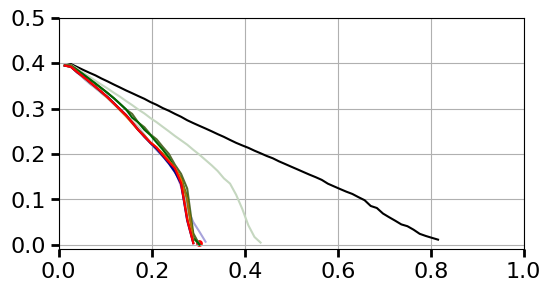

13 random [52] [0.013099999999999995]
13 clsBetweenness [14] [0.002769736842105263]
13 clsCloseness [14] [0.0]
13 clsKcore [28] [0.005368421052631579]
13 clsEigenvector [14] [0.0]
13 neiNodesNum [14] [0.0]
13 KMcore_g1 [15] [0.0]
13 KMcore_gf [16] [0.0]
13 nodeEdgeEigenvector_linear [13] [0.0]
13 nodeEdgeEigenvector_max [13] [0.004449999999999997]
13 degree [12] [0.0]
13 new_neiNodeSum_1 [12] [0.0]
[12] [0.0]


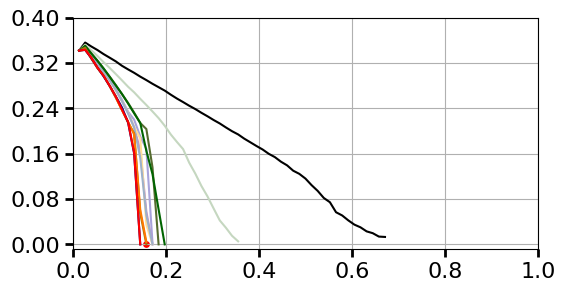

13 random [60] [0.009719736842105258]
13 clsBetweenness [18] [0.005465789473684209]
13 clsCloseness [18] [0.009419736842105264]
13 clsKcore [32] [0.009274999999999999]
13 clsEigenvector [19] [0.011309210526315788]
13 neiNodesNum [19] [0.001169736842105263]
13 KMcore_g1 [19] [0.004881578947368421]
13 KMcore_gf [19] [0.00970921052631579]
13 nodeEdgeEigenvector_linear [19] [0.006505263157894736]
13 nodeEdgeEigenvector_max [19] [0.0026552631578947374]
13 degree [19] [0.0]
13 new_neiNodeSum_1 [19] [0.0]
[19] [0.0]


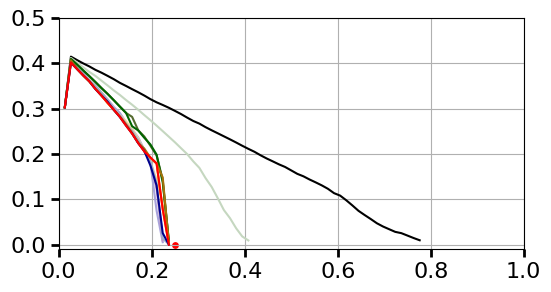

14 random [192] [0.0032962809917355374]
14 clsBetweenness [132] [0.002746694214876034]
14 clsCloseness [143] [0.0028549586776859515]
14 clsKcore [156] [0.002924793388429752]
14 clsEigenvector [144] [0.003887190082644628]
14 neiNodesNum [144] [0.0006714876033057857]
14 KMcore_g1 [177] [0.0012090909090909088]
14 KMcore_gf [159] [0.0027933884297520663]
14 nodeEdgeEigenvector_linear [149] [0.0028177685950413235]
14 nodeEdgeEigenvector_max [159] [0.003060330578512398]
14 degree [135] [0.0015719008264462808]
14 new_neiNodeSum_1 [133] [0.0021471074380165294]
[133] [0.0021471074380165294]


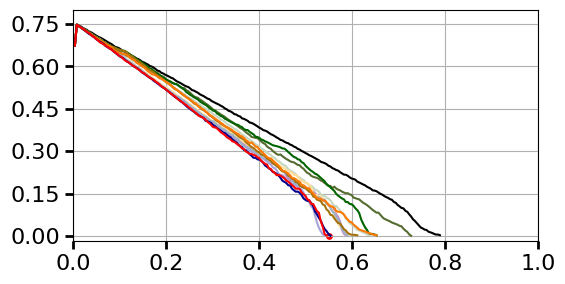

14 random [213] [0.003585537190082645]
14 clsBetweenness [165] [0.003502892561983473]
14 clsCloseness [175] [0.0031041322314049606]
14 clsKcore [182] [0.0032880165289256207]
14 clsEigenvector [182] [0.0015590909090909095]
14 neiNodesNum [172] [0.0029772727272727277]
14 KMcore_g1 [190] [0.002601652892561984]
14 KMcore_gf [209] [0.00317107438016529]
14 nodeEdgeEigenvector_linear [197] [0.0030351239669421486]
14 nodeEdgeEigenvector_max [188] [0.003740495867768596]
14 degree [172] [0.0032462809917355373]
14 new_neiNodeSum_1 [174] [0.002088842975206612]
[174] [0.002088842975206612]


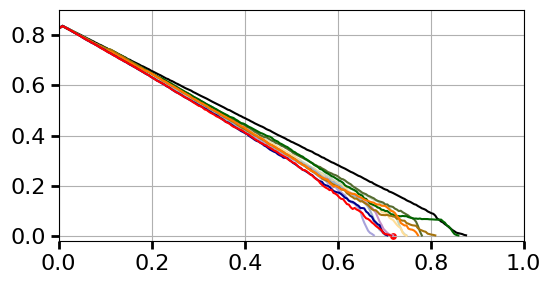

14 random [161] [0.0024090909090909093]
14 clsBetweenness [107] [0.0016165289256198357]
14 clsCloseness [113] [0.0]
14 clsKcore [127] [0.001688842975206612]
14 clsEigenvector [116] [0.0009491735537190083]
14 neiNodesNum [112] [0.0039595041322314055]
14 KMcore_g1 [124] [0.0030632231404958683]
14 KMcore_gf [154] [0.0018347107438016535]
14 nodeEdgeEigenvector_linear [130] [0.0036599173553719024]
14 nodeEdgeEigenvector_max [131] [0.0038723140495867774]
14 degree [119] [0.0033090909090909082]
14 new_neiNodeSum_1 [110] [0.0038987603305785136]
[110] [0.0038987603305785136]


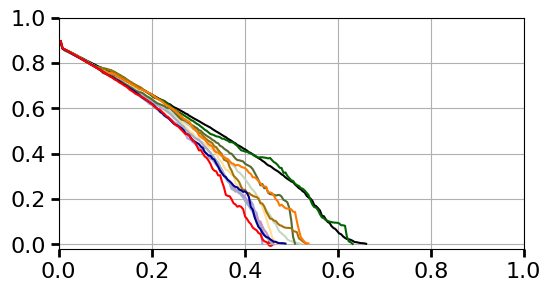

14 random [193] [0.004091735537190085]
14 clsBetweenness [142] [0.0024033057851239673]
14 clsCloseness [154] [0.0016991735537190077]
14 clsKcore [167] [0.0022123966942148767]
14 clsEigenvector [157] [0.002844628099173554]
14 neiNodesNum [157] [0.0012504132231404962]
14 KMcore_g1 [177] [0.0028867768595041325]
14 KMcore_gf [206] [0.0013152892561983476]
14 nodeEdgeEigenvector_linear [190] [0.0009909090909090907]
14 nodeEdgeEigenvector_max [179] [0.002716942148760331]
14 degree [150] [0.0030268595041322314]
14 new_neiNodeSum_1 [144] [0.0]
[144] [0.0]


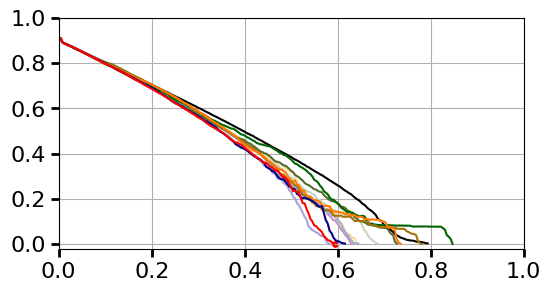

14 random [194] [0.003630991735537191]
14 clsBetweenness [136] [0.000637190082644628]
14 clsCloseness [146] [0.003247933884297521]
14 clsKcore [161] [0.0034388429752066118]
14 clsEigenvector [150] [0.0025119834710743806]
14 neiNodesNum [148] [0.003162396694214876]
14 KMcore_g1 [177] [0.0008487603305785124]
14 KMcore_gf [161] [0.002739256198347108]
14 nodeEdgeEigenvector_linear [151] [0.0035727272727272747]
14 nodeEdgeEigenvector_max [160] [2.6859504132231405e-05]
14 degree [136] [0.0015570247933884302]
14 new_neiNodeSum_1 [133] [0.0005309917355371902]
[133] [0.0005309917355371902]


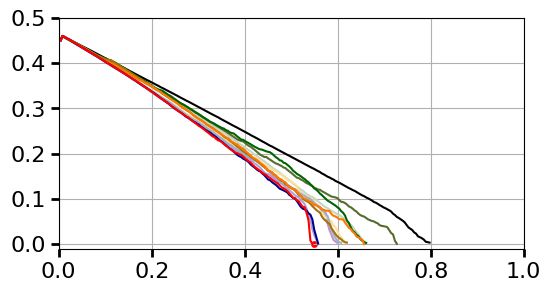

14 random [215] [0.0034028925619834717]
14 clsBetweenness [173] [0.000992561983471075]
14 clsCloseness [179] [0.002812809917355372]
14 clsKcore [186] [0.0025681818181818184]
14 clsEigenvector [183] [0.004014876033057852]
14 neiNodesNum [179] [0.00330206611570248]
14 KMcore_g1 [191] [0.00039173553719008277]
14 KMcore_gf [209] [0.0036458677685950406]
14 nodeEdgeEigenvector_linear [199] [0.002630165289256198]
14 nodeEdgeEigenvector_max [189] [0.0035210743801652876]
14 degree [175] [0.0040491735537190095]
14 new_neiNodeSum_1 [182] [0.00286404958677686]
[182] [0.00286404958677686]


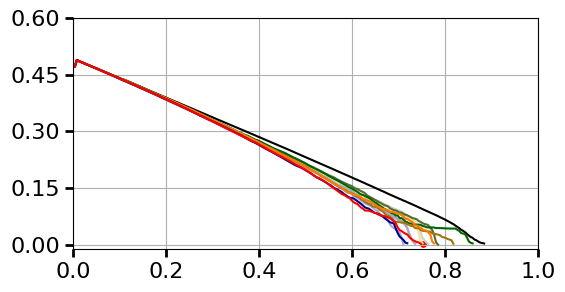

14 random [165] [0.00401611570247934]
14 clsBetweenness [108] [0.0]
14 clsCloseness [117] [0.004068595041322316]
14 clsKcore [127] [0.0032549586776859513]
14 clsEigenvector [119] [0.0006033057851239672]
14 neiNodesNum [116] [0.003225206611570249]
14 KMcore_g1 [130] [0.0025830578512396696]
14 KMcore_gf [152] [0.0013826446280991742]
14 nodeEdgeEigenvector_linear [128] [0.0014458677685950413]
14 nodeEdgeEigenvector_max [128] [0.0037177685950413224]
14 degree [120] [0.003973553719008265]
14 new_neiNodeSum_1 [109] [0.002506198347107439]
[109] [0.002506198347107439]


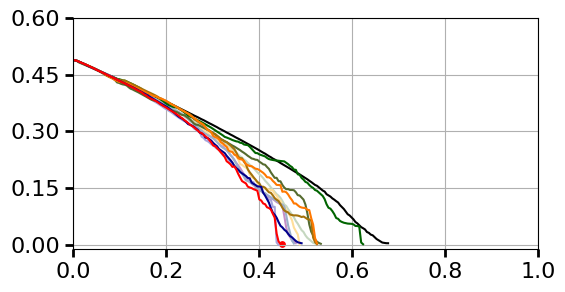

14 random [194] [0.0034123966942148764]
14 clsBetweenness [147] [0.0012938016528925623]
14 clsCloseness [158] [0.0006247933884297522]
14 clsKcore [172] [0.0]
14 clsEigenvector [159] [0.0019157024793388436]
14 neiNodesNum [159] [0.0022438016528925626]
14 KMcore_g1 [182] [0.0013363636363636368]
14 KMcore_gf [206] [0.0]
14 nodeEdgeEigenvector_linear [190] [0.0036512396694214876]
14 nodeEdgeEigenvector_max [179] [0.0029214876033057864]
14 degree [164] [0.003003305785123968]
14 new_neiNodeSum_1 [144] [0.0005235537190082646]
[144] [0.0005235537190082646]


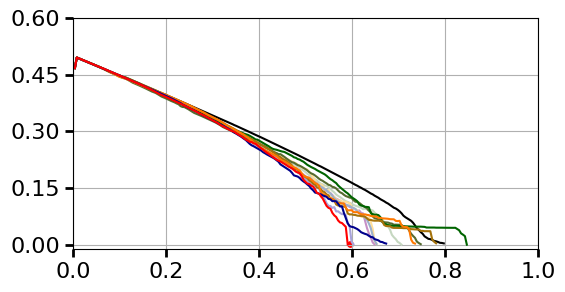

15 random [298] [0.002473200992555832]
15 clsBetweenness [102] [0.0015029776674937967]
15 clsCloseness [95] [0.0023523573200992555]
15 clsKcore [162] [0.0015940446650124069]
15 clsEigenvector [105] [0.0017151364764267996]
15 neiNodesNum [96] [0.0004069478908188586]
15 KMcore_g1 [146] [0.002003225806451613]
15 KMcore_gf [114] [0.0006406947890818858]
15 nodeEdgeEigenvector_linear [135] [0.0007377171215880892]
15 nodeEdgeEigenvector_max [120] [0.0018843672456575684]
15 degree [95] [0.0009518610421836226]
15 new_neiNodeSum_1 [93] [0.0010707196029776673]
[93] [0.0010707196029776673]


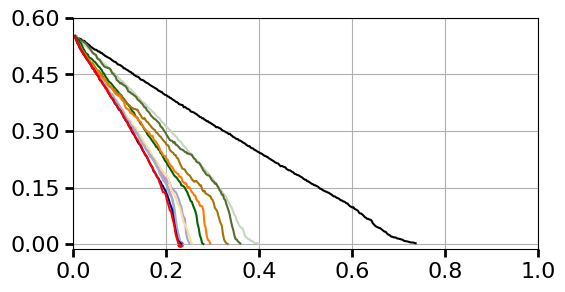

15 random [344] [0.001913399503722084]
15 clsBetweenness [157] [0.001870471464019851]
15 clsCloseness [157] [0.001825558312655087]
15 clsKcore [188] [0.0009535980148883375]
15 clsEigenvector [161] [0.0007811414392059554]
15 neiNodesNum [156] [0.0017640198511166252]
15 KMcore_g1 [201] [0.0007736972704714641]
15 KMcore_gf [166] [0.0]
15 nodeEdgeEigenvector_linear [195] [0.0006687344913151364]
15 nodeEdgeEigenvector_max [198] [0.0015076923076923078]
15 degree [154] [0.001429776674937966]
15 new_neiNodeSum_1 [155] [0.0007079404466501242]
[155] [0.0007079404466501242]


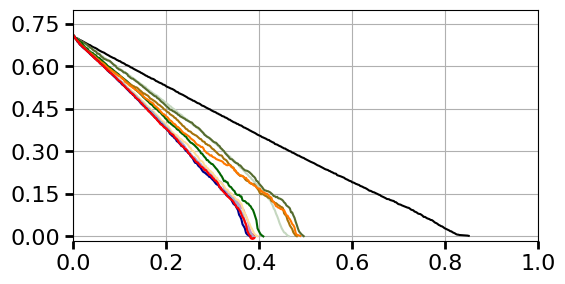

15 random [288] [0.0017719602977667487]
15 clsBetweenness [107] [0.002029528535980149]
15 clsCloseness [97] [0.0021937965260545905]
15 clsKcore [168] [0.0020471464019851116]
15 clsEigenvector [108] [0.001206451612903226]
15 neiNodesNum [96] [0.0017866004962779158]
15 KMcore_g1 [133] [0.0]
15 KMcore_gf [105] [0.0006002481389578163]
15 nodeEdgeEigenvector_linear [142] [0.002400992555831266]
15 nodeEdgeEigenvector_max [141] [0.0023218362282878408]
15 degree [109] [0.0015801488833746902]
15 new_neiNodeSum_1 [86] [0.00151166253101737]
[86] [0.00151166253101737]


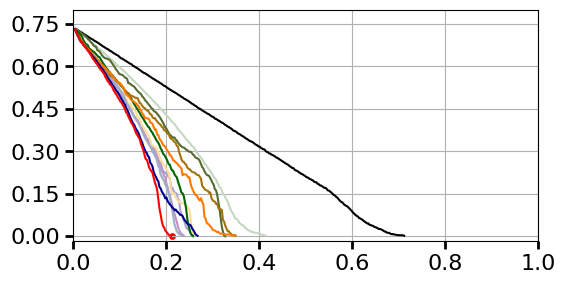

15 random [332] [0.002459801488833747]
15 clsBetweenness [169] [0.0022426799007444174]
15 clsCloseness [173] [0.0016359801488833752]
15 clsKcore [194] [0.001973449131513648]
15 clsEigenvector [160] [0.002299007444168735]
15 neiNodesNum [157] [0.0017526054590570725]
15 KMcore_g1 [180] [0.0018057071960297763]
15 KMcore_gf [168] [0.0008942928039702236]
15 nodeEdgeEigenvector_linear [194] [0.0005121588089330023]
15 nodeEdgeEigenvector_max [210] [0.0011153846153846155]
15 degree [169] [0.0018813895781637719]
15 new_neiNodeSum_1 [149] [0.0022942928039702236]
[149] [0.0022942928039702236]


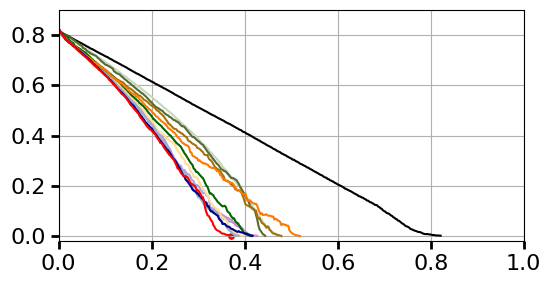

15 random [309] [0.002222084367245658]
15 clsBetweenness [115] [0.0]
15 clsCloseness [105] [0.002403722084367245]
15 clsKcore [166] [0.002478908188585608]
15 clsEigenvector [113] [0.0016622828784119104]
15 neiNodesNum [106] [0.0012148883374689828]
15 KMcore_g1 [160] [0.0005526054590570719]
15 KMcore_gf [122] [0.0006754342431761786]
15 nodeEdgeEigenvector_linear [145] [0.0]
15 nodeEdgeEigenvector_max [144] [0.0]
15 degree [105] [0.0]
15 new_neiNodeSum_1 [104] [0.0]
[104] [0.0]


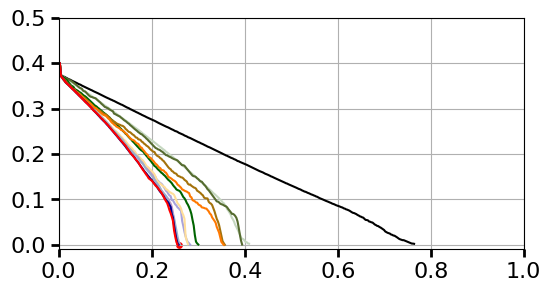

15 random [355] [0.001963771712158809]
15 clsBetweenness [172] [0.001773449131513648]
15 clsCloseness [174] [0.0008836228287841196]
15 clsKcore [194] [0.0]
15 clsEigenvector [179] [0.0010684863523573202]
15 neiNodesNum [174] [0.0017325062034739458]
15 KMcore_g1 [210] [0.0]
15 KMcore_gf [185] [0.0017739454094292805]
15 nodeEdgeEigenvector_linear [217] [0.0014238213399503724]
15 nodeEdgeEigenvector_max [210] [0.0024439205955334993]
15 degree [173] [0.0020325062034739455]
15 new_neiNodeSum_1 [173] [0.0015483870967741933]
[173] [0.0015483870967741933]


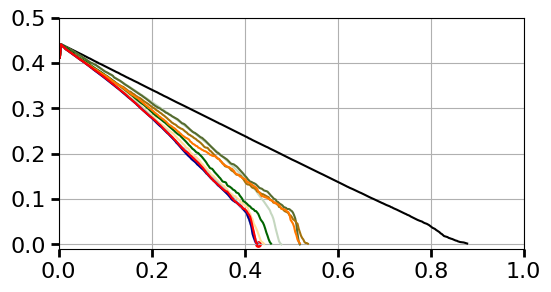

15 random [290] [0.002232009925558313]
15 clsBetweenness [109] [0.0016255583126550872]
15 clsCloseness [97] [0.002384863523573201]
15 clsKcore [168] [0.002110421836228288]
15 clsEigenvector [107] [0.002101736972704715]
15 neiNodesNum [97] [0.0019858560794044668]
15 KMcore_g1 [134] [0.002256575682382134]
15 KMcore_gf [107] [0.0]
15 nodeEdgeEigenvector_linear [148] [0.0020945409429280397]
15 nodeEdgeEigenvector_max [190] [0.002437220843672457]
15 degree [108] [0.0020513647642679904]
15 new_neiNodeSum_1 [92] [0.0013985111662531018]
[92] [0.0013985111662531018]


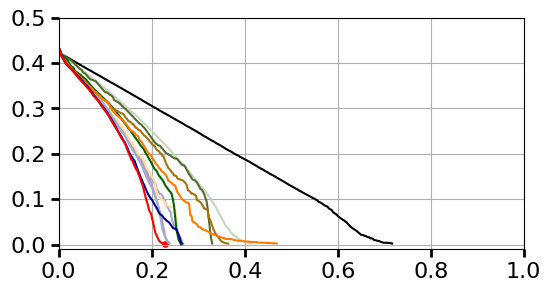

15 random [335] [0.002201985111662531]
15 clsBetweenness [187] [0.001016625310173697]
15 clsCloseness [236] [0.0021960297766749383]
15 clsKcore [259] [0.0021888337468982614]
15 clsEigenvector [250] [0.0024692307692307687]
15 neiNodesNum [222] [0.0022094292803970226]
15 KMcore_g1 [189] [0.0014176178660049625]
15 KMcore_gf [225] [0.0]
15 nodeEdgeEigenvector_linear [195] [0.0004156327543424317]
15 nodeEdgeEigenvector_max [212] [0.0]
15 degree [228] [0.0022627791563275437]
15 new_neiNodeSum_1 [153] [0.0004089330024813896]
[153] [0.0004089330024813896]


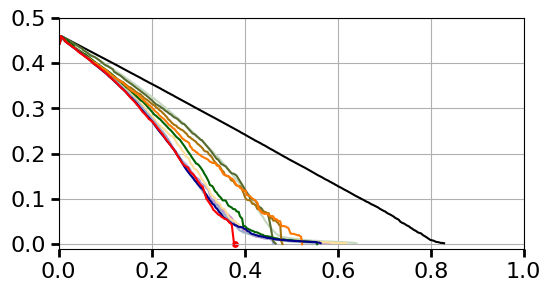

16 random [247] [0.002595412844036697]
16 clsBetweenness [153] [0.0018486238532110094]
16 clsCloseness [165] [0.0023715596330275237]
16 clsKcore [217] [0.002015902140672783]
16 clsEigenvector [173] [0.0017272171253822635]
16 neiNodesNum [131] [0.0029214067278287466]
16 KMcore_g1 [214] [0.0013581039755351685]
16 KMcore_gf [222] [0.001041896024464832]
16 nodeEdgeEigenvector_linear [213] [0.0028712538226299687]
16 nodeEdgeEigenvector_max [203] [0.0025966360856269116]
16 degree [134] [0.0019844036697247713]
16 new_neiNodeSum_1 [145] [0.001759633027522936]
[145] [0.001759633027522936]


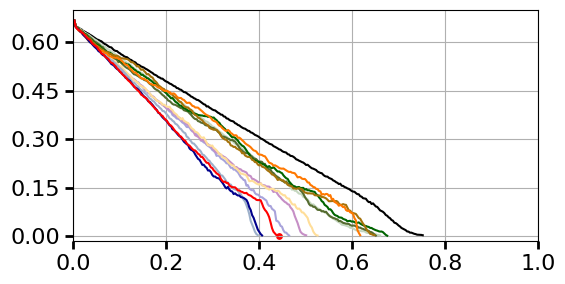

16 random [277] [0.0023452599388379203]
16 clsBetweenness [204] [0.0009724770642201836]
16 clsCloseness [212] [0.001234250764525994]
16 clsKcore [253] [0.0025091743119266064]
16 clsEigenvector [228] [0.0029562691131498476]
16 neiNodesNum [181] [0.0019856269113149847]
16 KMcore_g1 [242] [0.0012666666666666668]
16 KMcore_gf [232] [0.0021055045871559634]
16 nodeEdgeEigenvector_linear [263] [0.0015116207951070338]
16 nodeEdgeEigenvector_max [247] [0.002358715596330275]
16 degree [191] [0.0016562691131498464]
16 new_neiNodeSum_1 [200] [0.0016978593272171255]
[200] [0.0016978593272171255]


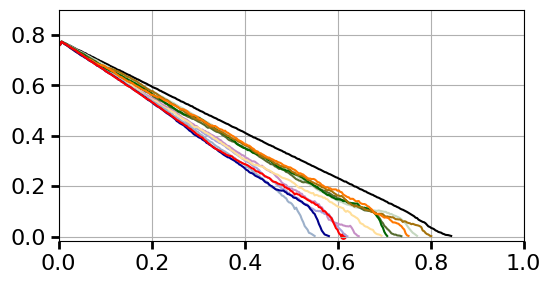

16 random [238] [0.002907951070336392]
16 clsBetweenness [152] [0.0007339449541284401]
16 clsCloseness [163] [0.0028929663608562696]
16 clsKcore [238] [0.0024391437308868506]
16 clsEigenvector [167] [0.0]
16 neiNodesNum [122] [0.0021896024464831804]
16 KMcore_g1 [216] [0.0009360856269113156]
16 KMcore_gf [223] [0.000811926605504587]
16 nodeEdgeEigenvector_linear [230] [0.0012250764525993888]
16 nodeEdgeEigenvector_max [202] [0.0004813455657492353]
16 degree [134] [0.0028159021406727815]
16 new_neiNodeSum_1 [141] [0.0017207951070336391]
[141] [0.0017207951070336391]


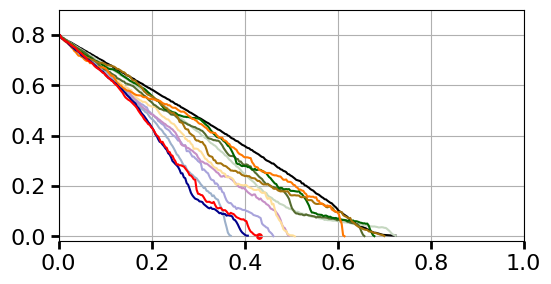

16 random [265] [0.0030039755351681957]
16 clsBetweenness [195] [0.0007792048929663606]
16 clsCloseness [209] [0.0]
16 clsKcore [250] [0.0020339449541284414]
16 clsEigenvector [207] [0.002977064220183486]
16 neiNodesNum [159] [0.0006342507645259937]
16 KMcore_g1 [227] [0.0013045871559633029]
16 KMcore_gf [226] [0.002449235474006117]
16 nodeEdgeEigenvector_linear [258] [0.0014076452599388375]
16 nodeEdgeEigenvector_max [244] [0.0026437308868501545]
16 degree [177] [0.0]
16 new_neiNodeSum_1 [181] [0.002077675840978593]
[181] [0.002077675840978593]


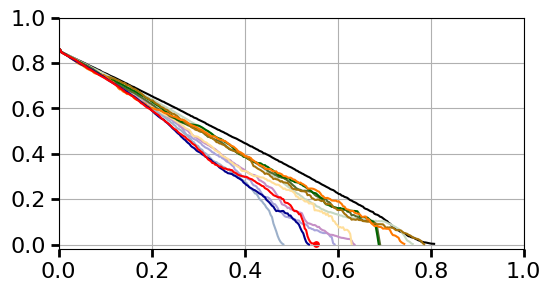

16 random [249] [0.0025143730886850145]
16 clsBetweenness [157] [0.0019192660550458713]
16 clsCloseness [170] [0.0017914373088685014]
16 clsKcore [236] [0.0011657492354740057]
16 clsEigenvector [177] [0.0015177370030581038]
16 neiNodesNum [133] [0.0029159021406727826]
16 KMcore_g1 [215] [0.0029195718654434245]
16 KMcore_gf [222] [0.0014525993883792048]
16 nodeEdgeEigenvector_linear [216] [0.0020847094801223244]
16 nodeEdgeEigenvector_max [206] [0.0022226299694189603]
16 degree [138] [0.0015045871559633032]
16 new_neiNodeSum_1 [147] [0.002175840978593273]
[147] [0.002175840978593273]


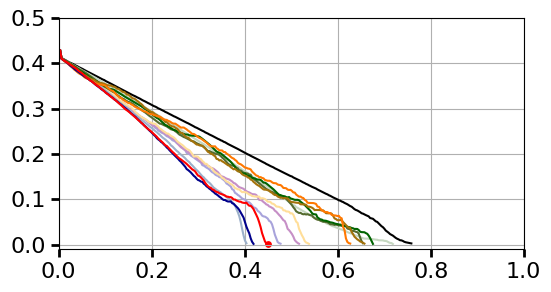

16 random [282] [0.002413149847094801]
16 clsBetweenness [211] [0.0009076452599388377]
16 clsCloseness [213] [0.0013629969418960245]
16 clsKcore [255] [0.001408868501529052]
16 clsEigenvector [235] [0.0026608562691131494]
16 neiNodesNum [190] [0.0028082568807339457]
16 KMcore_g1 [248] [0.00033394495412844024]
16 KMcore_gf [234] [0.0010122324159021407]
16 nodeEdgeEigenvector_linear [264] [0.0017920489296636083]
16 nodeEdgeEigenvector_max [250] [0.002232110091743119]
16 degree [193] [0.002723853211009174]
16 new_neiNodeSum_1 [202] [0.0004519877675840977]
[202] [0.0004519877675840977]


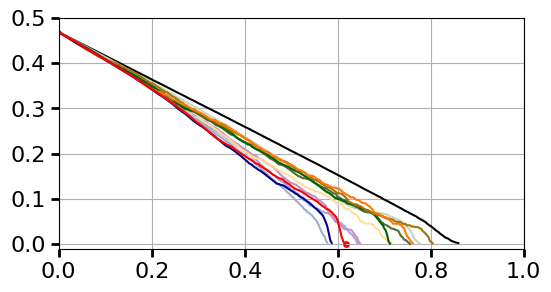

16 random [223] [0.0023590214067278287]
16 clsBetweenness [146] [0.0014360856269113153]
16 clsCloseness [162] [0.0]
16 clsKcore [184] [0.0028608562691131508]
16 clsEigenvector [143] [0.00020703363914373094]
16 neiNodesNum [115] [0.0025259938837920493]
16 KMcore_g1 [171] [0.0029149847094801216]
16 KMcore_gf [183] [0.001974311926605505]
16 nodeEdgeEigenvector_linear [204] [0.0029076452599388386]
16 nodeEdgeEigenvector_max [186] [0.0]
16 degree [104] [0.0014535168195718654]
16 new_neiNodeSum_1 [101] [0.002893883792048929]
[101] [0.002893883792048929]


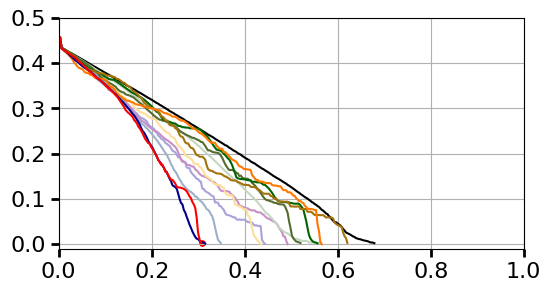

16 random [262] [0.002277064220183486]
16 clsBetweenness [194] [0.0013892966360856266]
16 clsCloseness [209] [0.0]
16 clsKcore [248] [0.002956574923547401]
16 clsEigenvector [206] [0.0010415902140672782]
16 neiNodesNum [150] [0.0018296636085626916]
16 KMcore_g1 [226] [0.00032905198776758405]
16 KMcore_gf [225] [0.0006474006116207949]
16 nodeEdgeEigenvector_linear [244] [0.0027920489296636088]
16 nodeEdgeEigenvector_max [235] [0.0015525993883792049]
16 degree [173] [0.0022984709480122325]
16 new_neiNodeSum_1 [172] [0.0005883792048929663]
[172] [0.0005883792048929663]


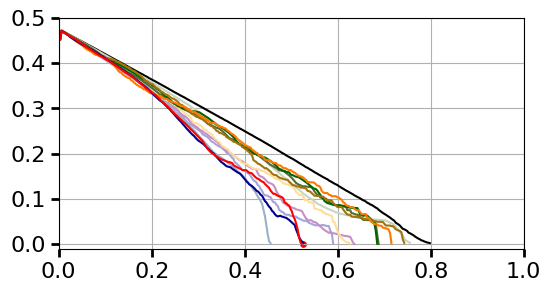

17 random [489] [0.0013859728506787313]
17 clsBetweenness [120] [0.0009444947209653074]
17 clsCloseness [109] [0.0]
17 clsKcore [211] [0.0011523378582202098]
17 clsEigenvector [125] [0.0005917043740573145]
17 neiNodesNum [109] [0.0]
17 KMcore_g1 [170] [0.0008134238310708884]
17 KMcore_gf [114] [0.0]
17 nodeEdgeEigenvector_linear [119] [0.00033212669683257886]
17 nodeEdgeEigenvector_max [134] [0.0011271493212669675]
17 degree [129] [0.0005559577677224733]
17 new_neiNodeSum_1 [108] [0.00017767722473604846]
[108] [0.00017767722473604846]


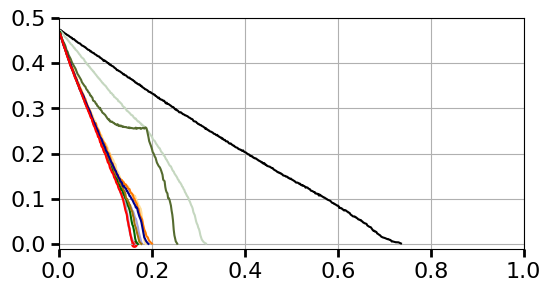

17 random [574] [0.0014901960784313704]
17 clsBetweenness [202] [0.0005553544494720957]
17 clsCloseness [173] [0.0]
17 clsKcore [238] [0.0007363499245852173]
17 clsEigenvector [218] [0.00013242835595776766]
17 neiNodesNum [172] [0.0]
17 KMcore_g1 [247] [0.0006838612368024123]
17 KMcore_gf [194] [0.0012788838612368]
17 nodeEdgeEigenvector_linear [205] [0.0008500754147812955]
17 nodeEdgeEigenvector_max [255] [0.0012242835595776757]
17 degree [241] [0.0010995475113122152]
17 new_neiNodeSum_1 [178] [0.0006850678733031666]
[178] [0.0006850678733031666]


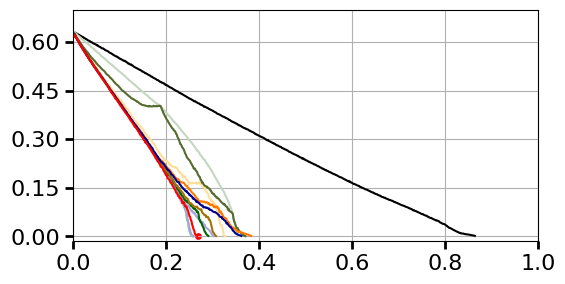

17 random [570] [0.0013375565610859702]
17 clsBetweenness [336] [0.0012387631975867253]
17 clsCloseness [290] [0.001503921568627449]
17 clsKcore [346] [0.0012135746606334824]
17 clsEigenvector [308] [0.0]
17 neiNodesNum [290] [0.0015037707390648546]
17 KMcore_g1 [305] [0.001166063348416288]
17 KMcore_gf [290] [0.00029245852187028613]
17 nodeEdgeEigenvector_linear [377] [0.001486576168929108]
17 nodeEdgeEigenvector_max [390] [0.0010631975867269965]
17 degree [393] [0.0013398190045248854]
17 new_neiNodeSum_1 [317] [0.0012119155354449454]
[317] [0.0012119155354449454]


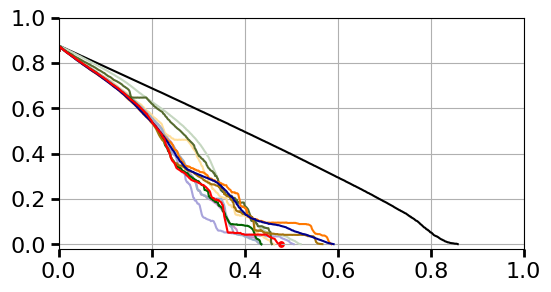

17 random [594] [0.0013478129713423812]
17 clsBetweenness [358] [0.0014449472096530894]
17 clsCloseness [314] [0.0]
17 clsKcore [361] [4.147812971342383e-05]
17 clsEigenvector [343] [0.000507239819004524]
17 neiNodesNum [317] [0.0011310708898944171]
17 KMcore_g1 [379] [0.0006986425339366506]
17 KMcore_gf [328] [0.0006745098039215674]
17 nodeEdgeEigenvector_linear [394] [0.0007069381598793351]
17 nodeEdgeEigenvector_max [412] [0.000469532428355957]
17 degree [415] [0.0015001508295625916]
17 new_neiNodeSum_1 [335] [0.0007876319758672687]
[335] [0.0007876319758672687]


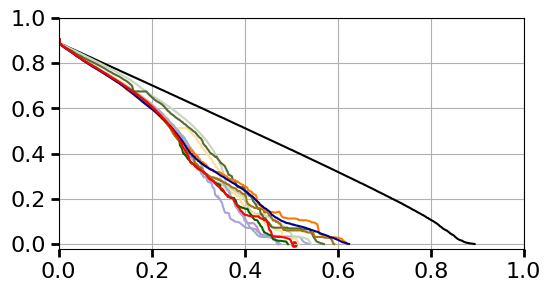

17 random [540] [0.0011784313725490179]
17 clsBetweenness [154] [0.0]
17 clsCloseness [132] [0.000482956259426847]
17 clsKcore [223] [0.0009301659125188522]
17 clsEigenvector [166] [0.00033996983408748064]
17 neiNodesNum [132] [0.0004058823529411759]
17 KMcore_g1 [185] [0.0006835595776772239]
17 KMcore_gf [144] [0.0011260935143288066]
17 nodeEdgeEigenvector_linear [149] [0.0010965309200603305]
17 nodeEdgeEigenvector_max [175] [0.0009330316742081435]
17 degree [163] [0.0014481146304675696]
17 new_neiNodeSum_1 [132] [0.0]
[132] [0.0]


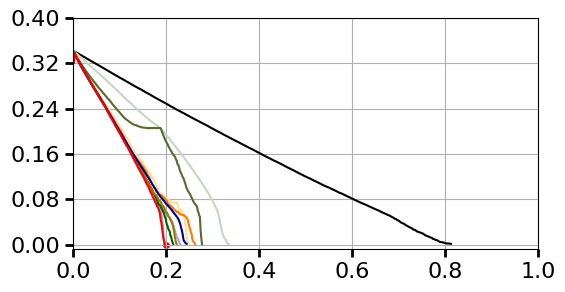

17 random [589] [0.0013473604826545983]
17 clsBetweenness [229] [0.0011668174962292592]
17 clsCloseness [220] [0.001157616892911009]
17 clsKcore [263] [0.00033107088989441883]
17 clsEigenvector [247] [0.0006604826546003009]
17 neiNodesNum [224] [0.0013389140271493191]
17 KMcore_g1 [285] [0.0]
17 KMcore_gf [236] [0.0008936651583710392]
17 nodeEdgeEigenvector_linear [253] [0.0007271493212669672]
17 nodeEdgeEigenvector_max [286] [0.0007743589743589733]
17 degree [286] [0.0012597285067873281]
17 new_neiNodeSum_1 [224] [0.0011443438914027135]
[224] [0.0011443438914027135]


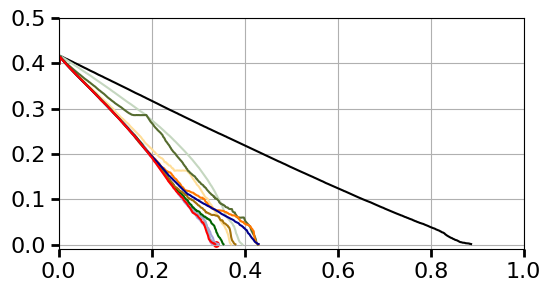

17 random [563] [0.0012749622926093497]
17 clsBetweenness [318] [0.00036425339366515796]
17 clsCloseness [281] [0.000942232277526394]
17 clsKcore [330] [0.00017556561085972828]
17 clsEigenvector [294] [0.0010731523378582192]
17 neiNodesNum [273] [0.00017978883861236784]
17 KMcore_g1 [296] [0.0014090497737556545]
17 KMcore_gf [282] [0.0005402714932126691]
17 nodeEdgeEigenvector_linear [366] [0.000531221719457013]
17 nodeEdgeEigenvector_max [384] [0.000535746606334841]
17 degree [380] [0.0011864253393665143]
17 new_neiNodeSum_1 [305] [0.0003589743589743585]
[305] [0.0003589743589743585]


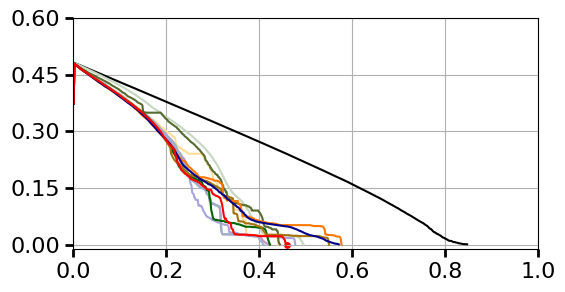

17 random [585] [0.0011959276018099528]
17 clsBetweenness [348] [0.00014389140271493185]
17 clsCloseness [311] [0.0006193061840120655]
17 clsKcore [358] [0.0012390648567119139]
17 clsEigenvector [341] [0.00014313725490196054]
17 neiNodesNum [310] [0.00014298642533936622]
17 KMcore_g1 [362] [0.00014434389140271473]
17 KMcore_gf [306] [0.0013864253393665138]
17 nodeEdgeEigenvector_linear [390] [3.680241327300151e-05]
17 nodeEdgeEigenvector_max [406] [0.0]
17 degree [410] [0.0014546003016591236]
17 new_neiNodeSum_1 [331] [0.0012389140271493193]
[331] [0.0012389140271493193]


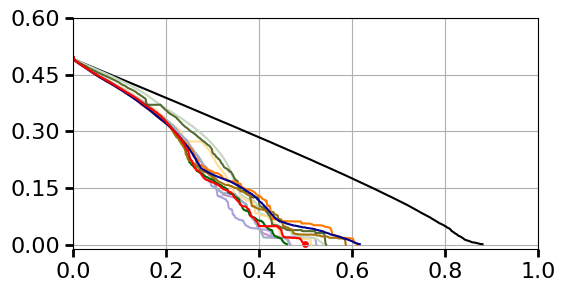

18 random [102] [0.007497692307692299]
18 clsBetweenness [66] [0.006207692307692302]
18 clsCloseness [64] [0.005973076923076918]
18 clsKcore [87] [0.007414615384615375]
18 clsEigenvector [64] [0.006980769230769224]
18 neiNodesNum [64] [0.006739230769230762]
18 KMcore_g1 [63] [0.0011430769230769218]
18 KMcore_gf [61] [0.006493846153846144]
18 nodeEdgeEigenvector_linear [62] [0.0017961538461538438]
18 nodeEdgeEigenvector_max [69] [0.00360307692307692]
18 degree [65] [0.0011707692307692291]
18 new_neiNodeSum_1 [60] [0.007395384615384605]
[60] [0.007395384615384605]


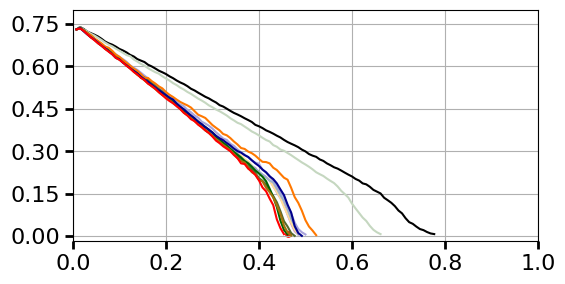

18 random [113] [0.004529999999999993]
18 clsBetweenness [82] [0.005653076923076916]
18 clsCloseness [80] [0.001054615384615384]
18 clsKcore [98] [0.005725384615384608]
18 clsEigenvector [79] [0.0]
18 neiNodesNum [80] [0.00301307692307692]
18 KMcore_g1 [80] [0.0027330769230769197]
18 KMcore_gf [82] [0.003006923076923074]
18 nodeEdgeEigenvector_linear [80] [0.00490538461538461]
18 nodeEdgeEigenvector_max [87] [0.0056469230769230685]
18 degree [85] [0.0018699999999999988]
18 new_neiNodeSum_1 [78] [0.001706153846153845]
[78] [0.001706153846153845]


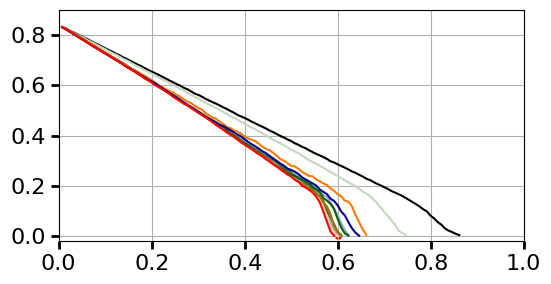

18 random [108] [0.007391538461538452]
18 clsBetweenness [89] [0.0]
18 clsCloseness [84] [0.0]
18 clsKcore [87] [0.0017930769230769213]
18 clsEigenvector [84] [0.0]
18 neiNodesNum [84] [0.0023576923076923063]
18 KMcore_g1 [84] [0.0]
18 KMcore_gf [98] [0.0]
18 nodeEdgeEigenvector_linear [88] [0.0]
18 nodeEdgeEigenvector_max [98] [0.0]
18 degree [100] [0.001279230769230768]
18 new_neiNodeSum_1 [88] [0.0]
[88] [0.0]


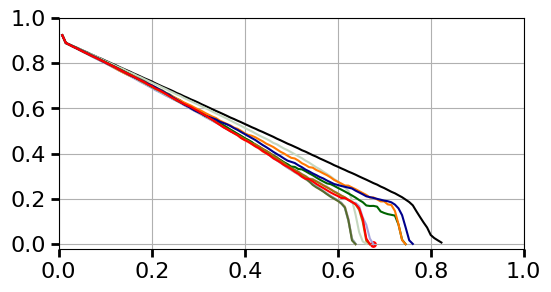

18 random [113] [0.003513076923076917]
18 clsBetweenness [96] [0.0011599999999999983]
18 clsCloseness [88] [0.0]
18 clsKcore [92] [0.005636153846153839]
18 clsEigenvector [88] [0.0]
18 neiNodesNum [88] [0.0003592307692307692]
18 KMcore_g1 [88] [0.0]
18 KMcore_gf [105] [0.007063846153846144]
18 nodeEdgeEigenvector_linear [93] [0.0]
18 nodeEdgeEigenvector_max [102] [0.000969999999999999]
18 degree [107] [0.0]
18 new_neiNodeSum_1 [92] [0.0010953846153846144]
[92] [0.0010953846153846144]


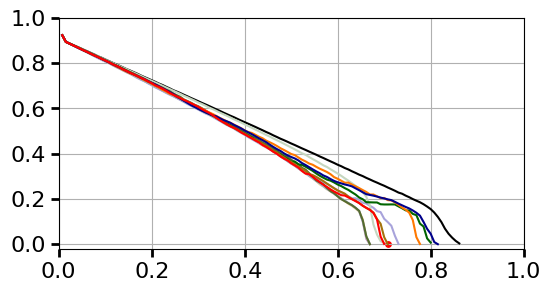

18 random [101] [0.007387692307692297]
18 clsBetweenness [65] [0.004341538461538457]
18 clsCloseness [64] [0.0008623076923076913]
18 clsKcore [87] [0.004939230769230762]
18 clsEigenvector [63] [0.005171538461538455]
18 neiNodesNum [64] [0.0016446153846153822]
18 KMcore_g1 [62] [0.0009523076923076914]
18 KMcore_gf [60] [0.0066161538461538385]
18 nodeEdgeEigenvector_linear [61] [0.0018876923076923049]
18 nodeEdgeEigenvector_max [69] [0.0]
18 degree [64] [0.0008984615384615375]
18 new_neiNodeSum_1 [59] [0.006674615384615378]
[59] [0.006674615384615378]


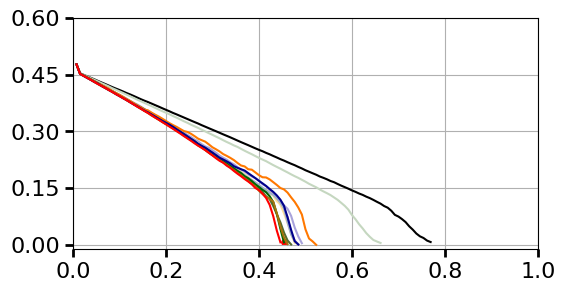

18 random [113] [0.006262307692307683]
18 clsBetweenness [82] [0.0016992307692307673]
18 clsCloseness [79] [0.005782307692307685]
18 clsKcore [98] [0.005443846153846148]
18 clsEigenvector [79] [1.8461538461538465e-05]
18 neiNodesNum [79] [0.0026484615384615353]
18 KMcore_g1 [79] [0.006771538461538453]
18 KMcore_gf [81] [0.004056923076923072]
18 nodeEdgeEigenvector_linear [79] [0.0054576923076923]
18 nodeEdgeEigenvector_max [87] [0.0021076923076923048]
18 degree [84] [0.0016815384615384594]
18 new_neiNodeSum_1 [77] [0.0030730769230769184]
[77] [0.0030730769230769184]


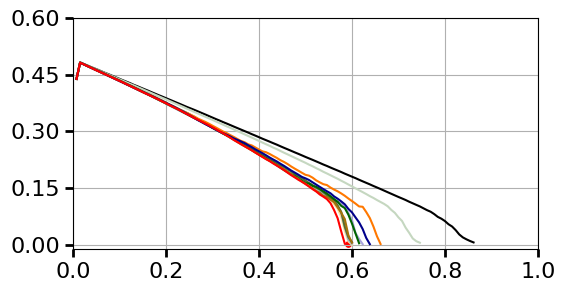

18 random [108] [0.0033684615384615337]
18 clsBetweenness [89] [0.0]
18 clsCloseness [84] [0.0]
18 clsKcore [87] [0.0010753846153846137]
18 clsEigenvector [84] [0.0]
18 neiNodesNum [84] [0.0]
18 KMcore_g1 [84] [0.0]
18 KMcore_gf [98] [0.0]
18 nodeEdgeEigenvector_linear [88] [0.0]
18 nodeEdgeEigenvector_max [98] [0.0]
18 degree [99] [0.006024615384615375]
18 new_neiNodeSum_1 [88] [0.0]
[88] [0.0]


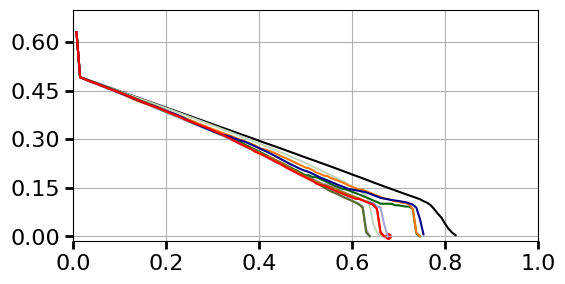

18 random [112] [0.006348461538461532]
18 clsBetweenness [96] [0.0]
18 clsCloseness [88] [0.0]
18 clsKcore [92] [0.005288461538461531]
18 clsEigenvector [88] [0.0]
18 neiNodesNum [88] [0.0]
18 KMcore_g1 [88] [0.0]
18 KMcore_gf [106] [0.0]
18 nodeEdgeEigenvector_linear [93] [0.0]
18 nodeEdgeEigenvector_max [102] [0.0]
18 degree [107] [0.0028561538461538433]
18 new_neiNodeSum_1 [92] [0.0]
[92] [0.0]


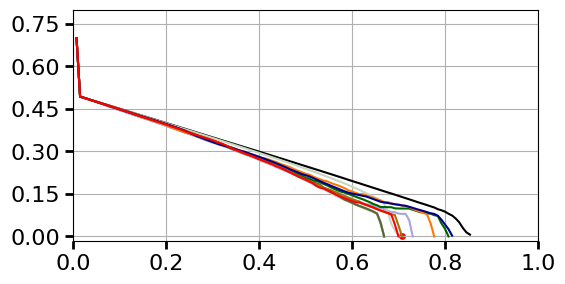

19 random [789] [0.0009275862068965517]
19 clsBetweenness [138] [0.0008245210727969348]
19 clsCloseness [137] [0.0007060344827586204]
19 clsKcore [264] [0.0008243295019157087]
19 clsEigenvector [138] [0.0006601532567049812]
19 neiNodesNum [138] [0.0007709770114942525]
19 KMcore_g1 [155] [0.0006973180076628354]
19 KMcore_gf [180] [0.0004574712643678161]
19 nodeEdgeEigenvector_linear [139] [0.0009420498084291185]
19 nodeEdgeEigenvector_max [136] [0.000600287356321839]
19 degree [134] [0.00014434865900383144]
19 new_neiNodeSum_1 [135] [0.0]
[135] [0.0]


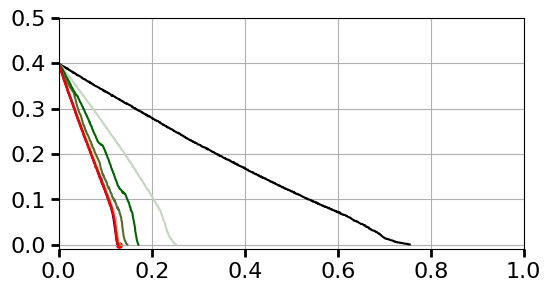

19 random [907] [0.0005481800766283522]
19 clsBetweenness [225] [0.00037155172413793095]
19 clsCloseness [228] [0.0]
19 clsKcore [307] [0.0006332375478927205]
19 clsEigenvector [238] [0.0008532567049808432]
19 neiNodesNum [227] [0.00046312260536398475]
19 KMcore_g1 [244] [0.0008758620689655175]
19 KMcore_gf [316] [0.0008061302681992336]
19 nodeEdgeEigenvector_linear [226] [0.0004959770114942529]
19 nodeEdgeEigenvector_max [219] [0.0008461685823754789]
19 degree [218] [0.0007150383141762451]
19 new_neiNodeSum_1 [218] [0.0]
[218] [0.0]


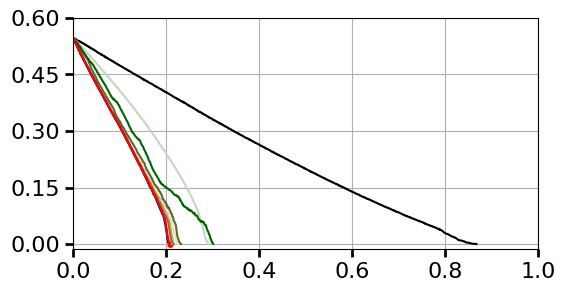

19 random [877] [0.0006406130268199233]
19 clsBetweenness [284] [0.00021034482758620682]
19 clsCloseness [339] [0.00042835249042145573]
19 clsKcore [398] [0.0004573754789272029]
19 clsEigenvector [374] [0.0]
19 neiNodesNum [336] [0.00047892720306513413]
19 KMcore_g1 [373] [0.0]
19 KMcore_gf [412] [0.0004498084291187739]
19 nodeEdgeEigenvector_linear [345] [0.0005860153256704979]
19 nodeEdgeEigenvector_max [300] [0.0009207854406130269]
19 degree [307] [0.0008388888888888889]
19 new_neiNodeSum_1 [324] [0.000459961685823755]
[324] [0.000459961685823755]


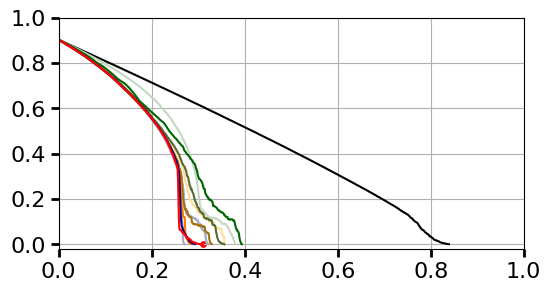

19 random [914] [0.0005324712643678163]
19 clsBetweenness [351] [0.0005412835249042143]
19 clsCloseness [395] [0.000815038314176245]
19 clsKcore [473] [0.000585632183908046]
19 clsEigenvector [447] [0.00040670498084291196]
19 neiNodesNum [397] [1.3984674329501914e-05]
19 KMcore_g1 [429] [0.0]
19 KMcore_gf [450] [0.0009081417624521075]
19 nodeEdgeEigenvector_linear [449] [0.0005818965517241379]
19 nodeEdgeEigenvector_max [417] [0.0009296934865900383]
19 degree [424] [0.0008481800766283523]
19 new_neiNodeSum_1 [411] [0.00023572796934865904]
[411] [0.00023572796934865904]


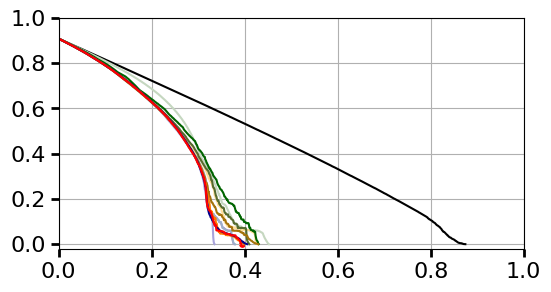

19 random [799] [0.0008946360153256705]
19 clsBetweenness [153] [0.0008519157088122606]
19 clsCloseness [152] [0.000636206896551724]
19 clsKcore [273] [0.0006854406130268197]
19 clsEigenvector [156] [0.0]
19 neiNodesNum [152] [0.00031197318007662836]
19 KMcore_g1 [166] [0.0]
19 KMcore_gf [190] [0.0006716475095785438]
19 nodeEdgeEigenvector_linear [152] [0.0]
19 nodeEdgeEigenvector_max [148] [0.0]
19 degree [145] [0.0]
19 new_neiNodeSum_1 [146] [0.0002985632183908044]
[146] [0.0002985632183908044]


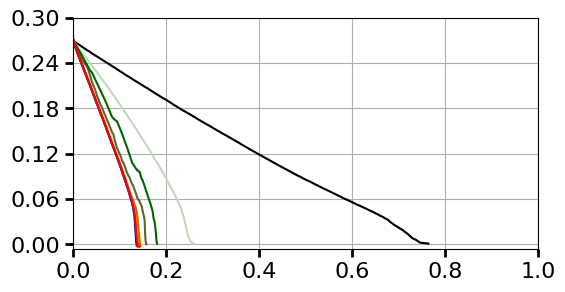

19 random [912] [0.0008197318007662834]
19 clsBetweenness [238] [0.00040258620689655173]
19 clsCloseness [239] [0.00035584291187739465]
19 clsKcore [311] [0.0007513409961685823]
19 clsEigenvector [257] [0.0]
19 neiNodesNum [239] [0.0]
19 KMcore_g1 [268] [0.00033122605363984674]
19 KMcore_gf [330] [0.0]
19 nodeEdgeEigenvector_linear [237] [0.0003693486590038312]
19 nodeEdgeEigenvector_max [233] [0.00036187739463601536]
19 degree [231] [0.00033601532567049806]
19 new_neiNodeSum_1 [231] [0.0]
[231] [0.0]


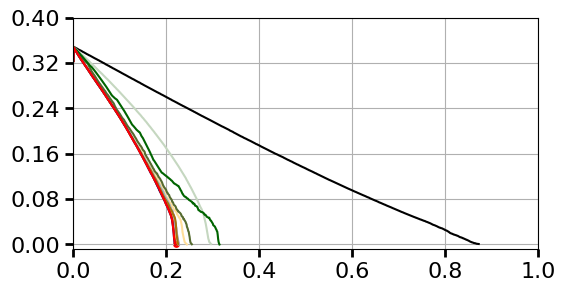

19 random [880] [0.0003510536398467435]
19 clsBetweenness [280] [0.00021005747126436782]
19 clsCloseness [332] [0.0]
19 clsKcore [398] [0.0002560344827586207]
19 clsEigenvector [373] [0.0]
19 neiNodesNum [332] [0.0002631226053639846]
19 KMcore_g1 [358] [0.0]
19 KMcore_gf [407] [0.0006452107279693487]
19 nodeEdgeEigenvector_linear [340] [0.0]
19 nodeEdgeEigenvector_max [289] [0.0007199233716475093]
19 degree [299] [0.0004814176245210727]
19 new_neiNodeSum_1 [297] [0.0009302681992337162]
[297] [0.0009302681992337162]


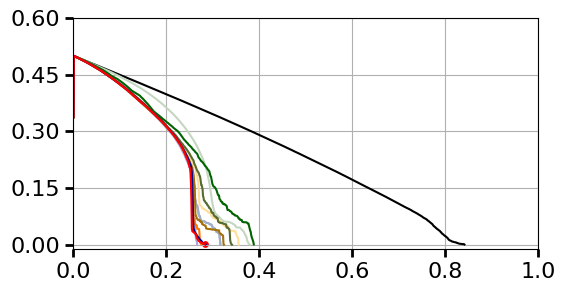

19 random [927] [0.0008060344827586208]
19 clsBetweenness [348] [0.00027806513409961686]
19 clsCloseness [393] [0.000368007662835249]
19 clsKcore [473] [0.0]
19 clsEigenvector [443] [0.0005906130268199234]
19 neiNodesNum [393] [0.000420402298850575]
19 KMcore_g1 [424] [0.0]
19 KMcore_gf [446] [0.0002992337164750958]
19 nodeEdgeEigenvector_linear [449] [0.0007298850574712643]
19 nodeEdgeEigenvector_max [418] [0.0]
19 degree [430] [0.0008905172413793103]
19 new_neiNodeSum_1 [411] [0.00018496168582375478]
[411] [0.00018496168582375478]


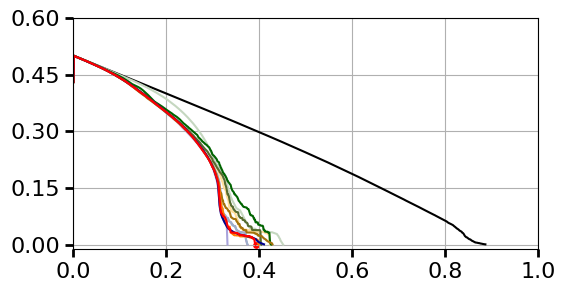

20 random [353] [0.001331359649122807]
20 clsBetweenness [301] [0.0004688596491228069]
20 clsCloseness [298] [0.0015877192982456142]
20 clsKcore [336] [0.0016962719298245612]
20 clsEigenvector [298] [0.001944956140350877]
20 neiNodesNum [298] [0.001007894736842105]
20 KMcore_g1 [350] [0.0021304824561403507]
20 KMcore_gf [296] [0.0015076754385964911]
20 nodeEdgeEigenvector_linear [300] [0.001525877192982456]
20 nodeEdgeEigenvector_max [299] [0.0007914473684210526]
20 degree [302] [0.0015975877192982457]
20 new_neiNodeSum_1 [291] [0.0019510964912280698]
[291] [0.0019510964912280698]


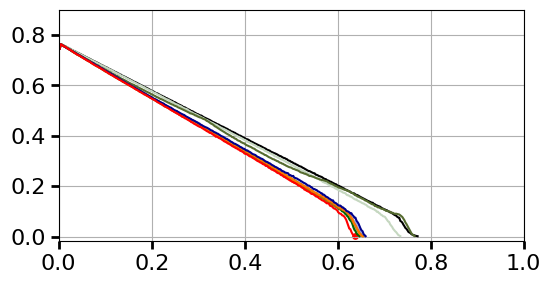

20 random [400] [0.0008673245614035088]
20 clsBetweenness [362] [0.0009179824561403509]
20 clsCloseness [360] [0.000996929824561403]
20 clsKcore [382] [0.001999780701754386]
20 clsEigenvector [360] [0.001997149122807017]
20 neiNodesNum [361] [0.0008557017543859651]
20 KMcore_g1 [388] [0.0012078947368421053]
20 KMcore_gf [358] [0.001681140350877193]
20 nodeEdgeEigenvector_linear [361] [0.0018225877192982454]
20 nodeEdgeEigenvector_max [363] [0.0015107456140350875]
20 degree [364] [0.0020107456140350875]
20 new_neiNodeSum_1 [356] [0.0010800438596491224]
[356] [0.0010800438596491224]


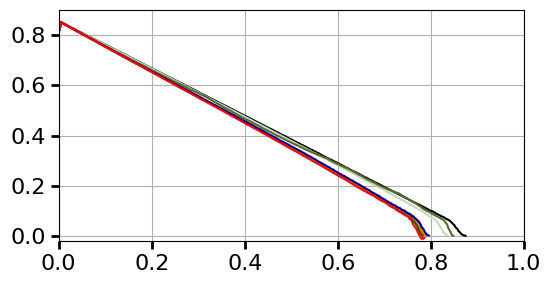

20 random [401] [0.0019320175438596492]
20 clsBetweenness [374] [0.0003846491228070175]
20 clsCloseness [373] [0.0006896929824561401]
20 clsKcore [384] [0.0010989035087719285]
20 clsEigenvector [372] [0.0]
20 neiNodesNum [373] [0.0]
20 KMcore_g1 [387] [0.0010719298245614032]
20 KMcore_gf [368] [0.002064254385964912]
20 nodeEdgeEigenvector_linear [358] [0.0]
20 nodeEdgeEigenvector_max [373] [0.001103508771929823]
20 degree [379] [0.00116907894736842]
20 new_neiNodeSum_1 [353] [0.0]
[353] [0.0]


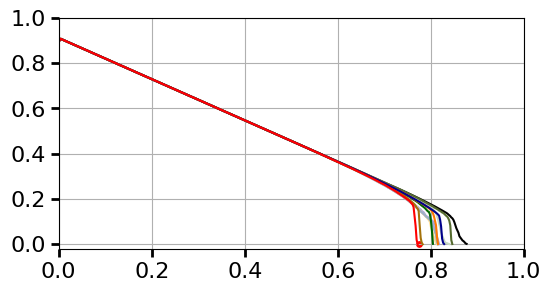

20 random [413] [0.00219122807017544]
20 clsBetweenness [389] [0.0021201754385964913]
20 clsCloseness [384] [0.0014940789473684216]
20 clsKcore [395] [0.0008418859649122807]
20 clsEigenvector [382] [0.001891447368421053]
20 neiNodesNum [384] [0.0018916666666666665]
20 KMcore_g1 [401] [0.0]
20 KMcore_gf [384] [0.0]
20 nodeEdgeEigenvector_linear [382] [2.5657894736842117e-05]
20 nodeEdgeEigenvector_max [388] [0.00025021929824561433]
20 degree [391] [0.0018921052631578944]
20 new_neiNodeSum_1 [369] [0.0]
[369] [0.0]


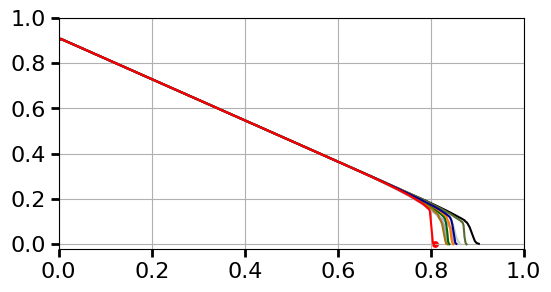

20 random [350] [0.0016945175438596494]
20 clsBetweenness [299] [0.0011901315789473686]
20 clsCloseness [296] [0.0017140350877192978]
20 clsKcore [334] [0.0017353070175438593]
20 clsEigenvector [295] [0.001269736842105263]
20 neiNodesNum [296] [0.0007978070175438595]
20 KMcore_g1 [349] [0.0]
20 KMcore_gf [293] [0.0018997807017543855]
20 nodeEdgeEigenvector_linear [298] [0.0]
20 nodeEdgeEigenvector_max [296] [0.002021271929824561]
20 degree [300] [0.00039407894736842114]
20 new_neiNodeSum_1 [290] [0.0013736842105263154]
[290] [0.0013736842105263154]


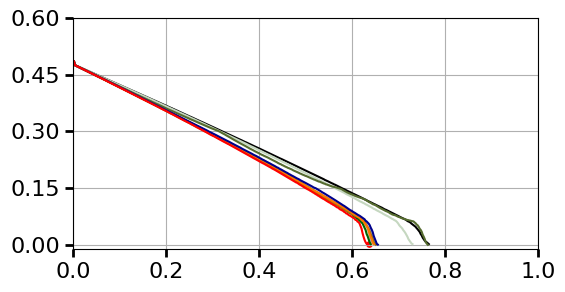

20 random [400] [0.0012122807017543855]
20 clsBetweenness [361] [0.0]
20 clsCloseness [358] [0.0016774122807017538]
20 clsKcore [382] [0.0016515350877192975]
20 clsEigenvector [358] [0.0017877192982456136]
20 neiNodesNum [359] [0.0010548245614035085]
20 KMcore_g1 [386] [0.002148245614035087]
20 KMcore_gf [357] [0.0]
20 nodeEdgeEigenvector_linear [360] [0.0006804824561403507]
20 nodeEdgeEigenvector_max [361] [0.001773026315789473]
20 degree [363] [0.000281578947368421]
20 new_neiNodeSum_1 [355] [0.0011190789473684208]
[355] [0.0011190789473684208]


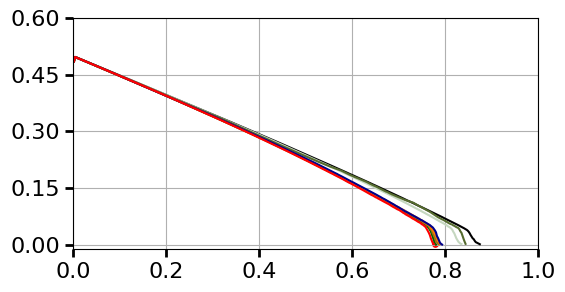

20 random [394] [0.0018138157894736836]
20 clsBetweenness [367] [0.002172368421052631]
20 clsCloseness [366] [0.0014815789473684204]
20 clsKcore [376] [0.001361184210526316]
20 clsEigenvector [364] [0.0004758771929824561]
20 neiNodesNum [366] [0.0012153508771929821]
20 KMcore_g1 [381] [0.0]
20 KMcore_gf [362] [0.0]
20 nodeEdgeEigenvector_linear [348] [0.0]
20 nodeEdgeEigenvector_max [366] [0.0]
20 degree [372] [5.263157894736842e-06]
20 new_neiNodeSum_1 [345] [0.0]
[345] [0.0]


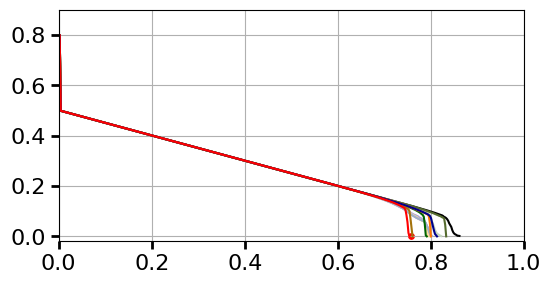

20 random [409] [0.0018800438596491226]
20 clsBetweenness [384] [0.0003138157894736843]
20 clsCloseness [378] [0.0]
20 clsKcore [390] [0.0012322368421052634]
20 clsEigenvector [377] [0.0]
20 neiNodesNum [378] [0.00040394736842105255]
20 KMcore_g1 [396] [0.0]
20 KMcore_gf [378] [0.0]
20 nodeEdgeEigenvector_linear [370] [0.0]
20 nodeEdgeEigenvector_max [381] [0.0]
20 degree [386] [0.0013644736842105259]
20 new_neiNodeSum_1 [363] [0.0]
[363] [0.0]


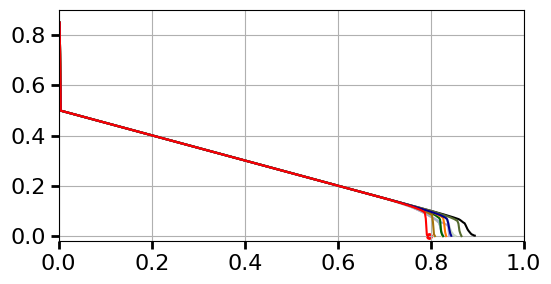

In [97]:
for net in range(1,21):
    for mu in [0.1,1]:
        muName = int(mu*10)
        for nu in [1,3]:
            for lid in [0,1]:
                fig = plt.figure(figsize=(6,3))
                # s_pixels = np.sqrt(20) * (setdpi / 72) 
                # ax_height_pixels = fig.get_size_inches()[1] * setdpi
                for mtd in immunizationMtd_s:
                    plt.plot([(i+1)/nodeNumDic[net] for i in range(len(yyy[net][mu][nu][lid][mtd]))], yyy[net][mu][nu][lid][mtd], color=colors[mtd]) #,marker='s', markersize=0.1
                    print(net, mtd,[len(yyy[net][mu][nu][lid][mtd])+1], [yyy[net][mu][nu][lid][mtd][-1]])
                    if mtd in ['new_neiNodeSum_1']:
                        print([len(yyy[net][mu][nu][lid][mtd])+1], [yyy[net][mu][nu][lid][mtd][-1]])
                        plt.scatter([(len(yyy[net][mu][nu][lid][mtd])+1)/nodeNumDic[net]], [yyy[net][mu][nu][lid][mtd][-1]], marker='o',color=colors[mtd],s=15)
                ax = plt.gca()
                y_min, y_max = ax.get_ylim()
                plt.ylim(bottom=-1*(y_max-y_min)/50,top=math.ceil(y_max*10)/10)  # -1*s_pixels/ax_height_pixels
                plt.xlim([0,1])
                fontsize1 = 16
                plt.tick_params(axis='y', labelsize=fontsize1)  
                plt.tick_params(axis='x', labelsize=fontsize1)
                plt.tick_params(axis='y', which='major', size=6, width=2)  
                plt.tick_params(axis='x', which='major', size=6, width=2)  
                plt.grid()
                plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
                muName = int(mu*10)
                plt.savefig(f'savefig_si_imm/new_imm_net{net}_mu{muName}_nu{nu}_lid{lid}_grid.svg', format='svg', bbox_inches='tight',dpi=300)
                # plt.savefig(f'savefig/fig_imm_mu{muName}_nu{nu}_lid{lid}_net{net}.svg', format='svg', bbox_inches='tight',dpi=300)
                plt.show()